In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
def vel(n,x,y,T,j):
    z0=np.complex(x[j],y[j])
    i=np.complex(0,1)
    v_conj=0
    for k in range(n):
        if(k!=j):
            z=np.complex(x[k],y[k])
            if(z0==z):
                print(k,j,z,z0)
            v_conj+=-(i*T[k])/(2*np.pi*(z0-z))
            
    v=np.conj(v_conj)
    return(v)

In [3]:
##For 2 point vortices
n=2;
x=np.zeros(2)
y=np.zeros(2)
x[0]=0.5
x[1]=-0.5
T=np.ones(2)

In [4]:
v=vel(2,x,y,T,0)
r=0.5
w=abs(v)/r
tf=6*np.pi/w
x0=np.zeros(10000)
y0=np.zeros(10000)
x0[0]=0.5
x1=np.zeros(10000)
y1=np.zeros(10000)
x1[0]=-0.5

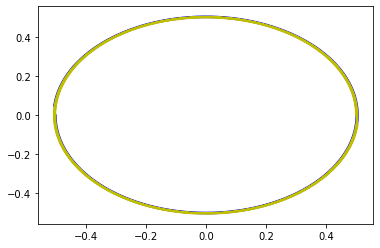

In [27]:
h0=0.006
for k in range(9999):
    v0=vel(2,x,y,T,0)
    v1=vel(2,x,y,T,1)
    
    z0=complex(x0[k],y0[k])
    z0=z0+h0*v0
    x0[k+1]=np.real(z0)
    y0[k+1]=np.imag(z0)
    
    x[0]=x0[k+1]
    y[0]=y0[k+1]
    
    z1=complex(x1[k],y1[k])
    z1=z1+h0*v1
    
    x1[k+1]=np.real(z1)
    y1[k+1]=np.imag(z1)
    
    x[1]=x1[k+1]
    y[1]=y1[k+1]
    
plt.plot(x1,y1,'b')
plt.plot(x0,y0,'y')
# print(max(x0),min(x0))
# print(max(x1),min(x1))
# print(max(y0),min(y0))
# print(max(y1),min(y1))

In [28]:
h=np.zeros(100)
err=np.zeros(100)

tf=6*(np.pi**2) 
w=6*np.pi/tf

x0=np.zeros(10000)
y0=np.zeros(10000)
x0[0]=0.5

x1=np.zeros(10000)
y1=np.zeros(10000)
x1[0]=-0.5

z1=np.complex(x[0],y[0])
z2=np.complex(x[1],y[1])

for k in range(100):
    n=1000+90*k
    t=0
    h[k]=tf/n
    e=0
    for m in range(n):
        v0=vel(2,x,y,T,0)
        v1=vel(2,x,y,T,1)
        t=t+h[k]
        z0=complex(x0[m],y0[m])
        z0=z0+h[k]*v0
        x0[m+1]=np.real(z0)
        y0[m+1]=np.imag(z0)
        
        a=0.5*np.cos(w*t)
        b=0.5*np.sin(w*t)
        
        e=e+np.sqrt(((a-x0[m+1])**2)+((b-y0[m+1])**2))
        
    
        x[0]=x0[m+1]
        y[0]=y0[m+1]
    
        z1=complex(x1[m],y1[m])
        z1=z1+h[k]*v1
    
        x1[m+1]=np.real(z1)
        y1[m+1]=np.imag(z1)
    
        x[1]=x1[m+1]
        y[1]=y1[m+1]
    #print(type(e),type(n))
        
    err[k]=(e/n)
#     print(err[k],"\t",h[k])

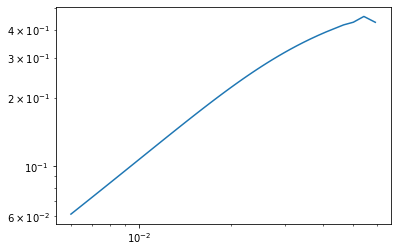

slope = 1.0224220924270189


In [29]:
##error in eulers scheme
plt.loglog(h,err)
plt.show()
slope,intercept=np.polyfit(np.log(err),np.log(h),1)
print("slope =",slope)

In [8]:
##runge kutta integral

x0,x1,y0,y1=np.zeros(10000),np.zeros(10000),np.zeros(10000),np.zeros(10000)
x0[0]=0.5
x1[0]=-0.5
x=np.zeros(2)
x[0],x[1]=0.5,-0.5
y=np.zeros(2)

0.5 -0.49999999764111286
0.49999996501948457 -0.499999987412744
0.49999999764111286 -0.5
0.499999987412744 -0.49999996501948457


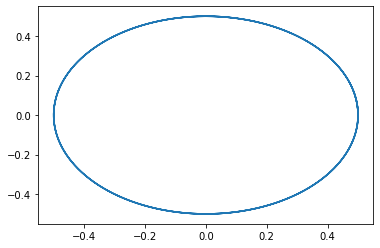

In [9]:
h=0.006
t,c=0,0

for k in range(9999):
    v0=vel(2,x,y,T,0)
    v1=vel(2,x,y,T,1)
#     print(abs(v0),v1)
    t=t+h
    z0=np.complex(x0[k],y0[k])
    z1=np.complex(x1[k],y1[k])
#     print(z0,z1,"\t\t",k,"\n")
    k1=v0
    k1_=v1
    zh1=z0+h*k1
    zh2=z1+h*k1_
    x[0]=np.real(zh1)
    y[0]=np.imag(zh1)
    x[1]=np.real(zh2)
    y[1]=np.imag(zh2)
    k2=vel(2,x,y,T,0)
    k2_=vel(2,x,y,T,1)
    z0=z0+(h/2)*(k1+k2)
    x0[k+1]=np.real(z0)
    y0[k+1]=np.imag(z0)
    z1=z1+(h/2)*(k1_+k2_)
    x1[k+1]=np.real(z1)
    y1[k+1]=np.imag(z1)
    x[0]=x0[k+1]
    x[1]=x1[k+1]
    y[0]=y0[k+1]
    y[1]=y1[k+1]
    
    
plt.plot(x0,y0)
print(max(x0),min(x0))
print(max(y0),min(y0))
print(max(x1),min(x1))
print(max(y1),min(y1))


In [47]:
def RK2(n,x,y,T,dt):
    k1=np.zeros(n,dtype='complex')
    k2=np.zeros(n,dtype='complex')
    z=np.zeros(n,dtype='complex')
    zh=np.zeros(n,dtype='complex')
    for k in range(n):
        z[k]=np.complex(x[k],y[k])
        k1[k]=vel(n,x,y,T,k)
#         print(abs(k1[k]))
        zh[k]=z[k]+k1[k]*dt
        x[k]=np.real(zh[k])
        y[k]=np.imag(zh[k])
    for m in range(n):
        k2[m]=vel(n,x,y,T,m)
        z[m]=z[m]+(dt/2)*(k1[m]+k2[m])
        x[m]=np.real(z[m])
        y[m]=np.imag(z[m])
#         print(x[m],y[m],end="\t")
    return(x,y)

0.5 -0.49962460755772237
0.499931722915785 -0.49931760510593093
0.49962490198159926 -0.5
0.499556563697083 -0.4996932339613433


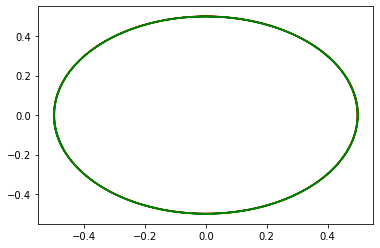

In [48]:
x=np.zeros(2)
y=np.zeros(2)

x0=np.zeros(10000)
y0=np.zeros(10000)
x0[0]=0.5

x1=np.zeros(10000)
y1=np.zeros(10000)
x1[0]=-0.5

x[0]=0.5
x[1]=-0.5
for k in range(9999):
    x,y=RK2(2,x,y,T,0.006)
    x0[k+1]=x[0]
    x1[k+1]=x[1]
    y0[k+1]=y[0]
    y1[k+1]=y[1]
#     print()
plt.plot(x0,y0,'r')
plt.plot(x1,y1,'g')
print(max(x0),min(x0))
print(max(y0),min(y0))
print(max(x1),min(x1))
print(max(y1),min(y1))

In [ ]:
tf=6*(np.pi**2) 
w=6*np.pi/tf
h=np.zeros(100)
err=np.zeros(100)
for k in range(100):
    n=1000+90*k
    h[k]=tf/n
    e=0
    t=0
    x[0]=0.5
    x[1]=-0.5
    y=np.zeros(2)
    for m in range(n):
        x,y=RK2(2,x,y,T,h[k])
        
        t=t+h[k]
        s1=0.5*np.cos(w*t)
        s2=0.5*np.sin(w*t)
        e1=np.sqrt(((s1-x[0])**2)+((s2-y[0])**2))
        
        print(x[0],s1,"\t",y[0],s2,"\t\t",e1)
        
        e+=e1
    
    err[k]=e/n
#     print(err[k],"\t",h[k])

0.49991119328117667 0.4999111761904045 	 0.009423522503945621 0.009424219857704088 		 6.975631576715842e-07
0.49964476919172185 0.4996447363202946 	 0.018844115156588223 0.01884509133496727 		 9.767316716728558e-07
0.49920079086480834 0.4992007750544875 	 0.028258429670905853 0.02825926724101226 		 8.377193142041671e-07
0.498579384564149 0.49857945013030697 	 0.03766311880167969 0.03766340276396636 		 2.914335281316191e-07
0.49778073967276293 0.49778098230154 	 0.047054837535972345 0.04705415665925716 		 7.22815207878216e-07
0.49680510865929123 0.4968056552600042 	 0.05643024428365878 0.05642819243674085 		 2.1234048398871617e-06
0.49565280702185427 0.4956538155347533 	 0.06578600206758645 0.06578217954614125 		 3.95332372396473e-06
0.4943242132094505 0.494325872368957 	 0.07511877971294104 0.07511279456037855 		 6.2108664020514784e-06
0.4928197685209049 0.492822297574499 	 0.084425253035394 0.08441672235636694 		 8.897673670382724e-06
0.49113997698138295 0.49114362536434436 	 0.093702

-0.37333469924240514 -0.38725153009937086 	 -0.32449016593074564 -0.3162850809565574 		 0.01615554395664358
-0.3669971918710451 -0.3812212555057281 	 -0.3315818256089274 -0.3235279807847173 		 0.016345898651832117
-0.3605244092154381 -0.3750555348152341 	 -0.33855083216062615 -0.33065593266182103 		 0.016537322917971962
-0.3539187126112284 -0.3687565586790913 	 -0.3453945937907853 -0.3376664040605074 		 0.016729811488500588
-0.34718251327356475 -0.3623265650935279 	 -0.3521105639304142 -0.3445569041936694 		 0.016923359032539848
-0.34031827143543564 -0.3557678386046473 	 -0.3586962422007633 -0.35132498489941993 		 0.01711796015647279
-0.3333284954672887 -0.34908270949674114 	 -0.365149175361173 -0.35796824151091095 		 0.017313609405540914
-0.3262157409782412 -0.3422735529643493 	 -0.3714669582402302 -0.3644843137107011 		 0.017510301265453995
-0.31898260989919597 -0.335342788268365 	 -0.3776472346498747 -0.3708708863693651 		 0.017708030164018576
-0.31163174954818545 -0.328292877876483

0.46409248918071916 0.4858158664573402 	 0.16493346328193906 0.11824949851184896 		 0.05149075341221401
0.4607970343812754 0.48350074388122105 	 0.1739229475872171 0.12738536284167765 		 0.051780355531863526
0.4573271405794679 0.4810138357930467 	 0.1828470362589795 0.13647596775864954 		 0.052070486112607686
0.4536840886006697 0.47835602577941927 	 0.19170233792323485 0.14551808341412276 		 0.05236114827536353
0.44986922533180795 0.4755282581475811 	 0.20048548597246743 0.1545084971874605 		 0.05265234527328842
0.4458839632487084 0.472531537589907 	 0.20919313985491203 0.16344401482745796 		 0.052944080491092976
0.44172977991823364 0.4693669288269419 	 0.2178219863549342 0.1723214615872452 		 0.05323635744429923
0.43740821747537956 0.4660355562291105 	 0.226368740864022 0.1811376833522599 		 0.05352917977844605
0.432920882075504 0.46253860341723435 	 0.23483014864189908 0.1898895477608876 		 0.053822551268244055
0.42826944332187283 0.4588773128419962 	 0.24320298606727103 0.1985739453

0.4208471800059518 0.3259168626504191 	 -0.24109960634835756 -0.37918095764437837 		 0.16756558336650537
0.42558299083072076 0.3330059337171054 	 -0.23263057983905844 -0.37297057271210926 		 0.16812443339213237
0.4301488495145626 0.33997668936118974 	 -0.22406818279223 -0.3666276731112984 		 0.16868380700813604
0.4345428984074025 0.3468266529063826 	 -0.21541581662031298 -0.3601545124439726 		 0.1692436994204779
0.4387633477564627 0.35355339059325447 	 -0.206676920037312 -0.3535533905932931 		 0.1698041059654853
0.4428084764621036 0.3601545124439347 	 -0.19785496770708177 -0.34682665290642195 		 0.1703650221114888
0.44667663280683056 0.36662767311126127 	 -0.18895346887616501 -0.3399766893612298 		 0.17092644346040603
0.45036623515714813 0.3729705727120729 	 -0.17997596599171353 -0.33300593371714615 		 0.17148836574928042
0.4538757726379536 0.37918095764434273 	 -0.1709260333050301 -0.32591686265046055 		 0.17205078485178177
0.45720380577917336 0.38525662138787703 	 -0.1618072754612750

-0.4269332335031042 -0.2599086713103248 	 0.22428451156669652 0.4271387158496658 		 0.2627680204495331
-0.43135297195050043 -0.26791339748946896 	 0.21555878122904898 0.4221639627510262 		 0.26343537259018995
-0.4355948376390313 -0.27582293531418567 	 0.20674465108224505 0.4170392168066051 		 0.2641038908189298
-0.439657044406392 -0.2836344745633494 	 0.19784573817753123 0.4117662988142336 		 0.26477357980649835
-0.44353787946699064 -0.2913452398342591 	 0.18886569603235445 0.40634708221656773 		 0.2654444440838523
-0.4472357041640512 -0.29895249152873116 	 0.17980821314545567 0.4007834924354594 		 0.26611648804000604
-0.45074895469174364 -0.3064535268264606 	 0.1706770114963019 0.39507750618786663 		 0.2667897159199433
-0.45407614278701436 -0.31384568064532253 	 0.16147584502945983 0.38923115078353404 		 0.26746413182257595
-0.4572158563907979 -0.3211263265882651 	 0.1522084981245211 0.38324650340469757 		 0.26813973969875726
-0.4601667602783071 -0.3282928778764512 	 0.142878784052196

0.37428136476208435 0.4872634363932781 	 0.2960032871692373 -0.11213538047473602 		 0.42348804060595846
0.3680615203203206 0.4892904521627267 	 0.3036918987838195 -0.10293130438498511 		 0.4243098906116963
0.3616830769651831 0.4911436253643357 	 0.31125015277033324 -0.09369065729290751 		 0.42513185395413855
0.3551487496884595 0.49282229757449114 	 0.3186747633945056 -0.08441672235641287 		 0.42595393139682414
0.3484613218533197 0.4943258723689502 	 0.32596250111981756 -0.07511279456042343 		 0.42677612386603786
0.34162364403835377 0.49565381553474724 	 0.33311019403638825 -0.06578217954618686 		 0.42759843244982676
0.33463863285162443 0.4968056552599989 	 0.34011472926623815 -0.05642819243678713 		 0.42842085839693883
0.3275092697152128 0.4977809823015357 	 0.3469730543442991 -0.047054156659302356 		 0.4292434031157101
0.3202385996207505 0.4985794501303035 	 0.353682178574549 -0.03766340276401221 		 0.430066068172888
0.3128297298564434 0.4992007750544849 	 0.36023917436065916 -0.02825

-0.03764585901365158 -0.03599627160458327 	 0.49786546821469924 0.4987025851452638 		 0.0018498387431326254
-0.046290294042892755 -0.044614608356555015 	 0.4971155599244132 0.4980055589259935 		 0.001897372062145733
-0.054920684106845294 -0.05321960327516428 	 0.49621517434085693 0.497159605989097 		 0.0019456688140868112
-0.06353440855897678 -0.0618086830685565 	 0.49516456182797913 0.49616497931366615 		 0.001994733970722581
-0.07212885101498996 -0.07037927920423591 	 0.4939640184124244 0.495021976339124 		 0.0020445724481298624
-0.08070140014883152 -0.07892882867717646 	 0.4926138857144713 0.49373093887627595 		 0.0020951891056473116
-0.08924945048764865 -0.08745477477627862 	 0.4911145508650888 0.4922922530050929 		 0.0021465887448581466
-0.09777040320545109 -0.09595456784894404 	 0.48946644640912573 0.49070634895925525 		 0.0021987761086019525
-0.10626166691523686 -0.10442566606354048 	 0.48767005019465204 0.48897370099749327 		 0.002251755880014178
-0.11472065845933978 -0.1128655

-0.23374056636585713 -0.25166218600968293 	 -0.4357169282932356 -0.43204877517802054 		 0.018293162600672
-0.22600213796232477 -0.24415343591440122 	 -0.4397491146996292 -0.4363359940816164 		 0.018469407399755926
-0.21819358429123267 -0.23657167263853143 	 -0.44364452155853756 -0.44049272832250874 		 0.018646391927228053
-0.21031731766692108 -0.22891916348029517 	 -0.4474019188126177 -0.44451773484472124 		 0.01882411179379294
-0.202375772168498 -0.22119819689420966 	 -0.45102011885737525 -0.4484098099849628 		 0.01900256258941085
-0.1943714028943801 -0.21341108180673082 	 -0.4544979769295838 -0.45216778983258066 		 0.01918173988439143
-0.18630668520984484 -0.20556014692578037 	 -0.4578343914826447 -0.45579055057762174 		 0.019361639230500095
-0.17818411398782233 -0.1976477400443517 	 -0.46102830454876 -0.45927700884690537 		 0.019542256162064394
-0.17000620284315732 -0.1896762273384123 	 -0.46407870208779645 -0.4626261220280011 		 0.01972358619709018
-0.161775483360574 -0.18164799265

0.27089579691050003 0.3200425476727724 	 0.41187728628857495 0.3841520111611043 		 0.05642777677157644
0.2635082244089065 0.3133518187573705 	 0.4166314057155363 0.38962884605923115 		 0.05668793633187359
0.2560366528628461 0.30656738314132365 	 0.42125305537239427 0.39498916389425276 		 0.05694863209991827
0.24848345106299013 0.29969126968497084 	 0.42574074062038186 0.4002313616829771 		 0.05720986891956476
0.24085101458560712 0.29272553466457063 	 0.4300930090632248 0.4053538717655738 		 0.05747165168719979
0.2331417650413433 0.28567226115737676 	 0.43430845103056204 0.4103551622743785 		 0.057733985350343825
0.22535814931521914 0.27853355841870475 	 0.43838570004804595 0.41523373759199045 		 0.057996874906236666
0.21750263879807796 0.2713115612511639 	 0.44232343329396107 0.41998813879853314 		 0.05826032540039327
0.2095777286097245 0.2640084293662553 	 0.4461203720422053 0.4246169441079371 		 0.058524341925144836
0.20158593681399511 0.25662634673851564 	 0.44977528209148115 0.4291

-0.44048212407064175 -0.4854178029555865 	 -0.21173314640400534 -0.11987308527676839 		 0.10226185049739017
-0.43654844805949305 -0.48327233936801356 	 -0.2196458676105792 -0.12824915594953265 		 0.10264736198004759
-0.432472314936285 -0.48098235497754677 	 -0.22748656081027135 -0.13658687418728485 		 0.10303386342830191
-0.4282550318085569 -0.47854853459553487 	 -0.2352526552536922 -0.14488374662627332 		 0.10342135209469341
-0.4238979522856215 -0.47597160604694766 	 -0.24294160370366394 -0.15313729211752852 		 0.10380982513959927
-0.41940247605940345 -0.4732523399527221 	 -0.25055088327835534 -0.1613450424688442 		 0.10419927963215861
-0.4147700484699562 -0.4703915494993101 	 -0.25807799628701417 -0.16950454318288363 		 0.10458971255122576
-0.41000216005578716 -0.4673900901954998 	 -0.2655204710580182 -0.17761335419118277 		 0.10498112078635854
-0.4051003460891257 -0.46424885961657764 	 -0.2728758627589682 -0.1856690505838472 		 0.1053735011388252
-0.40006618609627304 -0.460968797135

0.44001309131053834 0.4985967656395787 	 0.20683299315525386 0.03743347824810067 		 0.17924352861029566
0.43615123827893815 0.4978749026218978 	 0.2148510769471705 0.046049770240857615 		 0.1797322783633509
0.4321429540435019 0.4970041519588743 	 0.22279738922460632 0.05465229122040698 		 0.18022138879128333
0.4279895599988598 0.4959847740452686 	 0.23066924959529225 0.06323846863471543 		 0.18071086172747228
0.423692426718889 0.49481707372226935 	 0.23846400177197855 0.07180573481923486 		 0.18120069910198316
0.4192529735210959 0.49350140018633276 	 0.24617901447684898 0.08035152776474781 		 0.181690902940998
0.4146726680143298 0.4920381468847563 	 0.25381168233814055 0.08887329188352938 		 0.1821814753662078
0.4099530256299657 0.49042775139801903 	 0.26135942677866036 0.09736847877358891 		 0.18267241859417485
0.4050956091367002 0.4886706953089261 	 0.2688196968958946 0.10583454798075491 		 0.18316373493567234
0.40010202813910883 0.4867675040585922 	 0.2761899703334063 0.114268967758

-0.34025863120950717 -0.14901608981474562 	 0.34472374468125105 0.47727791167864 		 0.23268931395209955
-0.3465374318599012 -0.15724704542138024 	 0.3383613250109455 0.47462971536372056 		 0.23323791417216216
-0.3526978165144405 -0.16543097688157452 	 0.33188365528117436 0.4718395827906005 		 0.23378736251368526
-0.3587376595557519 -0.17356543682094114 	 0.3252929296340855 0.46890834833809036 		 0.23433766355854319
-0.36465487584384076 -0.181647992659367 	 0.3185913816064886 0.4658368885809952 		 0.2348888218223147
-0.3704474214497089 -0.18967622733847073 	 0.3117812833864493 0.4626261220279771 		 0.23544084175263966
-0.3761132943753821 -0.19764774004440971 	 0.30486494505615946 0.4592770088468804 		 0.23599372772760493
-0.3816505352600905 -0.20556014692583752 	 0.29784471382132954 0.455790550577596 		 0.23654748405414333
-0.3870572280723469 -0.21341108180678792 	 0.2907229732273559 0.45216778983255373 		 0.2371021149664546
-0.3923315007876751 -0.22119819689426629 	 0.28350214236251975

-0.03630600901268742 -0.32663756904979563 	 -0.4785882373453037 -0.3785602970270918 		 0.3070798000485944
-0.027337893048620807 -0.3200425476727367 	 -0.47916193909110044 -0.38415201116113407 		 0.3077383649203985
-0.018360232954688083 -0.3133518187573339 	 -0.4795680180467255 -0.3896288460592605 		 0.3083976172932446
-0.009376161152401054 -0.3065673831412863 	 -0.47980630320548834 -0.3949891638942818 		 0.3090575505438809
-0.0003888133952909007 -0.299691269684933 	 -0.47987668208778167 -0.4002313616830055 		 0.30971815801368924
0.00859867232441581 -0.2927255346645319 	 -0.47977910081100955 -0.4053538717656018 		 0.3103794330105969
0.01758315687066655 -0.2856722611573375 	 -0.4795135641390973 -0.4103551622744058 		 0.31104136881099537
0.02656150105961654 -0.27853355841866473 	 -0.47908013551154843 -0.4152337375920173 		 0.3117039586616684
0.03553056675644486 -0.2713115612511249 	 -0.47847893705202044 -0.41998813879855834 		 0.312367195781729
0.04448721797257026 -0.2640084293662155 	 -0

0.4936322916288894 0.4936341773606723 	 0.07953878644131884 0.07953174800953602 		 7.286666337798034e-06
0.4922981854465818 0.4923007951206525 	 0.08741574651644927 0.08740667665329319 		 9.43783960582762e-06
0.49083829864783374 0.49084179266526523 	 0.09527062686510544 0.09525930176706512 		 1.185183544580353e-05
0.48925298821610913 0.489257542287638 	 0.10310141748921128 0.1030876195993491 		 1.453001487057179e-05
0.48754264328000174 0.48754844824036514 	 0.11090611403363991 0.11088963260112268 		 1.747384281263282e-05
0.48570768502609585 0.485714946632355 	 0.11868271830068555 0.11866334993555744 		 2.0684885622082767e-05
0.48374856660358756 0.48375750531754785 	 0.12642923876322443 0.12640678798602015 		 2.4164809213817165e-05
0.4816657730206857 0.48167662377553433 	 0.1341436910764325 0.13411797086223146 		 2.7915377470727492e-05
0.47945982103281337 0.4794728329841028 	 0.14182409858792847 0.1417949309044532 		 3.193845074001804e-05
0.4771312590226339 0.4771466952837504 	 0.149468

-0.48681558350190457 -0.4881319915089616 	 0.10132070391817892 0.10829200739433652 		 0.007094505070667778
-0.48835753017035033 -0.48979951788529186 	 0.0934361862637927 0.10048100456969802 		 0.007190882667187738
-0.4897718805782002 -0.49134206229625976 	 0.08552751726199834 0.092644362043561 		 0.0072880004303364386
-0.4910582484802386 -0.4927592311313673 	 0.07759676035059973 0.08478407948915703 		 0.0073858579988321585
-0.4922162809774565 -0.49405066277215687 	 0.06964598527899792 0.07690216261193514 		 0.007484454960500466
-0.4932456586223613 -0.49521602768448486 	 0.061677267569683135 0.06900062263776689 		 0.007583790852482794
-0.4941460955155969 -0.4962550285026093 	 0.05369268797793639 0.06108147579974169 		 0.007683865161451448
-0.49491733939384347 -0.49716740010506816 	 0.045694331949880374 0.05314674282368671 		 0.007784677323834554
-0.4955591717089678 -0.4979529096823304 	 0.03768428907902059 0.04519844841253807 		 0.00788622672604624
-0.4960714076983986 -0.498611356796202

0.2913208151868061 0.2719472688941691 	 -0.39874621728218335 -0.419576790279208 		 0.02844726818760146
0.2977964416012965 0.2786146910424839 	 -0.3939251883710335 -0.4151793033561539 		 0.028630001018184154
0.3041927296613187 0.2852110191811197 	 -0.38899894276892516 -0.41067587528081917 		 0.028813100074086183
0.3105079644547645 0.2917345701274174 	 -0.3839687791029622 -0.4060676551913129 		 0.028996562881457976
0.31674045221285263 0.29818367926924766 	 -0.3788360240397725 -0.4013558189654841 		 0.029180387001830795
0.3228885207700195 0.3045567009897694 	 -0.37360203194311936 -0.3965415689208739 		 0.029364570032768003
0.3289505200182955 0.3108520090873413 	 -0.36826818452394683 -0.3916261335079204 		 0.029549109608510742
0.33492482235604343 0.31706799719047885 	 -0.36283589048294834 -0.38661076699649544 		 0.02973400340061785
0.34080982313093516 0.32320307916775204 	 -0.35730658514574803 -0.38149674915585297 		 0.02991924911860024
0.34660394107704434 0.3292556895325174 	 -0.351681730

-0.031548362518896214 0.029269290881471764 	 0.4920107132378868 0.4991425734309745 		 0.06123438898969303
-0.03964177894029562 0.021292492398943784 	 0.4914067572448518 0.4995464240362861 		 0.0614755203241065
-0.04772440655333641 0.013310260718851682 	 0.49066935488544555 0.49982280556172726 		 0.061717228294130566
-0.055794044204554215 0.005324632664358664 	 0.48979868869131293 0.49997164748312445 		 0.06195951704771819
-0.0638484936772288 -0.0026623540747204434 	 0.48879497751643547 0.4999929118205385 		 0.06220239072685751
-0.07188556029099005 -0.010648661461875757 	 0.4876584764923819 0.49988659314795625 		 0.06244585346641932
-0.07990305350078779 -0.018632251633947376 	 0.48638947697365736 0.4996527185946748 		 0.06268990939300442
-0.08789878749506137 -0.02661108742112619 	 0.48498830647315927 0.49929134783837903 		 0.0629345626237906
-0.09587058179294615 -0.03458313286677776 	 0.48345532858775103 0.49880257308991377 		 0.06317981726538043
-0.10381626184035314 -0.0425463537469566

-0.2376752274769389 -0.33125463174124864 	 -0.4268221284124436 -0.3745268601181626 		 0.10720027979643497
-0.2305018718613165 -0.3252298561740332 	 -0.43071012139674364 -0.37977037885150766 		 0.10755579195248031
-0.22326444127531256 -0.31912209182235557 	 -0.4344781106933941 -0.38491699171499827 		 0.10791197191595435
-0.2159649389098114 -0.31293289720223183 	 -0.43812503207991094 -0.3899653854492952 		 0.10826881591199917
-0.2086053857716382 -0.3066638516082082 	 -0.4416498547010323 -0.3949142718576006 		 0.10862632013438102
-0.20118782012896783 -0.3003165547103748 	 -0.4450515813693032 -0.3997623881343647 		 0.10898448074649261
-0.19371429695162412 -0.29389262614618067 	 -0.4483292488564639 -0.4045084971875143 		 0.1093432938823625
-0.18618688734642228 -0.28739370510714674 	 -0.4514819281755538 -0.40915138795412437 		 0.1097027556476616
-0.1786076779877075 -0.28082144992059915 	 -0.4545087248536461 -0.4136898757094406 		 0.11006286212072897
-0.17097877054324537 -0.27417753762650987 

0.4838948990166087 0.4897995178852988 	 0.05742731413504401 -0.10048100456966405 		 0.15801867497271374
0.4828598968364809 0.49134206229626604 	 0.06555851596230973 -0.09264436204352758 		 0.158430103642638
0.48168818548383513 0.492759231131373 	 0.07367143892071949 -0.08478407948912417 		 0.1588418061036268
0.48038007740057337 0.49405066277216203 	 0.08176378310698279 -0.07690216261190197 		 0.1592537824833997
0.47893592374564964 0.49521602768448947 	 0.08983325379471845 -0.06900062263773409 		 0.1596660329776469
0.47735611431205005 0.49625502850261327 	 0.09787756208662951 -0.06108147579970948 		 0.16007855784999073
0.4756410774327817 0.4971674001050716 	 0.10589442556539636 -0.05314674282365422 		 0.16049135743193738
0.4737912798758886 0.49795290968233336 	 0.11388156894310246 -0.045198448412506184 		 0.1609044321228114
0.4718072267285167 0.4986113567962046 	 0.12183672470900794 -0.0372386207296662 		 0.16131778238966415
0.46968946127005384 0.49914257343097407 	 0.12975763377548605 

-0.33985900783860734 -0.16460093141600665 	 0.34682648870758 0.4721297844628986 		 0.2154444459216691
-0.3456712211104217 -0.17212150566106973 	 0.34099191888286234 0.46944029150571037 		 0.21591314958105043
-0.35138370032904537 -0.17959815972394905 	 0.33505925511078877 0.46663101163957255 		 0.2163825295097891
-0.35699478272205176 -0.18702898578954028 	 0.32903019516819343 0.46370266170740915 		 0.2168525890337948
-0.362502834300488 -0.19441208773664925 	 0.3229064651417531 0.46065598893521115 		 0.21732333143432425
-0.3679062503429721 -0.20174558162183032 	 0.31668981894201886 0.4574917707413647 		 0.21779475994697928
-0.3732034558716204 -0.20902759616010894 	 0.3103820378091353 0.4542108145382785 		 0.21826687776072579
-0.3783929061196626 -0.21625627320247445 	 0.30398492981038316 0.4508139575263578 		 0.21873968801692448
-0.383473086990602 -0.2234297682100281 	 0.29750032932968545 0.44730206648037424 		 0.21921319380836649
-0.3884425155087839 -0.23054625072465096 	 0.2909300965492

0.36184246930859726 0.09787154063040024 	 -0.3167595006121692 -0.4903276063354295 		 0.3159217284575258
0.36724683579364337 0.10569131181474407 	 -0.3104702075139899 -0.48870169490894805 		 0.3165086969151017
0.37254229376925946 0.11348411378537908 	 -0.30408854585920403 -0.48695108164819506 		 0.31709595962695675
0.37772725644451305 0.12124795805585231 	 -0.29761639477127205 -0.48507621325652145 		 0.31768351239631926
0.38280016933594196 0.12898086352883842 	 -0.29105566077428496 -0.48307756814341435 		 0.31827135106710197
0.38775951074312864 0.13668085700164861 	 -0.28440827723950735 -0.4809556563024235 		 0.3188594715248955
0.3926037922148286 0.14434597366974242 	 -0.27767620382362573 -0.47871101918102327 		 0.31944786969793343
0.39733155900550804 0.1519742576280792 	 -0.2708614258988628 -0.4763442295424541 		 0.320036541558062
0.40194139052214756 0.15956376237020764 	 -0.2639659539751201 -0.4738558913195698 		 0.3206254831216899
0.40643190076117247 0.16711255128495647 	 -0.25699182

0.48596089765197836 0.48596757135510277 	 0.1176426384011542 0.1176244855088562 		 1.9340781064262148e-05
0.4841602038240043 0.48416830692130175 	 0.12484489544338377 0.12482407849834166 		 2.2338428474217012e-05
0.4822526676107711 0.48226238700388374 	 0.13201980659782714 0.13199617449500672 		 2.5552747135919317e-05
0.4802386982233461 0.4802502314502605 	 0.13916578532735785 0.1391391935867503 		 2.8985099475396796e-05
0.47811872845575204 0.47813228351006376 	 0.14628125113090099 0.14625156226670538 		 3.263691398736554e-05
0.4758932145972349 0.4759090097375032 	 0.15336462989432878 0.15333171377986057 		 3.6509684301299326e-05
0.473562636339305 0.4735808998885914 	 0.1604143542401012 0.16037808846819426 		 4.0604968224874157e-05
0.47112749667757076 0.4711484668132575 	 0.16742886387557337 0.1673891341142453 		 4.4924386761604614e-05
0.4685883218083823 0.46861224634237325 	 0.17440660593989238 0.17436330628304478 		 4.9469623101506505e-05
0.46594566102030593 0.4659727971697173 	 0.18

-0.01744481587911429 -0.016076246337900755 	 0.49912451192571805 0.4997414874749575 		 0.001501213315121056
-0.02488040078316884 -0.023491451452519654 	 0.49879457482148465 0.4994478468355369 		 0.0015349086511759235
-0.0323104375909488 -0.030901481730042205 	 0.4983536428934006 0.49904418484427593 		 0.0015690776921178024
-0.039733269041201016 -0.03830470484478409 	 0.49780180208369684 0.4985305904222468 		 0.0016037232010826321
-0.04714723910993197 -0.04569948997058376 	 0.497139163085391 0.49790717670709317 		 0.00163884791655709
-0.054550693380140396 -0.05308420814004989 	 0.49636586132587907 0.4971740810281082 		 0.0016744545519286622
-0.06194197941135636 -0.06045723260340035 	 0.4954820569450028 0.4963314648759822 		 0.0017105457950450259
-0.06931944710890425 -0.06781693918681272 	 0.49448793476759534 0.495379513867229 		 0.0017471243077844748
-0.07668144909280718 -0.07516170665020631 	 0.49338370427050704 0.49431843770329703 		 0.001784192725637508
-0.08402634106625027 -0.082489

-0.4662627277670538 -0.4727816543440474 	 -0.17038402949195203 -0.16271910556448402 		 0.010062179810066262
-0.4636210303321835 -0.47031456480192363 	 -0.17737053322038876 -0.16971803126119858 		 0.010166818083009496
-0.46087449959705257 -0.4677438715611603 	 -0.18431672075994496 -0.17667957045730207 		 0.010272017130360911
-0.45802374481650115 -0.4650701409094037 	 -0.1912210167311644 -0.18360218962340133 		 0.010377775503259716
-0.4550693989551912 -0.4622939618319954 	 -0.19808185487287563 -0.19048436380364034 		 0.010484091725467071
-0.45201211855247736 -0.4594159458822276 	 -0.20489767839956213 -0.19732457695162584 		 0.01059096429365578
-0.4488525835818832 -0.45643672704662674 	 -0.21166694035675027 -0.20412132226439053 		 0.010698391677703667
-0.44559149730521247 -0.4533569616052943 	 -0.21838810397433409 -0.21087310251432187 		 0.010806372320988732
-0.4422295861213249 -0.4501773279873383 	 -0.22505964301775538 -0.21757843037897956 		 0.010914904640690224
-0.4387675994096074 -0.4

0.2572683077604603 0.23848879483214938 	 -0.42207574851477686 -0.4394577280461785 		 0.02558912499978578
0.2636341354707009 0.24498479380850566 	 -0.4181211849139324 -0.43586976357921864 		 0.02574509640827055
0.26993955341312975 0.25142682607268985 	 -0.41407059772376925 -0.4321857831199603 		 0.025901370919699306
0.2761831096369512 0.2578134725353961 	 -0.40992490422923883 -0.42840659819760074 		 0.026057946564973504
0.2823633660373164 0.2641433263080337 	 -0.40568504372376485 -0.4245330413135444 		 0.026214821397083265
0.28847889868973287 0.27041499301264343 	 -0.40135197730149913 -0.4205659657580152 		 0.026371993491541672
0.29452829818137705 0.2766270910890618 	 -0.3969266876444842 -0.41650624542208714 		 0.0265294609468125
0.3005101699392311 0.2827782520992577 	 -0.39241017880476875 -0.41235477460517983 		 0.026687221884739907
0.3064231345549675 0.28886712102878076 	 -0.38780347598152304 -0.40811246781805594 		 0.026845274450972033
0.3122658281065051 0.2948923565852516 	 -0.38310

-0.14391608698253824 -0.08736539492172722 	 0.4718000088409853 0.4923081227952375 		 0.060154497009926616
-0.15110107543216353 -0.09466242482508064 	 0.46952856055946485 0.49095725407232343 		 0.0603697787640174
-0.15825066791880085 -0.10193860192465627 	 0.4671473449459081 0.4894982343560051 		 0.06058556786852196
-0.1653631853457284 -0.10919232338074489 	 0.4646569069994729 0.4879313850478516 		 0.060801867260090736
-0.17243695690958832 -0.1164219913003039 	 0.4620578174377487 0.48625705130277747 		 0.06101867986005328
-0.17947032049481604 -0.12362601308894461 	 0.4593506725720599 0.4844756019530107 		 0.06123600857370792
-0.18646162306621794 -0.13080280180176115 	 0.45653609417671226 0.4825874294268441 		 0.06145385628960568
-0.19340922105960523 -0.1379507764929146 	 0.4536147293522101 0.4805929496621875 		 0.06167222587883769
-0.2003114807703905 -0.14506836256388728 	 0.4505872503824728 0.478492602014945 		 0.06189112019433485
-0.20716677874005499 -0.15215399211035147 	 0.447454354

-0.3016422086226948 -0.37838974968819516 	 -0.38561947849803213 -0.3268351225479065 		 0.09667360324344872
-0.2956319322642462 -0.37349730835629347 	 -0.3902170949689083 -0.3324150427561963 		 0.09697470821795258
-0.2895512335035655 -0.36852259080869737 	 -0.3947215383919466 -0.3379217365953919 		 0.09727637307559689
-0.2834015525852542 -0.3634666929058729 	 -0.3991317245595079 -0.34335399101811515 		 0.09757859526338232
-0.2771843465328522 -0.35833072839117674 	 -0.40344659146367035 -0.34871060937494963 		 0.09788137220081143
-0.2709010888076383 -0.35311582864551844 	 -0.4076650995572297 -0.3539904116780409 		 0.09818470128048794
-0.2645532689633506 -0.34782314243813117 	 -0.4117862320094709 -0.359192234861033 		 0.09848857986871301
-0.2581423922969065 -0.3424538356735123 	 -0.41580899495664714 -0.3643149330352779 		 0.0987930053060864
-0.2516699794952041 -0.33700909113459504 	 -0.41973241774710357 -0.36935737774225413 		 0.09909797490812117
-0.24513756627808536 -0.33149010822219327 	

0.42868960141220575 0.4916462264657195 	 0.2335364730453721 0.0910164161128007 		 0.1558059795585269
0.42499648503659143 0.4902412435583186 	 0.24018717892107258 0.09830322026461463 		 0.1561663735846676
0.4211999661829695 0.48872826738458175 	 0.24677967167130244 0.10556836959650723 		 0.15652700500819253
0.4173009560991472 0.48710763123192863 	 0.2533123400338257 0.1128102636980317 		 0.15688787508205648
0.41330039119734074 0.4853796921037606 	 0.2597835869135003 0.12002730728154569 		 0.15724898510236338
0.4091992328354438 0.4835448306408194 	 0.26619182977617256 0.1272179105336246 		 0.1576103364080951
0.4049984670921167 0.4816034510373367 	 0.27253550103921836 0.13438048946527784 		 0.15797193038082133
0.4006991045357477 0.47955598095199503 	 0.27881304845863486 0.14151346626088188 		 0.15833376844439986
0.39630217998733946 0.47740287141372234 	 0.28502293551258573 0.14861526962574498 		 0.15869585206467543
0.3918087522773738 0.4751445967223345 	 0.2911636417813048 0.1556843351322

-0.44644951554719847 -0.33517761916859556 	 0.19191871733162372 0.3710201660401654 		 0.21085246940263455
-0.44938550791008125 -0.34064724391182594 	 0.1848645870169658 0.3660047202090117 		 0.2112717631634346
-0.452210225836995 -0.3460418288475703 	 0.1777649118867098 0.36090864867418854 		 0.2116916551113562
-0.4549229560344003 -0.3513601856244695 	 0.17062144448360142 0.3557330740287418 		 0.21211214677108273
-0.4575230127684808 -0.35660114268316023 	 0.16343594863049557 0.3504791363791351 		 0.21253323962310255
-0.46000973804523954 -0.36176354551434814 	 0.1562101989976411 0.3451479930941047 		 0.21295493510330926
-0.46238250178381235 -0.36684625691313544 	 0.14894598066706388 0.3397408185497024 		 0.21337723460259825
-0.46464070198295127 -0.37184815722952613 	 0.14164508869415438 0.33425880387060203 		 0.2138001394664889
-0.46678376488063233 -0.3767681446150741 	 0.13430932766656675 0.3287031566677062 		 0.21422365099474297
-0.46881114510674415 -0.3816051352656004 	 0.126940511260

0.17230196897254202 -0.10435908316170818 	 -0.450672981855465 -0.4889879157623915 		 0.27930157881458967
0.17944633477780633 -0.09709021342035286 	 -0.44786568329193455 -0.49048291556178625 		 0.2798011632851002
0.18654543957792064 -0.08979995606745907 	 -0.44494518448937426 -0.4918698688578946 		 0.280301094713322
0.1935974868151396 -0.08248991704441999 	 -0.4419122079118674 -0.493148470124368 		 0.2808013695397864
0.2006006913510148 -0.07516170665024795 	 -0.4387675045834307 -0.4943184377032907 		 0.2813019842125078
0.20755327992115605 -0.067816939186855 	 -0.435511853909317 -0.49537951386722323 		 0.28180293518774696
0.21445349158722582 -0.0604572326034415 	 -0.43214606349006546 -0.4963314648759772 		 0.28230421893076224
0.22129957818605064 -0.053084208140091536 	 -0.4286709689283417 -0.49717408102810373 		 0.2828058319165689
0.22808980477573448 -0.04569948997062603 	 -0.4250874336286122 -0.4979071767070893 		 0.283307770630678
0.23482245007865948 -0.03830470484482519 	 -0.421396348

0.45446946960683426 0.471148466813242 	 0.16111010518641453 -0.16738913411428882 		 0.3289223907990335
0.45183751585911414 0.473580899888577 	 0.16834607723314338 -0.16037808846823687 		 0.32944248642990964
0.4490901841909595 0.47590900973748923 	 0.17553929793787226 -0.1533317137799039 		 0.329962712669127
0.4462281615105033 0.47813228351005027 	 0.18268792477897 -0.14625156226674943 		 0.33048306936734745
0.44325216419576446 0.4802502314502481 	 0.18979012615451862 -0.13913919358679339 		 0.33100355642507767
0.4401629379229355 0.48226238700387175 	 0.19684408185438576 -0.13199617449505055 		 0.33152417379262306
0.4369612574870979 0.48416830692129026 	 0.20384798352962769 -0.12482407849838618 		 0.3320449214700157
0.4336479266154055 0.4859675713550918 	 0.2108000351591015 -0.11762448550890142 		 0.33256579950694637
0.43022377777277826 0.4876597839525713 	 0.21769845351316527 -0.11039898149589725 		 0.33308680800267554
0.4266896719601522 0.48924457194303983 	 0.2245414686143459 -0.1031

0.1448803016702125 0.1456948734446613 	 0.4782554631482372 0.4783022097502207 		 0.0008159120176377265
0.138217254878428 0.13905183888872352 	 0.48021438577300085 0.48027553144175944 		 0.0008368209265122839
0.1315274210694674 0.13238209308268695 	 0.48208040571033905 0.4821565943042227 		 0.0008580611586703499
0.12481209433335483 0.12568691725555048 	 0.4838531522696533 0.48394503699366154 		 0.0008796351219141977
0.11807257395267362 0.11896759752130855 	 0.48553227276936267 0.48564051595805713 		 0.0009015452158992033
0.11131016415218828 0.11222542463189486 	 0.4871174326105131 0.4872427055033158 		 0.0009237938316441994
0.10452617384741107 0.10546169372923415 	 0.4886083153469093 0.48875129785583304 		 0.0009463833510498823
0.09772191639216166 0.09867770409645135 	 0.4900046227517538 0.4901660032216159 		 0.0009693161464270949
0.09089870932516805 0.0918747589082845 	 0.49130607488077904 0.491486549841951 		 0.0009925945800334686
0.08405787411575781 0.08505416498075125 	 0.4925124101

-0.48567299607145864 -0.48671902718034527 	 0.10847600140561625 0.11447527497507197 		 0.00608978361207757
-0.487120107171646 -0.4882588516855029 	 0.10166296237969914 0.10771858591141102 		 0.006161762363614966
-0.48847171654112936 -0.48970488380068183 	 0.09483016204204314 0.10094120457851034 		 0.006234223477911554
-0.48972754980812805 -0.49105684574943703 	 0.08797893817080266 0.09414443288168245 		 0.00630716677514296
-0.4908873513278418 -0.4923144778257909 	 0.0811106324190807 0.08732957645104465 		 0.006380592050417309
-0.49195088423809297 -0.49347753844412195 	 0.07422659005295752 0.08049794439071187 		 0.00645449907385974
-0.49291793051130683 -0.4945458041855722 	 0.06732815968870784 0.07365084902732409 		 0.006528887590701639
-0.49378829100281757 -0.4955190698409647 	 0.060416693029257916 0.0667896056579549 		 0.0066037573213726984
-0.49456178549548935 -0.4963971484502238 	 0.05349354459993371 0.05991553229744724 		 0.00667910796159388
-0.4952382527406413 -0.497179871338289 	

-0.21207565197301514 -0.22699524986978256 	 -0.44781787095026776 -0.4455032620941793 		 0.015098073239917402
-0.20573774182143653 -0.22079898438765957 	 -0.450745724675609 -0.4486065185587232 		 0.01521240383532894
-0.1993591124399485 -0.21456030438631402 	 -0.45358419798281224 -0.45162359967305993 		 0.015327106130070722
-0.19294102234532523 -0.20828040828888808 	 -0.4563327201989798 -0.4545539258691031 		 0.01544217829172993
-0.18648473811479363 -0.20196050243595698 	 -0.4589907383443838 -0.4573969342440063 		 0.01555761848209978
-0.17999153413767865 -0.19560180085379497 	 -0.46155771724719424 -0.46015207866829455 		 0.015673424857470687
-0.1734626923654034 -0.18920552502116497 	 -0.46403313965472665 -0.4628188298907741 		 0.015789595568922697
-0.16689950205989298 -0.1827729036346804 	 -0.4664165063411857 -0.46539667564019815 		 0.015906128762622932
-0.1603032595404309 -0.17630517237277651 	 -0.4687073362118815 -0.4678851207236725 		 0.016023022580120082
-0.15367526792901762 -0.16980

0.49419674663546925 0.49973855511050624 	 0.018081019262542776 -0.016167143720012545 		 0.0346936349904945
0.4938908161434094 0.49991462522902647 	 0.025081105707360968 -0.009239452479559276 		 0.03484518603999325
0.49348571585618367 0.4999946639344474 	 0.03207632988174431 -0.0023099863806944395 		 0.03499693059663937
0.49298151716918903 0.4999786558516839 	 0.03906528655203758 0.004619923456451262 		 0.03514886895091854
0.4923783113945963 0.4998666040558185 	 0.04604657146115995 0.011548945826506942 		 0.0353010014221804
0.4916762097490091 0.49965853007151123 	 0.053018781610951624 0.01847574969457893 		 0.035453328358654466
0.4908753433371194 0.4993544738688644 	 0.05998051554438094 0.02539900445193941 		 0.03560585013745672
0.4899758631313611 0.4989544938557447 	 0.06693037362755533 0.03231738017162922 		 0.035758567164594676
0.48897793994756383 0.4984586668665634 	 0.07386695833147917 0.039229547863929654 		 0.0359114798749669
0.4878817644166096 0.49786708814751657 	 0.08078887451

0.07770149788615843 0.1279213887971914 	 0.4879926868571886 0.4833592021346007 		 0.05043318970470246
0.07075567771567179 0.12120997383904303 	 0.4890372511365911 0.48508570607876966 		 0.05060880067388307
0.0637955114589246 0.11447527497503984 	 0.4899828294056713 0.4867190271803528 		 0.05078475002414956
0.05682240911169924 0.10771858591137859 	 0.4908292198768642 0.4882588516855101 		 0.05096104007438765
0.049837783579250394 0.10094120457847716 	 0.49157624083799223 0.4897048838006887 		 0.05113767314793739
0.04284305039060943 0.09414443288164917 	 0.49222373069522884 0.4910568457494434 		 0.05131465157212567
0.03583962741224046 0.08732957645101108 	 0.49277154801199824 0.49231447782579685 		 0.051491977677792775
0.02882893456110621 0.08049794439067755 	 0.49321957154380175 0.49347753844412756 		 0.05166965379882086
0.0218123935172013 0.0736508490272897 	 0.4935677002689614 0.4945458041855773 		 0.05184768227166104
0.014791427435611251 0.06678960565792022 	 0.49381585341527273 0.495

-0.30389621623386087 -0.3756659447783909 	 -0.3847413355878057 -0.3299622674394134 		 0.09028643443265291
-0.29831455665689366 -0.37105674297181734 	 -0.38905956982340073 -0.3351371264052174 		 0.0905486365113371
-0.29267125755804885 -0.36637626278775837 	 -0.39329723635526576 -0.34024760699478174 		 0.09081129319196063
-0.2869674787261747 -0.36162540332598686 	 -0.3974534511713571 -0.34529272750713613 		 0.09107440254388971
-0.281204392688842 -0.35680507720582727 	 -0.4015273469102519 -0.35027151879669527 		 0.09133796261710239
-0.275383184473947 -0.35191621039084536 	 -0.40551807304558163 -0.3551830244594275 		 0.0916019714425794
-0.2695050513686308 -0.34695974201097446 	 -0.4094247960670621 -0.3600263010165758 		 0.0918664270326983
-0.2635712026755653 -0.34193662418211224 	 -0.4132466996580803 -0.36480041809589653 		 0.0921313273816304
-0.25758285946665416 -0.33684782182322615 	 -0.41698298486979984 -0.3695044586103774 		 0.09239667046574482
-0.2515412543341984 -0.33169431247099235 

0.48039190958410166 0.44962181626480735 	 -0.09134231658096378 -0.21872407809552152 		 0.13104545703468604
0.4816641148443899 0.45261004264878435 	 -0.0843743327745621 -0.21247152584161863 		 0.1313507898065566
0.4828353166415438 0.45551132462308624 	 -0.0773884741778969 -0.20617815873685877 		 0.13165630781934312
0.48390525876180185 0.45832510486413475 	 -0.0703862039969737 -0.19984518570953838 		 0.13196201051621823
0.48487370617616316 0.4610508428570518 	 -0.0633689891868386 -0.19347382329607835 		 0.13226789737239286
0.48574044509635217 0.4636880149994901 	 -0.0563383001450421 -0.18706529540733277 		 0.13257396789522427
0.48650528302635154 0.4662361147022149 	 -0.049295610404252205 -0.18062083309348095 		 0.1328802216243174
0.48716804880948894 0.46869465248641795 	 -0.04224239632408078 -0.17414167430754735 		 0.1331866581316201
0.4877285926710663 0.47106315607774285 	 -0.0351801367821874 -0.16762906366759936 		 0.13349327702151628
0.48818678625651934 0.47334117049700875 	 -0.028110

-0.18570202552290607 -0.013858192669843028 	 0.4513372777682875 0.49980791359873994 		 0.1785488880599367
-0.1922512096148731 -0.020783961318016964 	 0.44856722300015 0.49956784018982964 		 0.17889125241951873
-0.19875944248143154 -0.027705737458120747 	 0.44570180637066414 0.4992318019837095 		 0.17923401025624147
-0.20522533333744228 -0.03462219144723157 	 0.44274162813433043 0.4987998635318491 		 0.1795771638563628
-0.21164750012244832 -0.04153199466478765 	 0.4396873088623652 0.49827210780773595 		 0.17992071549597866
-0.21802456979794071 -0.04843381976781135 	 0.43653948931696634 0.4976486361909366 		 0.1802646674405339
-0.22435517864282836 -0.055326340945885934 	 0.4332988303212233 0.49692956844762176 		 0.1806090219443359
-0.23063797254704826 -0.06220823417583883 	 0.4299660126246958 0.4961150427075599 		 0.18095378125006872
-0.23687160730325224 -0.0690781774760772 	 0.42654173676468854 0.4952052154375836 		 0.18129894758831402
-0.2430547488965072 -0.07593485116054005 	 0.423026

-0.4288257521907863 -0.49965853007150546 	 -0.22732258801424082 -0.018475749694733624 		 0.22053182150962633
-0.42541751983206805 -0.4993544738688565 	 -0.23358825890720936 -0.02539900445209401 		 0.22092858312770428
-0.4219175575829569 -0.49895449385573476 	 -0.23980337639417032 -0.032317380171783254 		 0.22132584164234517
-0.41832661030248536 -0.49845866686655127 	 -0.24596659477144242 -0.039229547864084426 		 0.22172359606763056
-0.414645442632807 -0.49786708814750225 	 -0.25207657923813787 -0.046134179731812844 		 0.22212184538355606
-0.41087483884066944 -0.49717987133827235 	 -0.2581320061875933 -0.05302994942538545 		 0.22252058853620765
-0.4070156026545856 -0.496397148450205 	 -0.26413156349651173 -0.05991553229760317 		 0.2229198244379535
-0.4030685570977359 -0.49551906984094374 	 -0.27007395081175173 -0.06678960565811078 		 0.22331955196763822
-0.399034544316636 -0.494545804185549 	 -0.2759578798347008 -0.07365084902747988 		 0.22371976997078483
-0.39491442540560306 -0.4934775

0.4831036946628439 0.4176498543743447 	 0.016822249948189292 -0.27489743385686355 		 0.298972539086506
0.4828006848510808 0.4214196875590667 	 0.023983901360175704 -0.26908260244322485 		 0.299425453961601
0.482391490914019 0.42510856786491436 	 0.031140468307002 -0.2632160814385046 		 0.29987849481269674
0.4818761911831255 0.42871578667411264 	 0.03829037607181227 -0.2572989977757332 		 0.30033166090032176
0.4812548873486831 0.43224065105570647 	 0.04543205105633247 -0.25133248810080044 		 0.3007849515194024
0.4805277044451243 0.43568248389866343 	 0.052563921127444166 -0.24531769855412155 		 0.3012383659993755
0.4796947908312233 0.43904062404194666 	 0.059684415963588415 -0.23925578455046398 		 0.3016919037042794
0.47875631816514536 0.44231442640152335 	 0.06679196740092339 -0.23314791055699252 		 0.3021455640328367
0.47771248137435873 0.4455032620942767 	 0.07388500977915945 -0.2269952498695913 		 0.3025993464185474
0.4765634986204106 0.4486065185588184 	 0.08096198028699546 -0.2207

0.2961603271062078 0.2965156427546733 	 0.402716234619686 0.402589708762883 		 0.00037717105202302926
0.2908886318245224 0.2912571932031029 	 0.40653496737661204 0.4064101959934696 		 0.00038910845253274336
0.28556747867123117 0.2859495241982198 	 0.4102847168139259 0.41016200410424625 		 0.00040126947779383596
0.2801977682527527 0.28059353268119097 	 0.41396483945948037 0.4138444990784454 		 0.0004136560045795278
0.27478040958602395 0.2751901237591884 	 0.4175747035720884 0.41745705861250276 		 0.00042626991473446326
0.2693163199460494 0.2697402105524348 	 0.4211136892519554 0.4209990722212202 		 0.0004391130946764894
0.2638064247119941 0.26424471403989624 	 0.4245811885491343 0.4244699413409311 		 0.0004521874349049411
0.2582516572118462 0.25870456290364596 	 0.4279766055699852 0.4278690794306519 		 0.00046549482951432084
0.2526529585656734 0.25312069337192666 	 0.43129935658162033 0.43119591207120117 		 0.00047903717571463753
0.24701127752750168 0.24749404906093805 	 0.4345488701143

-0.42164518180881655 -0.42954156935709337 	 -0.2622500923972187 -0.25591803413250375 		 0.010121654913121966
-0.4181384403182788 -0.4261785129509892 	 -0.2677692742072764 -0.26148016196048895 		 0.010207629538338012
-0.4145593054516873 -0.42274343678396376 	 -0.27324195614530794 -0.2669981023454714 		 0.010293965025085462
-0.41090839065588936 -0.4192369213483619 	 -0.2786671866138041 -0.27247092281259566 		 0.010380660315684288
-0.40718632191341886 -0.415659559209026 	 -0.28404402206724794 -0.2778976985118053 		 0.010467714340573902
-0.4033937376373469 -0.41201195490315845 	 -0.28937152717760545 -0.2832775123741341 		 0.010555126018464181
-0.3995312885639433 -0.40829472483816176 	 -0.2946487749984502 -0.28860945526668 		 0.010642894256490397
-0.39559963764316614 -0.404508497187471 	 -0.2998748471276934 -0.2938926261462403 		 0.010731017950366588
-0.3915994599269981 -0.40065391178440024 	 -0.3050488338688899 -0.2991261322115773 		 0.010819495984543239
-0.3875314424556472 -0.396731620014

0.4601288030296708 0.4537877098354797 	 -0.18217237908713427 -0.20994455078012966 		 0.028486891431720503
0.46250341186196536 0.456478505114355 	 -0.17605419320529844 -0.20402787644967485 		 0.028615143815366475
0.464796773314354 0.4590921602470124 	 -0.16990493715773647 -0.19807672351826572 		 0.028743558530414888
0.4670084773408589 0.46162823355276605 	 -0.1637256885515799 -0.19209209766919846 		 0.02887213517299032
0.46913812817076495 0.46408629646145705 	 -0.15751753045298575 -0.18607501024234455 		 0.029000873358207765
0.4711853443819254 0.4664659335858762 	 -0.15128155119826253 -0.18002647806324754 		 0.029129772720280576
0.47314975897157113 0.46876674279196084 	 -0.1450188442040038 -0.17394752327128896 		 0.029258832912621588
0.4750310194246114 0.4709883352667517 	 -0.1387305077762621 -0.16783917314695598 		 0.02938805360794148
0.47682878777941157 0.4731303355840972 	 -0.13241764491879654 -0.16170245993824464 		 0.02951743449834892
0.4785427406910361 0.4751923817680975 	 -0.1260

-0.08773165862549157 -0.03787944522637739 	 0.4863760854336627 0.49856308289858553 		 0.05132023078670687
-0.09420281689488974 -0.04435722945365224 	 0.4851509905072519 0.49802854957843135 		 0.05148217278819698
-0.10065718993460149 -0.05082751776791531 	 0.48383959916551705 0.49740985458427767 		 0.05164443881358206
-0.10709362614683428 -0.05728921675736159 	 0.4824421373980716 0.49670710246917954 		 0.05180703063401843
-0.11351097692505535 -0.06374123446169178 	 0.4809588465730222 0.49592041199097625 		 0.05196995001561243
-0.1199080968594975 -0.07018248055664364 	 0.4793899833980619 0.4950499160922223 		 0.05213319871909148
-0.1262838439421684 -0.07661186653824685 	 0.477735819878816 0.4940957618777213 		 0.05229677849947584
-0.1326370797713266 -0.08302830590676624 	 0.4759966432744458 0.49305811058966714 		 0.05246069110575511
-0.13896666975538746 -0.08943071435030993 	 0.47417275605051684 0.4919371375803958 		 0.052624938280561764
-0.14527148331622264 -0.09581800992806987 	 0.4722

-0.4745325880275544 -0.49658181302766713 	 -0.12932662027144406 -0.05836525481958483 		 0.07430803260683141
-0.47273248951662145 -0.4957811453644914 	 -0.13568098130605882 -0.06481555292576804 		 0.07451945702912544
-0.4708472210506881 -0.4948966958153845 	 -0.1420107511061921 -0.07125489787386412 		 0.07473130537527434
-0.4688771146462109 -0.49392861384317266 	 -0.14831478695917658 -0.07768220148117601 		 0.07494357706516572
-0.4668225176669379 -0.492877063043697 	 -0.15459195058363123 -0.08409637759986782 		 0.07515627149545613
-0.4646837927654573 -0.49174222111816657 	 -0.16084110833579152 -0.09049634230051612 		 0.07536938803968317
-0.4624613178219697 -0.4905242798431298 	 -0.16706113141507797 -0.0968810140552775 		 0.07558292604839033
-0.4601554858802933 -0.4892234450380656 	 -0.17325089606886604 -0.10324931392065911 		 0.07579688484924746
-0.4577667050811129 -0.48783993653060204 	 -0.17940928379641963 -0.1096001657198481 		 0.07601126374717927
-0.4552953985924829 -0.4863739881193

0.24709112334586167 0.15450849718740087 	 -0.4229580836117611 -0.47552825814760047 		 0.10646673620021382
0.25278576790858903 0.16067698962972782 	 -0.419572989713486 -0.4734795718967486 		 0.1067236929585238
0.25843430552953867 0.1668183293226161 	 -0.4161112183626961 -0.47135087249522645 		 0.10698086971523918
0.26403570162849865 0.17293147844317378 	 -0.4125733940452508 -0.4691425196712169 		 0.10723826488846146
0.2695889300366415 0.17901540393242493 	 -0.4089601552353526 -0.46685488661350727 		 0.10749587690837212
0.2750929731860479 0.18506907766988517 	 -0.40527215428288665 -0.4644883599084244 		 0.10775370421749295
0.2805468222977304 0.19109147664730233 	 -0.4015100572981868 -0.46204333947450593 		 0.10801174527094469
0.28594947756812206 0.19708158314153779 	 -0.3976745440342489 -0.4595202384949167 		 0.108269998536699
0.2912999483539949 0.2030383848865461 	 -0.3937663077664115 -0.4569194833476274 		 0.10852846249583736
0.29659725335577414 0.20896087524444082 	 -0.389786055169524

0.4011543603685556 0.4731303355841293 	 0.2807584345464733 0.1617024599381506 		 0.13912176716161442
0.39730638745391766 0.47098833526678496 	 0.28617388197907556 0.16783917314686278 		 0.13939918488966382
0.3933851321644048 0.46876674279199526 	 0.29153669448695646 0.17394752327119617 		 0.13967677118268107
0.389391311084528 0.46646593358591165 	 0.2968458779549375 0.18002647806315564 		 0.13995452698932906
0.3853256543181953 0.464086296461494 	 0.30210044797817526 0.1860750102422523 		 0.1402324532789657
0.3811889053577477 0.46162823355280425 	 0.30729943004647187 0.1920920976691067 		 0.14051055104148127
0.37698182095047617 0.45909216024705163 	 0.3124418597268277 0.19807672351817487 		 0.14078882128714076
0.37270517096264394 0.45647850511439536 	 0.31752678284420205 0.2040278764495845 		 0.1410672650464138
0.36835973824103696 0.4537877098355211 	 0.32255325566044724 0.20994455078004023 		 0.14134588336980525
0.36394631847206776 0.4510202291270017 	 0.3275203450513824 0.215825746652

-0.21413698845190635 -0.05513633890039533 	 0.4393154548091728 0.496950685815666 		 0.16912429278780225
-0.2200957950286509 -0.06159170493148963 	 0.4363422902796978 0.49619196072047794 		 0.16942706286009626
-0.22601361107339452 -0.06803666260146596 	 0.4332880144887221 0.49534938431581227 		 0.1697301678350588
-0.2318893305571635 -0.0744701227791344 	 0.43015318875330255 0.4944230989883671 		 0.17003360943967974
-0.23772185508635618 -0.08089099827626325 	 0.42693838949911994 0.4934132612707826 		 0.17033738939189735
-0.24351009410949379 -0.08729820403130165 	 0.423644208157319 0.4923200418151888 		 0.1706415094002763
-0.24925296512258696 -0.09369065729274287 	 0.4202712510585144 0.4911436253643671 		 0.1709459711636869
-0.2549493938730795 -0.10006727780210167 	 0.4168201393239807 0.4898842107205304 		 0.17125077637098166
-0.26059831456233085 -0.10642698797646157 	 0.41329150875404647 0.4885420107117279 		 0.17155592670068204
-0.2661986700465978 -0.1127687130905786 	 0.409686009713710

-0.4529749559209696 -0.49953065112198225 	 -0.17734403267029977 0.021659376483371826 		 0.20437658772577944
-0.4504781736288596 -0.49977000069571703 	 -0.18353595247329457 0.015163983797241225 		 0.20472261450436777
-0.44789663526876156 -0.4999248943082245 	 -0.1896931879229677 0.00866602855468297 		 0.20506905788125357
-0.44523081861860525 -0.4999953057840861 	 -0.19581457719316286 0.0021666088429285924 		 0.20541591729648306
-0.44248121740575785 -0.4999812232244907 	 -0.20189896498469276 -0.004333177003312894 		 0.20576319216482292
-0.4396483412186068 -0.4998826490092451 	 -0.2079452027446065 -0.01083223058745687 		 0.20611088187585488
-0.4367327154151242 -0.49969959979637235 	 -0.21395214888427022 -0.01732945363666432 		 0.20645898579406605
-0.4337348810284286 -0.49943210651929615 	 -0.21991866899621854 -0.02382374818743771 		 0.2068075032589483
-0.43065539466935987 -0.49908021438161376 	 -0.2258436360697361 -0.03031401677116456 		 0.207156433585102
-0.4274948284260851 -0.4986439828

0.13196106280482117 -0.11065686927748948 	 -0.4664365079254335 -0.487601330270647 		 0.24353934111925563
0.13838646955847156 -0.10430902991325612 	 -0.46456196630161384 -0.4889985953748287 		 0.24392263999943356
0.14478557554279636 -0.0979435634017858 	 -0.4625989765119164 -0.49031322477387895 		 0.2443061899533124
0.15115716194151482 -0.09156154544108736 	 -0.4605479032699792 -0.4915449963090253 		 0.2446899889459161
0.15750001493801633 -0.08516405452618812 	 -0.45840912810290974 -0.49269370182361827 		 0.24507403494482832
0.1638129259475473 -0.0787521717668847 	 -0.4561830492835456 -0.49375914719830666 		 0.24545832592053515
0.17009469184849163 -0.07232698070505177 	 -0.45387008175950566 -0.4947411523838411 		 0.2458428598467664
0.17634411521270033 -0.06588956713152246 	 -0.4514706570790437 -0.49563955143150207 		 0.24622763470082
0.1825600045348259 -0.05944101890261504 	 -0.4489852233137167 -0.4964541925211418 		 0.24661264846391054
0.1887411744606177 -0.0529824257562841 	 -0.446414

0.4572917348844226 0.45732419899553894 	 0.20217514396998854 0.20212515185668686 		 5.960813621429411e-05
0.4547805618256427 0.45481599767725917 	 0.20776023124764342 0.20770750650094322 		 6.352636062600688e-05
0.45220108170416673 0.4522396580871391 	 0.2133142280173566 0.2132587434391085 		 6.757718362437935e-05
0.4495536768553142 0.4495955661995689 	 0.21883629767689614 0.21877803101246035 		 7.176155897526879e-05
0.446838739875592 0.4468841181392511 	 0.2243256082945159 0.22426454234877138 		 7.608046097645139e-05
0.44405667356602513 0.44410572012185523 	 0.2297813327349914 0.22971745548618716 		 8.05348840788552e-05
0.44120789087393814 0.44126078839316063 	 0.23520264878497288 0.23513595349636837 		 8.512584250351152e-05
0.4382928148331936 0.4383497491666965 	 0.24058873927763647 0.24051922460687894 		 8.985436985448552e-05
0.43531187850289754 0.4353730385598886 	 0.24593879221661452 0.24586646232280185 		 9.472151872782144e-05
0.43226552490457965 0.4323311025287227 	 0.2512520008

-0.407662720987431 -0.40689316171252055 	 0.28689289309398547 0.290582096749935 		 0.003768613152430508
-0.41115326664523083 -0.410419310095488 	 0.28183722530641653 0.2855800936703112 		 0.0038141520428994187
-0.41458124889094355 -0.41388397149764866 	 0.2767387883900159 0.280535306400698 		 0.003860018752368133
-0.4179461413089046 -0.4172866268606544 	 0.2715983549504348 0.27544849072604666 		 0.003906213613986996
-0.4212474270048304 -0.42062676641559354 	 0.2664167041022312 0.2703204087277942 		 0.003952736946809617
-0.4244845986866623 -0.4239038897593622 	 0.26119462135177574 0.2651518286696935 		 0.003999589055794095
-0.4276571587439738 -0.42711750592963194 	 0.25593289847914763 0.2599435248827153 		 0.004046770231804798
-0.4307646193259287 -0.4302671334784031 	 0.2506323334190411 0.2546962776490423 		 0.004094280751615361
-0.43380650241777624 -0.4333523005441337 	 0.2452937301406976 0.24941087308517007 		 0.004142120877912639
-0.43678233991587284 -0.4363725449224305 	 0.239917898

-0.44488780585152 -0.4513658028042434 	 -0.22129430483573928 -0.21510209682585815 		 0.008961466652123941
-0.44209706332565246 -0.44869921434567983 	 -0.22677891480088036 -0.22061055062160936 		 0.00903532593431814
-0.4392386006873029 -0.4459654040013476 	 -0.23222866998138836 -0.2260859536413415 		 0.009109492129648119
-0.43631285063791136 -0.44316478133712245 	 -0.2376427328609855 -0.23152748558739297 		 0.009183964477499472
-0.43332025625373466 -0.4402977659283698 	 -0.24302027126322245 -0.2369343312364979 		 0.009258742207692938
-0.4302612709203455 -0.43736478729708594 	 -0.24836045848020596 -0.2423056805619191 		 0.009333824540583248
-0.42713635826553126 -0.4343662848475494 	 -0.25366247340052783 -0.24764072885480204 		 0.009409210687159207
-0.42394599209060335 -0.43130270780049124 	 -0.25892550063637554 -0.25293867684473254 		 0.009484899849144107
-0.42069065630012586 -0.4281745151257956 	 -0.2641487306498049 -0.2581987308194792 		 0.00956089121909825
-0.4173708448300747 -0.42498

0.10786492988596429 0.0912849104196709 	 -0.48357935934239626 -0.49159644539975333 		 0.018416588021502152
0.11387335558439636 0.09729504867154654 	 -0.4821922409422686 -0.49044232433997925 		 0.01851767091633895
0.11986419477734088 0.1032906106628923 	 -0.48073053287914846 -0.489214727649206 		 0.018618948716159395
0.1258365207885795 0.109270698168416 	 -0.4791944551627095 -0.48791383923986714 		 0.01872042034164059
0.13178940965846025 0.11523441528113426 	 -0.47758423932429644 -0.48653985400459754 		 0.018822084718099635
0.1377219402872597 0.12118086854659628 	 -0.4759001283838278 -0.4850929777870347 		 0.01892394077563698
0.1436331945781474 0.12710916709673334 	 -0.4741423768149132 -0.48357342735098124 		 0.01902598744928621
0.14952225757973084 0.13301842278332718 	 -0.47231125050819067 -0.4819814303479295 		 0.01912822367915734
0.1553882176281581 0.13890775031106675 	 -0.47040702673288787 -0.48031722528295645 		 0.01923064841058402
0.16123016648875677 0.14477626737017732 	 -0.46842

0.38838146655683403 0.41388397149763556 	 0.30710039437216796 0.2805353064007174 		 0.03682501401474973
0.38451271544443605 0.4104193100954746 	 0.31192720244376065 0.2855800936703303 		 0.036950260988688415
0.38058382714499034 0.4068931617125069 	 0.3167053447501821 0.29058209674995417 		 0.03707566818638517
0.3765954114822354 0.40330605461875396 	 0.32143407012671976 0.2955405662643534 		 0.03720123652564292
0.37254808768681663 0.3996585262167694 	 0.3261126350211931 0.3004547593602735 		 0.03732696693702232
0.36844248430162285 0.3959511229611259 	 0.33074030361205803 0.30532393981773415 		 0.03745286036372286
0.36427923908563664 0.39218440027654944 	 0.33531634792533954 0.3101473781603244 		 0.03757891776146663
0.36005899891631243 0.3883589224747078 	 0.33984004795037276 0.31492435176448946 		 0.037705140098377325
0.35578241969049723 0.3844752626696685 	 0.34431069175433404 0.31965414496779077 		 0.03783152835485737
0.3514501662239092 0.3805340026920376 	 0.3487275755955442 0.324336

-0.358971915530333 -0.3227807788857608 	 0.33914554147943854 0.38185411976552197 		 0.05598054153761477
-0.3631908143063012 -0.3274303669726768 	 0.33459880822349747 0.37787478717709944 		 0.05613929058951069
-0.36735229442250766 -0.3320309010696998 	 0.3299992980733376 0.37383884326651134 		 0.05629837076797251
-0.37145569338612466 -0.33658169194767956 	 0.3253477340674295 0.36974689267881256 		 0.056457783004005925
-0.3755003577832896 -0.34108205782975 	 0.3206448475892238 0.365599548449698 		 0.05661752821473705
-0.3794856433845832 -0.34553132449346624 	 0.31589137825347585 0.36139743191366336 		 0.05677760730326284
-0.3834109152490885 -0.3499288253718145 	 0.31108807379123304 0.3571411726109188 		 0.05693802115849826
-0.38727554782701373 -0.3542739016530736 	 0.30623568993350153 0.352831408193075 		 0.057098770655028004
-0.39107892506086234 -0.35856590237951474 	 0.30133499029361144 0.34846878432761275 		 0.05725985665295959
-0.3948204404851332 -0.36280418454492513 	 0.296386746248

-0.3312598852385055 -0.3909157412339707 	 -0.36312287906126084 -0.31174490092942214 		 0.0787306661439326
-0.32662881312099473 -0.3870708053194963 	 -0.367272341292244 -0.31650622690449015 		 0.07893309059547987
-0.32194558319071015 -0.38316788038113303 	 -0.37136303394390296 -0.3212201354900246 		 0.07913583220405544
-0.31721093917876 -0.37920755113569343 	 -0.3753942990556806 -0.32588592047167436 		 0.07933888985961345
-0.3124256331463123 -0.37519041090001787 	 -0.379365488053077 -0.3305028828447276 		 0.07954226244091295
-0.30759042536646997 -0.37111706150208695 	 -0.38327596185348956 -0.335070330918833 		 0.07974594881569469
-0.302706084204796 -0.3669881131908584 	 -0.38712509097057046 -0.33958758042162507 		 0.0799499478408589
-0.2977733859985079 -0.3628041845448423 	 -0.3909122556170846 -0.3440539546012399 		 0.08015425836264374
-0.2927931149343598 -0.3585659023794315 	 -0.39463684580625086 -0.34846878432769846 		 0.08035887921681073
-0.28776606292523177 -0.3542739016529892 	 -0.

0.4802122649393643 0.45310598525348605 	 -0.0989321534948688 -0.21141184008344402 		 0.11569974197669226
0.4814318821682571 0.45565965446943785 	 -0.09281364657759497 -0.20585013793726856 		 0.11593729382500416
0.48257359070334593 0.45814505902108266 	 -0.08667999602722191 -0.20025759634672707 		 0.11617497344302945
0.4836371994659471 0.4605618265574657 	 -0.08053219329650674 -0.19463505315859964 		 0.11641278049928147
0.48462252998724614 0.46290959501048856 	 -0.07437123228924263 -0.18898335071435654 		 0.1166507146793248
0.48552941644024755 0.4651880126491526 	 -0.0681981091999732 -0.18330333572396285 		 0.11688877568582598
0.48635770566968795 0.46739673813225346 	 -0.06201382235328406 -0.1775958591390285 		 0.11712696323860201
0.4871072572199079 0.46953544055951907 	 -0.055819372042697546 -0.17186177602532313 		 0.11736527707466632
0.4877779433606762 0.4716037995211837 	 -0.04961576036919652 -0.1661019454346733 		 0.11760371694827124
0.48836964911096237 0.4736015051459891 	 -0.04340

0.03239960443474809 0.17950134992367728 	 0.488805038446779 0.46666826051873034 		 0.14875806016120754
0.02615432955856496 0.17377604039689232 	 0.48916948076960065 0.468830340084745 		 0.14901627479786592
0.019904776401382718 0.1680246966075916 	 0.48945401923882637 0.4709221818198064 		 0.14927471239301943
0.013651967135153651 0.16224818019351114 	 0.48965860076428275 0.47294347233458456 		 0.14953337438079192
0.0073969246318502406 0.15644735656362457 	 0.4897831853303522 0.47489390880938254 		 0.1497922621979066
0.0011406722962521822 0.1506230947684908 	 0.48982774600573004 0.4767731990395037 		 0.15005137728345663
-0.0051157661014085195 0.14477626737006077 	 0.48979226895104344 0.47858106147902746 		 0.15031072107867974
-0.011371366592917041 0.13890775031094935 	 0.48967675342433 0.4803172252829904 		 0.1505702950267232
-0.017625105179632453 0.13301842278320938 	 0.4894812117843745 0.48198143034796204 		 0.15083010057241714
-0.02387595800010426 0.1271091670966147 	 0.48920566949190

-0.46387648400987186 -0.49849842160792573 	 -0.14942188865294315 0.038721100893527406 		 0.19130202058140122
-0.4618955371956012 -0.49893501366277315 	 -0.15537652137890615 0.03261674633264901 		 0.19160738900634974
-0.4598380715844518 -0.4992968577541249 	 -0.161305287445068 0.026507505292975856 		 0.19191310773901663
-0.45770442170987663 -0.49958389967229805 	 -0.16720720246054105 0.020394293030630933 		 0.1922191764235014
-0.45549493478362496 -0.4997960964140992 	 -0.17308128632028133 0.014278025396686043 		 0.19252559468513572
-0.4532099706413589 -0.4999334161892675 	 -0.1789265633685595 0.008159618699953585 		 0.19283236213053348
-0.45084990168616035 -0.49999583842523676 	 -0.18474206256174866 0.0020399895697088177 		 0.1931394783476434
-0.4484151128299364 -0.4999833537702179 	 -0.19052681763040175 -0.0040799451816314215 		 0.19344694290580802
-0.445906001432732 -0.4998959640945999 	 -0.1962798672405913 -0.010199268695866327 		 0.19375475535581826
-0.443322977239959 -0.49973368249

-0.015846260863951248 -0.23333366161267732 	 -0.48560150155982207 -0.44221646549899135 		 0.221772475385104
-0.009560253229825035 -0.22790360143935626 	 -0.48575554352709116 -0.44503926619004197 		 0.2221072555040382
-0.0032726487280944332 -0.22243939788139863 	 -0.48582834868623775 -0.4477953933105619 		 0.22244228381545517
0.0030155028137293103 -0.2169418695586153 	 -0.4858198980982427 -0.4504844339512884 		 0.22277755876081182
0.009303151301484224 -0.21141184008337408 	 -0.48573018639087384 -0.45310598525351864 		 0.22311307877815834
0.015589246549674292 -0.2058501379371974 	 -0.4855592217629814 -0.45565965446947 		 0.22344884230235743
0.021872738456859938 -0.20025759634665635 	 -0.4853070259865282 -0.4581450590211136 		 0.22378484776533134
0.02815257718109306 -0.19463505315852775 	 -0.4849736344063533 -0.46056182655749606 		 0.22412109359628124
0.03442771331536731 -0.1889833507142851 	 -0.48455909593766794 -0.4629095950105177 		 0.22445757822193513
0.04069709806305434 -0.1833033357

0.48241049805990477 0.4824182970995718 	 0.13144476899294172 0.1314252130435758 		 2.105374492413069e-05
0.4808573492763972 0.48086625438198644 	 0.13701644592438503 0.13699505610290724 		 2.3169492191402175e-05
0.4792397972337326 0.47924990640443427 	 0.14256986832651863 0.14254657909378599 		 2.5388652850253175e-05
0.47755805428097353 0.477569469317822 	 0.1481042911289197 0.14807903962240526 		 2.7711760093889945e-05
0.4758123413941919 0.4758251678435617 	 0.15361897170642952 0.15359169784414237 		 3.013936574474734e-05
0.47400288814859987 0.47401723524351935 	 0.15911316997912833 0.1590838165624965 		 3.267204004328618e-05
0.4721299326895215 0.47214591328882105 	 0.16458614851199604 0.16455466132767277 		 3.531037143078396e-05
0.47019372170220813 0.4702114522275216 	 0.1700371726142452 0.1700035005347983 		 3.80549663272711e-05
0.4681945103805012 0.46821411075113933 	 0.17546551043831293 0.17542960552175854 		 4.0906448903935045e-05
0.46613256239434697 0.46615415596006177 	 0.18087

-0.17223119015765237 -0.1709094497656727 	 0.4686347069190589 0.46988292156748473 		 0.0018179762023567254
-0.17765761484860387 -0.1763316950858381 	 0.4665923838955322 0.46787512576344026 		 0.0018448549853517207
-0.1830600144548132 -0.18173035992933328 	 0.4644870613436102 0.46580476197646903 		 0.0018719818682257216
-0.18843765673617363 -0.18710472234375877 	 0.4623190197260306 0.46367210707208273 		 0.0018993576441862392
-0.19378981270194381 -0.1924540636266291 	 0.4600885480261036 0.4614774462458565 		 0.0019269830972369587
-0.19911575671000842 -0.19777766842148348 	 0.45779594371035276 0.45922107298529075 		 0.0019548590021208376
-0.20441476656571256 -0.20307482481354905 	 0.45544151268999883 0.4569032890305632 		 0.001982986124264314
-0.20968612362025663 -0.2083448244249435 	 0.4530255692812909 0.4545244043341781 		 0.0020113652197229297
-0.2149291128686381 -0.21358696250940545 	 0.4505484361646894 0.45208473701951696 		 0.0020399970351282766
-0.2201430230471268 -0.2188005380465

-0.36679258825240174 -0.37562853323261525 	 -0.334912718584763 -0.33000485605747387 		 0.010107474376921725
-0.3628360377925285 -0.3717872783520971 	 -0.3391736346469696 -0.33432651653068185 		 0.010179354674462942
-0.3588298569083946 -0.36789630511981497 	 -0.3433880584370448 -0.3386034682031299 		 0.010251477302166816
-0.35477459022331187 -0.3639561338676552 	 -0.3475554102722308 -0.342835139126825 		 0.010323841503003214
-0.35067078915013733 -0.35996729150665463 	 -0.35167511683003094 -0.3470209634090758 		 0.010396446514579886
-0.3465190118172267 -0.355930311456538 	 -0.3557466112279516 -0.3511603812881685 		 0.010469291569225823
-0.34231982299344865 -0.35184573357438437 	 -0.3597693331023854 -0.3552528392082227 		 0.010542375894075867
-0.3380737940122701 -0.3477141040824338 	 -0.3637427286866238 -0.35929778989321715 		 0.010615698711155601
-0.33378150269492235 -0.34353597549504145 	 -0.367666250887988 -0.363294692420176 		 0.010689259237466466
-0.32944353327265824 -0.3393119065447

0.4553272975820949 0.4491620717137265 	 -0.1953107267666175 -0.21966664137695827 		 0.02512410369573826
0.45759393400473897 0.4516722391687991 	 -0.18993761929375302 -0.21445789415230943 		 0.025225192741962346
0.45979724331035804 0.4541220054198053 	 -0.18453812588514684 -0.2092204679124256 		 0.02532639597467308
0.46193691617499255 0.4565110428645186 	 -0.1791129920159568 -0.203955063047598 		 0.025427713116252137
0.46401265203989617 0.4588390320218513 	 -0.17366296681344498 -0.19866238368964195 		 0.025529143899492533
0.46602415915495937 0.46110566157457833 	 -0.16818880295404098 -0.19334313761773506 		 0.025630688067653108
0.46797115462092537 0.4633106284109689 	 -0.1626912565598851 -0.1879980361637671 		 0.02573234537451161
0.4698533644303925 0.4654536376653211 	 -0.157171087094866 -0.18262779411721525 		 0.025834115584416888
0.471670523507597 0.46753440275739366 	 -0.15162905726016696 -0.17723312962955662 		 0.02593599847233967
0.4734223757469697 0.4695526454307296 	 -0.146065932

0.03856970145534476 0.0815467774709022 	 0.49356075992463627 0.4933053041313373 		 0.04297783522362814
0.03273632815162732 0.07583679813835649 	 0.49397387529550413 0.49421531749645536 		 0.04310114624245325
0.026898373819060226 0.07011667730601766 	 0.4943179594847127 0.495059240458719 		 0.04322466025052343
0.021056655224190608 0.06438717991393672 	 0.49459295950386056 0.4958369601620379 		 0.04334837837250943
0.015211989774759863 0.05864907215607286 	 0.49479883202691033 0.49654837260354784 		 0.0434723017337508
0.009365195405416898 0.05290312137783183 	 0.49493554339828205 0.49719338264751917 		 0.04359643146009635
0.0035170904633256084 0.04715009597345046 	 0.495003069639595 0.49777190403807886 		 0.043720768677744146
-0.002331506406317429 0.04139076528324085 	 0.49500139645505653 0.4982838594107456 		 0.04384531451308133
-0.008179776374839028 0.035625899490708074 	 0.4949305192354969 0.49872918030277513 		 0.04397007009252352
-0.014026900544703246 0.02985626951955465 	 0.49479044

-0.4925554940208134 -0.4983627086725173 	 -0.022450173362438527 0.04043031788882747 		 0.06314807932163498
-0.49223647225487843 -0.4987969177872386 	 -0.028304188293032842 0.034664604511673636 		 0.06330962259297648
-0.4918478646339032 -0.49916442381107606 	 -0.034154099770833724 0.028894255507910468 		 0.06347146714507097
-0.4913897211796297 -0.4994651775982015 	 -0.039999080469831506 0.02312004253449778 		 0.06363361285675916
-0.4908621017522514 -0.4996991389294265 	 -0.04583830364420395 0.017342737765119683 		 0.06379605959334356
-0.49026507604403546 -0.4998662765175811 	 -0.05167094324533768 0.01156311378691629 		 0.06395880720660417
-0.489598723571553 -0.49996656801169764 	 -0.05749617403878409 0.005781943497174315 		 0.06412185553482998
-0.48886313366651785 -0.5 	 -0.06331317172113325 -3.800797502723328e-14 		 0.06428520440283862
-0.4880584054652348 -0.49996656801169675 	 -0.06912111303678913 -0.005781943497249438 		 0.06444885362201186
-0.48718464789665794 -0.4998662765175793 	 

0.08840236946269908 0.000963678131470129 	 -0.48312088244864054 -0.4999990713235965 		 0.08905278210935702
0.09417621692521896 0.0067455464542205395 	 -0.4820213640251051 -0.49995449553237736 		 0.08925087867727376
0.09993661558395935 0.012526512708850336 	 -0.4808529053368326 -0.499843061849772 		 0.08944915946515694
0.10568274178251467 0.018305803818574704 	 -0.4796156683402072 -0.4996647851775787 		 0.08964762335897582
0.1114137737853833 0.02408264693062253 	 -0.47830982483831413 -0.4994196893563719 		 0.08984626924749337
0.11712889189575537 0.029856269519588415 	 -0.4769355564585092 -0.49910780716231407 		 0.09004509602241208
0.12282727857304336 0.03562589949074093 	 -0.47549305462857794 -0.49872918030277275 		 0.09024410257851971
0.12850811855013788 0.04139076528327235 	 -0.473982520551488 -0.49828385941074294 		 0.09044328781383493
0.13417059895037245 0.047150095973481486 	 -0.4724041651787379 -0.4977719040380759 		 0.09064265062974855
0.13981390940417981 0.05290312137786238 	 -0

0.46520566069314995 0.4982031591711277 	 0.15650338701205008 0.04235105892310145 		 0.11882587644924446
0.4632926227745045 0.4976801044672672 	 0.16207691648528366 0.04810939219580778 		 0.11904241046720435
0.46131274044181797 0.4970904960216823 	 0.1676271654049906 0.05386129189796554 		 0.11925905319575926
0.4592662945557888 0.49643441268150373 	 0.1731533312320211 0.05960598883980047 		 0.11947580495373646
0.45715357562295966 0.49571194218341386 	 0.17865461478669703 0.06534271479474785 		 0.11969266607272079
0.4549748837558811 0.49492318114191336 	 0.18413022036487145 0.07107070260218934 		 0.11990963689701134
0.45273052863187735 0.49406823503640196 	 0.18957935585351982 0.07678918627003857 		 0.12012671778358523
0.45042082945042006 0.4931472181970725 	 0.1950012328458465 0.08249740107717916 		 0.12034390910205083
0.44804611488911467 0.4921602537896218 	 0.20039506675588947 0.08819458367572845 		 0.12056121123460371
0.4456067230583063 0.4911074737987799 	 0.20576007693260645 0.0938

-0.037275827973416706 0.10615423351884878 	 0.48891793106283715 0.4886013494721701 		 0.14343041087432823
-0.04315958134088002 0.10049700483404352 	 0.48842401131430985 0.48979623520336113 		 0.1436631398439938
-0.049037057258299974 0.09482633689047792 	 0.4878591621727912 0.4909256214865278 		 0.1438960713457092
-0.05490740040950419 0.08914298801496948 	 0.4872234606364983 0.49198935729115423 		 0.14412920653415323
-0.06076975639144046 0.08344771823013064 	 0.48651699402084636 0.4929873003660284 		 0.14436254656393396
-0.06662327183866415 0.07774128915273364 	 0.4857398599479978 0.49391931725826543 		 0.14459609258942477
-0.07246709454771094 0.07202446389185736 	 0.48489216633490895 0.4947852833311542 		 0.14482984576459568
-0.07830037360133665 0.06629800694684371 	 0.48397403137987605 0.4955850827808241 		 0.1450638072428538
-0.08412225949260607 0.060562684105059064 	 0.48298558354758075 0.4963186086517317 		 0.1452979781768744
-0.08993190424881267 0.054819262339488084 	 0.4819269615

-0.4749052064989149 -0.4176654368095229 	 0.11595369609215482 0.27487375810489884 		 0.16891411232999165
-0.4762565640164967 -0.4208161191139845 	 0.1101944524042331 0.27002554303962584 		 0.16917334442721058
-0.47753812838036447 -0.4239105265401587 	 0.10441916629938452 0.2651412180111674 		 0.1694328704401146
-0.47874970665750016 -0.42694824527927355 	 0.09862868299958827 0.26022143619031324 		 0.16969269072260731
-0.4798911161441783 -0.4299288691034206 	 0.09282385007807374 0.25526685548941486 		 0.16995280561506096
-0.4809621843949947 -0.43285199941987607 	 0.08700551733560316 0.2502781384744093 		 0.1702132154442664
-0.4819627492504004 -0.4357172453244058 	 0.0811745366763913 0.245255952276212 		 0.17047392052337584
-0.4828926588627349 -0.43852422365353944 	 0.07533176198368045 0.24020096850150396 		 0.17073492115185257
-0.4837517717207563 -0.4412725590358104 	 0.0694780489949889 0.2351138631429189 		 0.17099621761542116
-0.48453995667266214 -0.4439618839419533 	 0.063614255177050

-0.04157662508610077 -0.24441571438779924 	 -0.4849125386431937 -0.43618913163936324 		 0.20860888413201228
-0.03566342256249125 -0.23935532995471734 	 -0.48537354925445425 -0.4389863620003113 		 0.20890707091535732
-0.02974493839216929 -0.23426293702327042 	 -0.48576257633742825 -0.44172488761358153 		 0.20920547266314402
-0.023822048687097575 -0.22913921658874215 	 -0.48607955694960914 -0.44440434226174874 		 0.20950408815684565
-0.01789563034146644 -0.22398485383577904 	 -0.48632443880974346 -0.4470243676268271 		 0.20980291617484972
-0.011966560901984015 -0.2188005380467622 	 -0.48649718030794303 -0.4495846133381873 		 0.2101019554926211
-0.006035718438031258 -0.21358696250963086 	 -0.48659775051421933 -0.4520847370194105 		 0.21040120488286557
-0.00010398141170114231 -0.20834482442517052 	 -0.4866261291854383 -0.4545244043340741 		 0.2107006631156938
0.00582777145225887 -0.20307482481377767 	 -0.4865823067706939 -0.45690328903046157 		 0.2110003289587855
0.011758661296581801 -0.19

0.4854047944377962 0.4218538616106049 	 -0.027577847450433898 -0.26840141475823226 		 0.24906768484502334
0.48570548460959845 0.4249294184132786 	 -0.02163984329620195 -0.26350519798848904 		 0.24938440212396062
0.48593354520979876 0.42794815027456873 	 -0.0156984951726601 -0.2585737432079583 		 0.24970120571195129
0.48608893670308356 0.4309096535056421 	 -0.00975469133657806 -0.2536077098899942 		 0.25001809524871627
0.4861716304164378 0.43381353207073325 	 -0.0038093205448202876 -0.24860776213206798 		 0.250335070387518
0.48618160854587 0.43665939764010525 	 0.002136728078472012 -0.24357456856695944 		 0.25065213079520043
0.4861188641615138 0.4394468696419805 	 0.00808256517479359 -0.23850880227334212 		 0.2509692761522271
0.48598340121110417 0.44217557531343343 	 0.01402730128426264 -0.23341114068577395 		 0.25128650615271764
0.48577523452182764 0.44484514975023975 	 0.019970046978663267 -0.2282822655041052 		 0.25160382050448177
0.48549438980054493 0.44745523595567405 	 0.025909912

0.09363761144339021 0.09440821897292848 	 0.49087134546274575 0.49100619974737547 		 0.0007823181211400297
0.08823838365426744 0.0890216988780421 	 0.4918642732587084 0.4920113180902114 		 0.0007969974418207966
0.08282847797046884 0.08362448732639738 	 0.49279776050775737 0.4929573461460912 		 0.0008118487979224862
0.07740854847060535 0.07821723252011392 	 0.4936716906399027 0.4938441702975691 		 0.0008268731004442597
0.07197925052563006 0.07280058386750095 	 0.49448595427928277 0.4946716840375553 		 0.000842071256828523
0.06654124071974808 0.0673751919050633 	 0.4952404492587091 0.49543978798210775 		 0.0008574441708559645
0.061095176771160366 0.061941708219372525 	 0.4959350806333415 0.49614838988236787 		 0.0008729927425427782
0.05564171745265113 0.056500785368811646 	 0.4965697606934931 0.49679740463563965 		 0.0008887178680393337
0.05018152251202832 0.05105307680520336 	 0.49714440897656187 0.4973867542956105 		 0.0009046204395306525
0.04471525259242681 0.04559923679533043 	 0.497

-0.4931395687587673 -0.4944024424514598 	 0.069610614165002 0.07460713704486292 		 0.005153648305100816
-0.4938635266573551 -0.49519036026361607 	 0.06415640895955167 0.0691845871707718 		 0.005200294563050477
-0.494527182520554 -0.4959188059876109 	 0.0586944537895925 0.0637537282660577 		 0.005247177727338351
-0.4951304516286167 -0.49658769213751613 	 0.05322541513800424 0.05831521257386868 		 0.005294297671921156
-0.49567325662569117 -0.49719693838047535 	 0.04774996043405731 0.0528696932569294 		 0.005341654263190006
-0.49615552753061654 -0.49774647154635204 	 0.04226875797207687 0.047417824319095074 		 0.005389247359993791
-0.4965772017468208 -0.49823622563651715 	 0.03678247682998124 0.04196026052680777 		 0.005437076813666131
-0.49693822407131905 -0.49866614183177554 	 0.031291786787704855 0.03649765733045776 		 0.0054851424680498
-0.4972385467028109 -0.49903616849943017 	 0.025797358245515472 0.031030670785664953 		 0.0055334441595236514
-0.49747812924887574 -0.4993462611994831

-0.051526500921844326 -0.06556489755101004 	 -0.4934659090684153 -0.4956826043035256 		 0.014212329776751314
-0.0460381204713316 -0.060128861591475104 	 -0.49399977021217595 -0.4963713529241119 		 0.014288925427562998
-0.040544068149262376 -0.05468560418894615 	 -0.49447268996900723 -0.49700048761997195 		 0.014365681415300069
-0.0350450204733045 -0.04923577907562462 	 -0.49488460632182807 -0.4975699328323771 		 0.01444259700253316
-0.029541654659932373 -0.04378004077248993 	 -0.4952354647619969 -0.49807962017127255 		 0.014519671452287886
-0.024034648541112733 -0.03831904451069279 	 -0.49552521829741575 -0.4985294884234909 		 0.014596904028121251
-0.018524680480894132 -0.03285344615286048 	 -0.4957538274597097 -0.49891948356010424 		 0.014674293994195649
-0.013012429291910248 -0.02738390211433082 	 -0.4959212603104813 -0.49924955874291244 		 0.014751840615357014
-0.007498574151807357 -0.021911069284315677 	 -0.4960274924466382 -0.4995196743300687 		 0.014829543157209411
-0.00198379451

0.4915457307850873 0.49866614183177455 	 0.06386236612756105 0.03649765733047153 		 0.028275918040327083
0.49080279641556523 0.49823622563651593 	 0.0693403400205526 0.04196026052682219 		 0.02837119354320294
0.48999878988505247 0.49774647154635066 	 0.0748097708373919 0.0474178243191097 		 0.028466564688863473
0.4891338074461073 0.49719693838047374 	 0.08026997742156894 0.05286969325694445 		 0.02856203166385243
0.4882079529516803 0.49658769213751436 	 0.08572027967976553 0.05831521257388394 		 0.02865759466355256
0.4872213378436078 0.49591880598760896 	 0.09115999866669627 0.06375372826607294 		 0.028753253892177096
0.48617408114015803 0.49519036026361385 	 0.09658845666982767 0.06918458717078767 		 0.028849009562764545
0.4850663094226308 0.4944024424514574 	 0.10200497729396497 0.074607137044879 		 0.02894486189717241
0.4838981568210128 0.4935551471796326 	 0.10740888554569604 0.08002072664310905 		 0.02904081112606587
0.48266976499868935 0.4926485762078326 	 0.1127995079176817 0.08

0.16881345527722585 0.2055906970985953 	 0.4658289793641362 0.45577677131081795 		 0.03812626919506655
0.16359593791694169 0.20058357365989987 	 0.4676813388962026 0.45800243446713634 		 0.03823305361595849
0.15835793917564445 0.19555236024503878 	 0.4694752317849696 0.4601730917845964 		 0.03833998914024295
0.15310011359517645 0.19049766109995772 	 0.47121042976644884 0.462288482568456 		 0.03844707662717862
0.14782311828190178 0.1854200832912257 	 0.4728867118974323 0.46434835276145314 		 0.038554316939187046
0.14252761282490461 0.18032023663312768 	 0.47450386458453375 0.4663524549743175 		 0.03866171094174953
0.1372142592138561 0.17519873361442356 	 0.47606168161231716 0.46830054851548303 		 0.038769259503298986
0.13188372175656007 0.17005618932479177 	 0.4775599641705083 0.47019239941999336 		 0.03887696349511791
0.1265366669961878 0.1648932213809545 	 0.4789985208802854 0.47202778047760235 		 0.038984823791228855
0.12117376362821197 0.15971044985250343 	 0.48037716781964596 0.473

-0.3030655043511009 -0.2666785182566218 	 0.39096040183244024 0.42294511216049374 		 0.048446201624165616
-0.3074206415401237 -0.27129748565987644 	 0.38752919215020404 0.41999723127019434 		 0.048570113805156606
-0.31173707211106483 -0.27588387038527734 	 0.3840492762925804 0.416998908944903 		 0.04869425393116742
-0.3160142501267237 -0.2804371216105561 	 0.38052108936516105 0.4139505052814722 		 0.048818622696278735
-0.32025163452393596 -0.28495669249276184 	 0.37694507260672516 0.4108523863914941 		 0.0489432207877937
-0.3244486891826305 -0.28944204023393333 	 0.37332167333483235 0.4077049243573324 		 0.04906804888614964
-0.32860488299428087 -0.2938926261462896 	 0.3696513448906365 0.4045084971874352 		 0.049193107664825736
-0.33271968992974316 -0.2983079157169269 	 0.36593454658292707 0.4012634887709357 		 0.0493183977902517
-0.33679258910647103 -0.3026873786720104 	 0.3621717436314047 0.39797028883154956 		 0.04944391992172199
-0.3408230648550993 -0.30703048904046404 	 0.358363407

-0.37422581419044326 -0.4209854804459583 	 -0.3202653380949832 -0.2697614228418987 		 0.06882667974134662
-0.3705785263950874 -0.41800393221984666 	 -0.3244579469632342 -0.27435872985699916 		 0.06898623538287027
-0.3668841532287816 -0.4149721819528556 	 -0.3286092437516763 -0.27892308654051223 		 0.06914602465058915
-0.36314316113063466 -0.41189059375651504 	 -0.332718698346395 -0.2834539447157254 		 0.06930604690721671
-0.3593560225230886 -0.408759537727861 	 -0.3367857858831888 -0.2879507602290804 		 0.06946630150818166
-0.3555232157530224 -0.4055793899049895 	 -0.34080998681527097 -0.29241299301552337 		 0.06962678780171366
-0.3516452250320879 -0.40235053222189354 	 -0.34479078698031235 -0.2968401071633666 		 0.0697875051289255
-0.34772254037628514 -0.3990733524625938 	 -0.3487276776668172 -0.30123157097865155 		 0.06994845282389739
-0.34375565754478477 -0.3957482442145646 	 -0.3526201556798229 -0.3055868570490055 		 0.07010963021376036
-0.3397450779780045 -0.3923756068214671 	 -0.

0.27583044157889497 0.20058357366000124 	 -0.4067182270577229 -0.45800243446709193 		 0.09106130386289568
0.2804193066390407 0.20559069709869576 	 -0.40356381964697224 -0.45577677131077265 		 0.09124424983081267
0.28497224810369126 0.21057312920847 	 -0.40035762477087505 -0.45349636961650863 		 0.09142732138783581
0.2894886803667517 0.21553027160198712 	 -0.39710004987788555 -0.4511615032592804 		 0.09161051778439379
0.2939680224248244 0.2204615289291881 	 -0.3937915090516859 -0.44877245265524573 		 0.09179383827666128
0.298409697952539 0.2253663089487991 	 -0.39043242295940395 -0.446329504728059 		 0.09197728212663918
0.3028131353773024 0.23024402259945398 	 -0.3870232187989738 -0.4438329528744144 		 0.09216084860224738
0.3071777679534584 0.23509408407044247 	 -0.3835643302456459 -0.44128309692880796 		 0.09234453697740799
0.3115030338358482 0.2399159108720682 	 -0.38005619739765384 -0.43868024312752657 		 0.09252834653212802
0.31578837615276145 0.24470892390559978 	 -0.37649926672104

0.3594721371544942 0.43691571811708146 	 0.3348389965033214 0.24311449002935837 		 0.12004538025347285
0.35564260984246293 0.43422523235214505 	 0.33890036512780736 0.24788797386869268 		 0.12024343609196043
0.35176707436869614 0.4314825963771624 	 0.3429179797080331 0.25263168649958134 		 0.1204416007466058
0.3478460291577007 0.428688139581197 	 0.34689131763235503 0.2573450582047616 		 0.120639874814253
0.34387997858669844 0.42584219757696223 	 0.35081986195021564 0.2620275229109023 		 0.12083825889957338
0.33986943292151917 0.42294511216051794 	 0.35470310144013184 0.2666785182565834 		 0.12103675361500098
0.33581490825171423 0.4199972312702195 	 0.35854053067695923 0.2712974856598376 		 0.12123535958065813
0.3317169264249004 0.416998908944929 	 0.36233165009842383 0.275883870385238 		 0.12143407742427977
0.3275760149803412 0.4139505052814992 	 0.36607596607091214 0.28043712161051637 		 0.12163290778114569
0.3233927070817744 0.4108523863915215 	 0.36977299095451105 0.284956692492722

-0.3502003753785244 -0.23670452552429933 	 0.3429219293848532 0.4404213523392302 		 0.1496243476529448
-0.35408218979831635 -0.24151681191140173 	 0.3388925901681429 0.43780090173976643 		 0.14984598225102083
-0.3579177725675834 -0.24630009226308133 	 0.3348190923887585 0.4351278714943432 		 0.15006784373146367
-0.36170661983723246 -0.25105379211001716 	 0.3307019650611955 0.4324025826324125 		 0.15028993279124095
-0.36544823379527197 -0.2557773405354874 	 0.32654174296632077 0.42962536245965893 		 0.15051225012020247
-0.3691421227330044 -0.2604701702439423 	 0.3223389665826644 0.42679654451868715 		 0.1507347964009811
-0.37278780111043935 -0.2651317176291301 	 0.3180941820169486 0.42391646854896686 		 0.15095757230890802
-0.37638478962091776 -0.26976142284179166 	 0.31380794093386366 0.4209854804460269 		 0.15118057851191521
-0.37993261525493904 -0.27435872985689214 	 0.30948080048509974 0.4180039322199169 		 0.1514038156704527
-0.3834308113631821 -0.27892308654040526 	 0.305113323237

-0.439957803069819 -0.4977464715463581 	 -0.2123038380108456 -0.04741782431903171 		 0.17471956878228717
-0.4374795024255443 -0.49719693838048207 	 -0.2173309612490793 -0.05286969325686611 		 0.174967656515822
-0.43494367949501905 -0.4965876921375235 	 -0.22232941867334136 -0.05831521257380569 		 0.17521599269795612
-0.4323506639412014 -0.4959188059876191 	 -0.22729855113463934 -0.06375372826599392 		 0.17546457696746126
-0.4297007929913473 -0.49519036026362495 	 -0.23223770325360876 -0.06918458717070833 		 0.17571340895291399
-0.4269944113941531 -0.49440244245146947 	 -0.23714622350744594 -0.07460713704479889 		 0.17596248827274516
-0.4242318713758985 -0.4935551471796456 	 -0.2420234643163567 -0.08002072664302909 		 0.1762118145352785
-0.4214135325955937 -0.49264857620784663 	 -0.2468687821295092 -0.08542470579628302 		 0.17646138733878336
-0.4185397620991375 -0.4916828384147443 	 -0.2516815375104791 -0.09081842548965742 		 0.17671120627151554
-0.41561093427249124 -0.4906580497849132 

0.16764787090032093 -0.03649765733055304 	 -0.45737329073911104 -0.49866614183176855 		 0.2082798507970057
0.1729083466247724 -0.031030670785761185 	 -0.45540496141452097 -0.4990361684994242 		 0.2085540818446372
0.17814589495507094 -0.02555995747458459 	 -0.45337615431347134 -0.4993462611994781 		 0.20882845840833927
0.18335981982335708 -0.020086174426663685 	 -0.4512871344655015 -0.4995963826899687 		 0.20910297951103585
0.18854942820237294 -0.014609979040310807 	 -0.4491381749205968 -0.4997865029314434 		 0.20937764417791344
0.19371403019798103 -0.009132029003564128 	 -0.4469295567145704 -0.49991659909056635 		 0.2096524514365438
0.19885293914129223 -0.003652982215189037 	 -0.44466156883337615 -0.499986655542861 		 0.2099274003169891
0.2039654716803903 0.0018265032943280363 	 -0.44233450817635794 -0.4999966638745861 		 0.21020248985192394
0.2090509478716407 0.007305769441812274 	 -0.4399486795184396 -0.4999466228837465 		 0.21047771907674667
0.21410869127057147 0.01278415817042879 	

0.48515590546139603 0.4594556673337901 	 0.04137738926920803 -0.19723207080711183 		 0.2399895345170879
0.4846450745188895 0.461589508852515 	 0.04698138697640068 -0.1921851329247244 		 0.24027522416972535
0.4840694946979747 0.4636679137267336 	 0.05257919939462232 -0.1871151137142543 		 0.24056098653535302
0.4834292385772442 0.4656906323411717 	 0.058170078185245694 -0.18202262208220063 		 0.24084682147158543
0.48272438738698503 0.46765742176844205 	 0.06375327583613126 -0.17690826963399284 		 0.24113272884662287
0.48195503100005854 0.46956804579822375 	 0.06932804576168153 -0.17177267060052728 		 0.2414187085392529
0.4811212679216219 0.47142227496562844 	 0.07489364240279829 -0.16661644176440518 		 0.24170476043886707
0.4802232052776936 0.4732198865787601 	 0.08044932132672938 -0.16144020238585385 		 0.24199088444546665
0.47926095880256364 0.4749606647454578 	 0.08599433932679158 -0.15624457412836085 		 0.2422770804696771
0.4782346528250499 0.47664440039922795 	 0.09152795452195633 -

0.3399141259313889 0.340116661730322 	 0.36660442796597553 0.36649782593273555 		 0.0002288771359056259
0.33607188411919764 0.33628153532084387 	 0.3701268456773451 0.37001990352176467 		 0.00023535133522438218
0.3321930375575421 0.33240993820348264 	 0.37360901996375423 0.37350185137902175 		 0.00024193179981760692
0.32827800676108393 0.32850229026417505 	 0.37705056933374365 0.37694329187716247 		 0.0002486192720795179
0.3243272162319127 0.32455901529867426 	 0.3804511166796606 0.3803438517819828 		 0.00025541449768045054
0.32034109441395286 0.3205805409665876 	 0.3838102893194566 0.383703162292898 		 0.00026231822542085466
0.31632007364693165 0.31656729874499595 	 0.387127719038012 0.3870208590829395 		 0.0002693312070871205
0.3122645901199121 0.3125197238816585 	 0.39040304212798305 0.3902965823382674 		 0.0002764541973079234
0.3081750838243968 0.3084382553478091 	 0.39363589943016625 0.3935299767971936 		 0.00028368795341188
0.30405199850700715 0.30432333579054843 	 0.396825936373

-0.1556876695136003 -0.1545084971874722 	 0.4744954346624494 0.47552825814757727 		 0.0015675368340610004
-0.1606358595499575 -0.15945223723411947 	 0.4728336797306922 0.47389343110137544 		 0.0015887211064925144
-0.16556645506776818 -0.16437868422315077 	 0.47112020727180914 0.4722072089380526 		 0.0016100845324824582
-0.17047891503261195 -0.1692873038671011 	 0.46935520213834325 0.47046977453329325 		 0.0016316276515659653
-0.1753727003373898 -0.17417756381193275 	 0.46753885484800567 0.46868131631689786 		 0.0016533509979386855
-0.18024727386169828 -0.1790489336947706 	 0.46567136156373573 0.46684202825234755 		 0.0016752551004243028
-0.1851021005309988 -0.1839008852014215 	 0.4637529240731386 0.46495210981576757 		 0.0016973404824418752
-0.18993664737557583 -0.1887328921236715 	 0.46178374976730185 0.4630117659742942 		 0.0017196076619750153
-0.19475038358927751 -0.19354443041635497 	 0.4597640516189934 0.4610212071638448 		 0.0017420571515402612
-0.19954278058803188 -0.19833497825

-0.480112741939023 -0.48403154167072077 	 -0.13075599242217215 -0.12535336719795492 		 0.006674230341432848
-0.4786989309773166 -0.4826998730351828 	 -0.1357914623661688 -0.13038724083213976 		 0.0067240722586291305
-0.4772322688583984 -0.4813158541983532 	 -0.14081186833897014 -0.13540697359187087 		 0.006774109273986867
-0.4757129146011563 -0.4798796352610891 	 -0.14581665519924528 -0.1404120210725708 		 0.006824341074501293
-0.47414103306016586 -0.4783913719855001 	 -0.15080526946899575 -0.14540184046232327 		 0.006874767342271359
-0.4725167949084537 -0.4768512257780549 	 -0.15577715939494804 -0.15037589060074258 		 0.006925387754531101
-0.4708403766196135 -0.47525936367207705 	 -0.16073177500976912 -0.1553336320376641 		 0.006976201983681925
-0.46911196044927755 -0.473615958309629 	 -0.16566856819309836 -0.16027452709164913 		 0.007027209697324673
-0.46733173441594633 -0.4719211879227891 	 -0.17058699273238886 -0.16519803990829793 		 0.007078410558292656
-0.46549989228117655 -0.470

0.08415641136910382 0.07006396110096848 	 -0.48897888067286804 -0.49506670394487445 		 0.015351180630526456
0.08931505656032662 0.07521575230246051 	 -0.4880571983765726 -0.4943102169746999 		 0.015423703256494779
0.09446376437176968 0.08035938613745404 	 -0.48708113993483865 -0.4935001206277579 		 0.015496347908868936
0.09960196134737391 0.0854943047639398 	 -0.48605081093011554 -0.4926365027613469 		 0.015569114013715087
0.10472907513689414 0.09061995128509988 	 -0.4849663229956906 -0.4917194570373295 		 0.015642000998900746
0.10984453455977689 0.09573576980970136 	 -0.4838277938042763 -0.49074908291197433 		 0.01571500829415349
0.11494776966892217 0.1008412055123878 	 -0.48263534705592254 -0.48972548562516977 		 0.015788135331113277
0.12003821181432234 0.10593570469384818 	 -0.48138911246525534 -0.48864877618901065 		 0.015861381543391267
0.1251152937065705 0.11101871484087018 	 -0.4800892257480434 -0.4875190713757581 		 0.015934746366622236
0.13017844948023188 0.11608968468626064 	

0.4704245807768306 0.46653055237677205 	 -0.15689615389593048 -0.17985895501482255 		 0.023290635294174637
0.47205818488012496 0.4683782928377318 	 -0.1519091018747699 -0.17499078489569656 		 0.023373183277469997
0.473638965950517 0.4701752363143117 	 -0.1469049784024393 -0.1701036365183919 		 0.023455812954864305
0.4751667441335181 0.4719211879227799 	 -0.1418843425166376 -0.1651980399083243 		 0.023538524193079755
0.47664134548620085 0.47361595830962006 	 -0.1368477551655655 -0.1602745270916756 		 0.023621316865200397
0.47806260199765915 0.47525936367206845 	 -0.13179577914546564 -0.15533363203769043 		 0.023704190850692957
0.4794303516088084 0.4768512257780465 	 -0.12672897903794178 -0.15037589060076922 		 0.023787146035434466
0.4807444382315245 0.478391371985492 	 -0.1216479211470641 -0.1454018404623498 		 0.023870182311731946
0.48200471176711807 0.4798796352610813 	 -0.11655317343626778 -0.14041202107259762 		 0.02395329957834852
0.4832110281241428 0.48131585419834555 	 -0.1114453

0.3258610769819373 0.3526317065798741 	 0.37370426429066544 0.35447267809320027 		 0.03296241066336719
0.3218797505414837 0.34892113058443913 	 0.377135632661731 0.3581257385774957 		 0.033054686622646906
0.31786218098696367 0.3451727130803541 	 0.3805246091324315 0.3617399592867058 		 0.03314706975059228
0.3138088186787984 0.34138686059436885 	 0.3838708096987048 0.36531494824811234 		 0.033239560617892405
0.30972011805880933 0.3375639837131669 	 0.3871738551303266 0.3688503177437926 		 0.0333321598000133
0.3055965375997292 0.3337044970388337 	 0.3904333710144253 0.3723456843526712 		 0.03342486787713815
0.30143853975424756 0.3298088191438939 	 0.39364898779846386 0.37580066899210046 		 0.03351768543411342
0.2972465909035966 0.3258773725259141 	 0.3968203408326836 0.3792148969589758 		 0.03361061306038773
0.29302116130568306 0.3219105835616835 	 0.39994707041200594 0.3825879979703707 		 0.03370365134995664
0.2887627250427714 0.3179088824609704 	 0.40302882181738614 0.3859196062036974 

-0.31290685977702176 -0.27895658617259356 	 0.3834393481603373 0.414949663249571 		 0.04631976937376009
-0.31696154181376596 -0.28326271653059576 	 0.38007958528651886 0.412022127347194 		 0.04643206670786507
-0.32098026673333085 -0.2875381262253926 	 0.3766767791980628 0.4090499064500446 		 0.046544560690006405
-0.3249625765774983 -0.29178235157640187 	 0.373231313497453 0.4060333229040998 		 0.04665725187189159
-0.32890801746757375 -0.2959949322850748 	 0.36974357667063906 0.4029727038665944 		 0.046770140799824535
-0.3328161396565784 -0.3001754114848135 	 0.3662139620437896 0.3998683812705412 		 0.046883228014642876
-0.33668649758098407 -0.3043233357905241 	 0.3626428677394857 0.39672069178872926 		 0.046996514051647405
-0.34051864991198516 -0.30843825534778474 	 0.35903069663236065 0.3935299767972127 		 0.047109999440540576
-0.34431215960630196 -0.3125197238816348 	 0.3553778563041902 0.39029658233828635 		 0.0472236847053611
-0.3480665939565089 -0.31656729874497225 	 0.35168475899

-0.42212671380077643 -0.4572421501023552 	 -0.2549180986960677 -0.2023106921785779 		 0.06325055799869803
-0.4193642315452776 -0.4551105058840741 	 -0.2594128850498962 -0.20706140981347088 		 0.06339142756346913
-0.4165538110802009 -0.45292950361139095 	 -0.26387794324697683 -0.21178967103789312 		 0.06353250434896517
-0.4136957709460871 -0.45069937982032887 	 -0.26831276115407715 -0.2164949630581989 		 0.06367378792896702
-0.41079043516396174 -0.4484203763742811 	 -0.27271683003661423 -0.2211767755718219 		 0.06381527787078776
-0.4078381331992294 -0.4460927404377815 	 -0.2770896446174016 -0.22583460082261547 		 0.06395697373532716
-0.4048391999249373 -0.44371672444969834 	 -0.281430703135014 -0.23046793365592205 		 0.06409887507712178
-0.401793975584412 -0.4412925860958578 	 -0.28573950740176357 -0.2350762715733554 		 0.06424098144440044
-0.3987028057532736 -0.43882058828109516 	 -0.2900155628612805 -0.23965911478730273 		 0.06438329237913205
-0.39556604130083156 -0.43630099910074344 

0.2103100692518373 0.13457135659337296 	 -0.44468513417667777 -0.48155015313528793 		 0.08423409177987325
0.21507482506255024 0.13957888935959126 	 -0.4423957866586425 -0.4801226235506331 		 0.08439757419227274
0.21981480172883575 0.14457128439041284 	 -0.4400553943958391 -0.4786430232748686 		 0.084561173146801
0.22452945168485972 0.1495480002461171 	 -0.4376642241072408 -0.4771115127749354 		 0.08472488797922922
0.22921823022000493 0.15450849718743295 	 -0.43522254839351465 -0.47552825814759003 		 0.08488871802882844
0.23388059554213309 0.15945223723408014 	 -0.4327306457066249 -0.4738934311013887 		 0.08505266263843417
0.2385160088405252 0.1643786842231114 	 -0.430188800318756 -0.47220720893806634 		 0.08521672115451946
0.24312393434849283 0.1692873038670625 	 -0.42759730229055726 -0.47046977453330713 		 0.08538089292726239
0.24770383940565283 0.1741775638118941 	 -0.424956447438713 -0.4686813163169123 		 0.08554517731061805
0.25225519451985856 0.17904893369473185 	 -0.4222665373028

0.4753624704973802 0.4994909556812771 	 0.12588485662151946 0.022556267257781468 		 0.10610834640672487
0.4739787986719202 0.49922897064779387 	 0.13099698456624992 0.02775670848541257 		 0.10628323381445783
0.47254010980453426 0.49891284278444054 	 0.13609398250480567 0.032954139417501555 		 0.1064581996696504
0.4710465677087197 0.4985426063762009 	 0.14117525788806945 0.038147996377587035 		 0.10663324414437063
0.46949834258484563 0.49811830157628734 	 0.14624021992335984 0.043337716076817884 		 0.1068083674182851
0.4678956110015049 0.497639974401786 	 0.15128827964332558 0.04852273567504006 		 0.10698356967864554
0.46623855587612334 0.49710767672866624 	 0.15631884997464401 0.05370249284183998 		 0.10715885112026949
0.46452736645482684 0.49652146628615484 	 0.1613313458065155 0.05887642581752734 		 0.10733421194552532
0.4627622382915691 0.49588140665047453 	 0.166325184058946 0.06404397347406494 		 0.10750965236430778
0.4609433732265219 0.4951875672379492 	 0.1712997837508095 0.0692

-0.12243598283452263 0.007810271815905587 	 0.47566726771356593 0.49993899593266544 		 0.13248850380771166
-0.12756620267441365 0.0026035180583676423 	 0.474307859847994 0.4999932216477737 		 0.13267966689148664
-0.13268148922872386 -0.0026035180582560705 	 0.4728930054398855 0.49999322164777427 		 0.13287099119950663
-0.13778124279013174 -0.007810271815794027 	 0.4714228668775841 0.49993899593266716 		 0.1330624774769292
-0.14286486539962784 -0.013016178526700029 	 0.46989761304079425 0.4998305503833885 		 0.1332541264673606
-0.14793176091683155 -0.018220673595291656 	 0.4683174192819484 0.4996678967611726 		 0.13344593891277282
-0.15298133509011128 -0.02342319257898407 	 0.4666824674068122 0.49945105270627654 		 0.13363791555341553
-0.15801299562649995 -0.02862317124950193 	 0.46499294565432914 0.4991800417360671 		 0.13383005712773338
-0.16302615226139758 -0.03382004565407686 	 0.4632490486757075 0.49885489324247 		 0.13402236437227474
-0.1680202168280525 -0.03901325217660627 	 0.46

-0.48948828052164584 -0.47839137198547965 	 -0.011827713966399565 0.14540184046239035 		 0.15762066541204503
-0.4893167098621586 -0.47987963526106964 	 -0.01714188953580445 0.14041202107263745 		 0.15783628583136206
-0.4890874404948167 -0.48131585419833434 	 -0.022453967025967757 0.1354069735919379 		 0.15805212471312624
-0.4888004960543173 -0.4826998730351646 	 -0.02776331989582749 0.1303872408322072 		 0.15826818208286086
-0.4884559069797766 -0.48403154167070317 	 -0.03306932185175773 0.12535336719802276 		 0.15848445795771765
-0.48805371051234386 -0.48531071568162437 	 -0.03837134692147568 0.12030589862758 		 0.1587009523464704
-0.4875939506920122 -0.486537256337796 	 -0.043668769527928246 0.11524538253348716 		 0.15891766524951495
-0.48707667835362684 -0.48771103061732657 	 -0.04896096456314943 0.11017236774339174 		 0.15913459665886145
-0.4865019511220906 -0.48883191122099096 	 -0.05424730746207982 0.10508740444046187 		 0.15935174655813608
-0.48586983340676787 -0.4898997765860366

-0.05324252731292799 -0.2358418626984852 	 -0.48513426552340344 -0.4408839028575537 		 0.18788457062597355
-0.04794307257182807 -0.23123773926482893 	 -0.48567860499713217 -0.4433160361860272 		 0.18812634604003206
-0.04263791994059363 -0.2266085374276491 	 -0.4861651485465869 -0.4457000906045474 		 0.18836828027250527
-0.037327699588184084 -0.2219547592373119 	 -0.4865938349130342 -0.4480358075554976 		 0.18861037253657909
-0.032013042360773326 -0.21727690940956024 	 -0.48696460970708777 -0.4503229337235999 		 0.18885262204361766
-0.026694579706886636 -0.21257549527077593 	 -0.48727742541639757 -0.45256122106338753 		 0.18909502800324948
-0.02137294360244823 -0.2078510267029587 	 -0.4875322414125239 -0.4547504268261064 		 0.18933758962345315
-0.016048766475748266 -0.20310401608842793 	 -0.48772902395699436 -0.45689031358604176 		 0.18958030611064375
-0.01072268113233825 -0.19833497825425178 	 -0.4878677462065434 -0.4589806492662686 		 0.18982317666975757
-0.005395320679863704 -0.19354

0.4858758532515902 0.4284594415623807 	 -0.040716791355623505 -0.2577256427599956 		 0.22447602526575003
0.48629236487217364 0.43112014480202043 	 -0.035394110600572265 -0.2532497201299242 		 0.2247332651631148
0.4866505795865761 0.43373409181150135 	 -0.030067108750812813 -0.2487463318331592 		 0.22499057154989463
0.486950450955078 0.43630099910068854 	 -0.02473642419188684 -0.24421596627522327 		 0.2252479441998554
0.487191939527489 0.43882058828104126 	 -0.019402695827405562 -0.23965911478740143 		 0.22550538289470706
0.48737501284913526 0.4412925860958049 	 -0.014066563002536728 -0.23507627157345465 		 0.22576288742412498
0.4874996454660091 0.4437167244496473 	 -0.008728665427420314 -0.23046793365602028 		 0.22602045758576805
0.48756581892908046 0.4460927404377311 	 -0.0033896431005220875 -0.225834600822715 		 0.22627809318530553
0.4875735217977694 0.44842037637423177 	 0.0019498637680657764 -0.22117677557192195 		 0.22653579403642515
0.4875227496425788 0.4506993798202806 	 0.00728

0.35745859593919516 0.35762174677241276 	 0.34953674834310017 0.3494376714600878 		 0.00019087803207033663
0.35396846149325667 0.3541374968864486 	 0.35306814501888467 0.35296831769862946 		 0.00019631214435403288
0.3504433545928279 0.35061839213624435 	 0.3565647192133683 0.35646422414569856 		 0.00020183508176532827
0.3468836218141842 0.34706477887856646 	 0.36002612372183707 0.3599250467277483 		 0.0002074474408365287
0.34328961318927714 0.3434770068665723 	 0.36345201478044137 0.36335044482425044 		 0.00021314982123103873
0.33966168217165793 0.3398554292153866 	 0.36684205210067544 0.3667400813012199 		 0.0002189428256308019
0.3360001856020557 0.3362004023673474 	 0.3701958989035201 0.3700936225443958 		 0.00022482705962492984
0.33230548367361445 0.3325122860569242 	 0.3735132219532457 0.37341073849207684 		 0.00023080313159862552
0.3285779398967918 0.32879144327531235 	 0.3767936915908711 0.37669110266760625 		 0.00023687165262296602
0.3248179210639227 0.32503824023470673 	 0.3800

-0.2759828646616914 -0.27485681070808554 	 0.41594154593194166 0.4176765897286795 		 0.002068423187606894
-0.28010804302552517 -0.27898691058761077 	 0.413163099226945 0.41492927556486114 		 0.002091964818049953
-0.2842053546593818 -0.2830895520619153 	 0.4103436107716741 0.41214112329805697 		 0.0021156716945255013
-0.2882743905367382 -0.2871643313414745 	 0.40748335903495325 0.40931240734334434 		 0.002139544141030463
-0.2923147444036672 -0.29121084737901193 	 0.40458262656904004 0.40644340610815405 		 0.0021635824768721362
-0.2963260128196736 -0.2952287019089712 	 0.40164169998212096 0.4035344019648682 		 0.0021877870166544288
-0.3003077951982578 -0.299217499486715 	 0.39866086991039784 0.40058568122302834 		 0.0022121580702650877
-0.3042596938472045 -0.3031768475274439 	 0.39564043098976803 0.39759753410115745 		 0.0022366959428651158
-0.30818131400859056 -0.30710635634483674 	 0.3925806818271008 0.3945702546981946 		 0.0022614009348754377
-0.31207226389850895 -0.31100563918940305 

-0.3338881630935225 -0.34227355296433587 	 -0.3682278989692872 -0.3644843137107137 		 0.009183092827242273
-0.3301716300564488 -0.3386407858128619 	 -0.37155009152608615 -0.3678619553365738 		 0.009237366928880544
-0.32642194968034294 -0.3349746890119738 	 -0.3748349205738187 -0.3712033913117328 		 0.009291789647651929
-0.32263949676423304 -0.33127562338566596 	 -0.3780820544447593 -0.37450829276591246 		 0.009346360551498992
-0.31882464943525773 -0.3275439530027858 	 -0.38129116522261947 -0.3777763344246286 		 0.009401079206198254
-0.31497778911120033 -0.32378004514120035 	 -0.3844619287760384 -0.3810071946412066 		 0.009455945175393297
-0.3110993004626847 -0.31998427025164916 	 -0.3875940247917003 -0.38420055542843706 		 0.00951095802063165
-0.30718957137503694 -0.3161570019212826 	 -0.3906871368070749 -0.38735610248987445 		 0.00956611730139803
-0.30324899290981683 -0.31229861683689447 	 -0.3937409522427778 -0.3904735252507685 		 0.009621422575152125
-0.2992779592660223 -0.308409494

0.4285409644036024 0.4212756825740887 	 -0.2499478243345453 -0.26930800075700617 		 0.02067850940399409
0.43103556609099214 0.4239266632888672 	 -0.24561912283261292 -0.2651154166637003 		 0.020751914904368614
0.43348650690641355 0.4265359203611998 	 -0.2412654789118463 -0.26089673942313696 		 0.02082539417597339
0.4358935363618266 0.4291031969832035 	 -0.23688733232724296 -0.2566523842452941 		 0.02089894701175482
0.43825640839220426 0.43162824047878784 	 -0.23248512536055635 -0.2523827688674203 		 0.0209725732091865
0.44057488138113327 0.4341108023285244 	 -0.2280593027758728 -0.2480883135129199 		 0.021046272570294365
0.4428487181859692 0.4365506381941071 	 -0.22361031177492782 -0.2437694408499921 		 0.021120044901680395
0.44507768616254345 0.4389475079423991 	 -0.2191386019521665 -0.23942657595003414 		 0.021193890014551017
0.44726155718941923 0.44130117566906873 	 -0.21464462524955225 -0.23506014624580177 		 0.021267807724738363
0.44940010769169453 0.4436114097218062 	 -0.21012883

0.4645061129199934 0.47703768264002033 	 0.1741600855026068 0.14978334133487348 		 0.027409230121749447
0.4627261539140245 0.4755282581475824 	 0.17883429564610584 0.15450849718745627 		 0.027488876722371176
0.4608991141788513 0.4739720312887592 	 0.18349037302738752 0.15921844602937016 		 0.027568598113788922
0.4590251772246601 0.47236915523026246 	 0.18812784295834245 0.16391272429878095 		 0.027648394541286543
0.4571045313524423 0.4707197877301038 	 0.19274623259600718 0.16859086997618233 		 0.027728266255297757
0.4551373696355641 0.4690240911220685 	 0.1973450709909634 0.17325242262986565 		 0.027808213511393516
0.4531238899008462 0.4672822322997374 	 0.20192388913555448 0.17789692346123992 		 0.027888236570262587
0.45106429470915566 0.4654943827000619 	 0.20648222001191405 0.18252391534998458 		 0.027968335697697987
0.4489587913355128 0.46366071828649025 	 0.21101959863980185 0.18713294289904148 		 0.02804851116457837
0.44680759174871343 0.4617814195316487 	 0.2155355621242421 0.1

0.005501926275233613 0.04293726634415462 	 0.49570019547193994 0.4981529796748095 		 0.037515607904199146
0.000492737131441344 0.037993148931347795 	 0.495724162961392 0.49855443096444385 		 0.03760706452425744
-0.0045165022033717556 0.033045292162896055 	 0.4956974483260211 0.4989068136093842 		 0.03769865278144359
-0.009525278926699014 0.02809418301596962 	 0.49562005170678686 0.499210092927482 		 0.037790373282387456
-0.014533080230901016 0.023140308787842453 	 0.49549197843333703 0.49946423906942855 		 0.037882226633589304
-0.019539393355707257 0.01818415704793423 	 0.49531323902425883 0.49966922702169286 		 0.03797421344135872
-0.02454370564072369 0.013226215589821516 	 0.4950838491867986 0.49982503660898336 		 0.03806633431174944
-0.029545504577940803 0.008266972383226918 	 0.4948038298160505 0.49993165249623367 		 0.03815858985049422
-0.034544277864236854 0.003306915525995293 	 0.4944732069936134 0.499989064190112 		 0.03825098066294404
-0.03953951345387084 -0.001653466803949283

-0.3996595374747661 -0.3745082927658593 	 0.2918495531364933 0.3312756233857261 		 0.046765373148353606
-0.4025873918042523 -0.37777633442457603 	 0.28777760153268445 0.32754395300284644 		 0.04687164684055856
-0.4054738351641076 -0.38100719464115446 	 0.28367611249870434 0.3237800451412617 		 0.04697810034343865
-0.4083185685056767 -0.38420055542838555 	 0.2795455064223734 0.319984270251711 		 0.047084733989280744
-0.4111212970403383 -0.3873561024898233 	 0.27538620673008307 0.31615700192134527 		 0.04719154810505454
-0.41388173027048947 -0.39047352525071743 	 0.27119863984370346 0.31229861683695836 		 0.04729854301237791
-0.41659958202009534 -0.3935525168885833 	 0.26698323513717426 0.3084094947479104 		 0.047405719027478824
-0.41927457046479955 -0.39659277436339635 	 0.262740424892783 0.304490018428756 		 0.047513076461165815
-0.42190641816159397 -0.3995939984474204 	 0.25847064425713484 0.30054057364156844 		 0.04762061561879132
-0.42449485207804316 -0.4025558937546571 	 0.25417433

-0.46127582810581497 -0.4847001329696875 	 -0.17587259498883437 -0.12274274357031148 		 0.058064439807079524
-0.45945157062538994 -0.48345859187401696 	 -0.18055114421035565 -0.12754524665071873 		 0.058189021690820276
-0.45757981366801936 -0.4821694678939196 	 -0.18521096348926147 -0.13233519649320213 		 0.058313787652414524
-0.45566074829547903 -0.4808328879073504 	 -0.18985157008887824 -0.13711212166208134 		 0.05843873743504657
-0.45369457048066414 -0.47944898346297166 	 -0.19447248320908594 -0.14187555200358917 		 0.05856387077626453
-0.4516814810880875 -0.47801789076720586 	 -0.19907322403633249 -0.14662501869214428 		 0.05868918740800977
-0.44962168585386797 -0.4765397506708303 	 -0.20365331579345297 -0.15136005427649285 		 0.05881468705664741
-0.4475153953652112 -0.4750147086551134 	 -0.20821228378928866 -0.1560801927257194 		 0.058940369442992725
-0.44536282503938407 -0.4734429148174974 	 -0.21274965546810054 -0.16078496947510945 		 0.059066234282346704
-0.4431641951021857 -0.

0.2257709720488157 0.154508497187411 	 -0.437459022169857 -0.47552825814759714 		 0.08079360773787243
0.2302294542328672 0.15921844602932586 	 -0.43512516596037465 -0.4739720312887741 		 0.08094221538805456
0.234663930218657 0.16391272429873724 	 -0.4327458738398551 -0.47236915523027767 		 0.08109092160820161
0.23907393634004748 0.1685908699761396 	 -0.4303213915455306 -0.47071978773011913 		 0.0812397258633116
0.2434590114343356 0.1732524226298235 	 -0.4278519695528067 -0.4690240911220841 		 0.08138862762131577
0.24781869689073815 0.17789692346119873 	 -0.42533786304988114 -0.4672822322997531 		 0.08153762635312269
0.25215253669862114 0.18252391534994356 	 -0.42277933191186706 -0.465494382700078 		 0.08168672153267603
0.25646007749546784 0.18713294289900187 	 -0.4201766406744213 -0.46366071828650623 		 0.0818359126369978
0.26074086861458096 0.19172355247939762 	 -0.41753005850688113 -0.46178141953166507 		 0.08198519914624594
0.26499446213251315 0.19629529227488765 	 -0.41483985918491

0.35368346356790137 0.4265359203612018 	 0.34214522496513766 0.26089673942313363 		 0.10912743405619389
0.3501562444519156 0.4239266632888686 	 0.34575142286285876 0.2651154166636981 		 0.10928970761755445
0.34659216444987795 0.4212756825740901 	 0.3493212885865916 0.269308000757004 		 0.1094520630628311
0.3429915968341569 0.41858323913126666 	 0.35285444440265606 0.2734740790612098 		 0.10961450080584993
0.33935491875789087 0.41584959795563825 	 0.3563505164024867 0.27761324154321965 		 0.10977702126506282
0.33568251121589116 0.4130750280971998 	 0.35980913454260477 0.2817250808190453 		 0.10993962486350119
0.331974759005133 0.41025980263422435 	 0.36322993268419135 0.28580919219389583 		 0.11010231202874178
0.3282320506848376 0.40740419864638244 	 0.36661254863225784 0.2898651737020143 		 0.11026508319285905
0.32445477853614924 0.40450849718747545 	 0.36995662417440933 0.2938926261462342 		 0.11042793879239043
0.32064333852141275 0.4015729832577694 	 0.3732618051191968 0.297891153137

-0.49015214172219196 -0.47603660733924597 	 0.003913102852152988 0.15293511196890192 		 0.14968903604509093
-0.4901534906100352 -0.4775303978015795 	 -0.0011466743014643217 0.14820499038650906 		 0.14988416266277005
-0.49010260826778057 -0.47897718884325774 	 -0.006206263175132143 0.14346028219618917 		 0.15007947814660516
-0.48999949733510717 -0.48037683806844395 	 -0.011265124577946116 0.13870145438085343 		 0.1502749825352449
-0.4898441660180715 -0.4817292077210849 	 -0.01632271933907367 0.1339289753130958 		 0.1504706758608155
-0.48963662808912267 -0.48303416469847077 	 -0.021378508365220726 0.12914331470908827 		 0.1506665581489087
-0.4893769028865241 -0.4842915805643336 	 -0.026431952698102355 0.12434494358235731 		 0.1508626294185842
-0.48906501531318214 -0.4855013315614899 	 -0.03148251357191132 0.11953433419741898 		 0.15105888968235917
-0.48870099583488147 -0.4866632986240197 	 -0.03652965247077834 0.11471196002330465 		 0.15125533894621213
-0.48828488047792645 -0.48777736738

0.11791986847314882 -0.06758474731562163 	 -0.47396246604241515 -0.49541124526022173 		 0.18674049536421808
0.12283388769558982 -0.06266661678202433 	 -0.4727076253055244 -0.49605735065725504 		 0.18696429294239744
0.1277346940230778 -0.05774231848466429 	 -0.4714018691426753 -0.49665463317683406 		 0.18718820545152418
0.13262175954140318 -0.05281233708204319 	 -0.4700453352821937 -0.49720303403331384 		 0.18741223223687997
0.1374945577578148 -0.04787715779200617 	 -0.468638166929919 -0.4977024992520726 		 0.18763637264458166
0.14235256365789278 -0.04293726634397871 	 -0.4671805127546807 -0.49815297967482464 		 0.1878606260216383
0.14719525376227452 -0.03799314893117085 	 -0.4656725268731847 -0.49855443096445734 		 0.18808499171602538
0.15202210618322778 -0.033045292162719876 	 -0.4641143688343098 -0.49890681360939587 		 0.18830946907674367
0.15683260068106467 -0.028094183015792005 	 -0.4625062036028159 -0.49921009292749197 		 0.18853405745387777
0.1616262187203904 -0.02314030878766386

0.4949607506284394 0.49496165510027856 	 0.07080643451604365 0.07080225971247582 		 4.271657071652743e-06
0.49426769765404127 0.49426881214486285 	 0.07549221866785018 0.07548735881527642 		 4.986006100079623e-06
0.49353026867800326 0.49353162302593384 	 0.0801712781448485 0.08016568513639437 		 5.754650457250669e-06
0.4927485279189872 0.49275015388464477 	 0.08484319253243403 0.08483681893293084 		 6.577730227562469e-06
0.4919225435801648 0.49192447483498514 	 0.0895075420198126 0.08950034110730565 		 7.455393089164053e-06
0.49105238784362987 0.4910546599574902 	 0.09416390743777832 0.09415583324485896 		 8.387794268658286e-06
0.49013813686445273 0.49014078729259425 	 0.09881187029644034 0.09880287765139181 		 9.375096495617919e-06
0.4891798707643762 0.4891829388336289 	 0.10345101282289562 0.10344105739064191 		 1.0417469956647401e-05
0.4881776736251546 0.4881812005194666 	 0.10808091799884391 0.10806995632169146 		 1.1515092248126207e-05
0.48713163348153576 0.4871356622268101 	 0.11

-0.07255780231279092 -0.07158356206330932 	 0.49426837755117475 0.49484926355641706 		 0.0011342718434292304
-0.07724879831663166 -0.07626756154422973 	 0.4935503893519841 0.49414902514939474 		 0.0011494304769994767
-0.08193280652601978 -0.0809447182431014 	 0.4927878102555862 0.49340445132623695 		 0.0011647165598779308
-0.08660940291047961 -0.0856146125219649 	 0.4919807072281299 0.4926156088906581 		 0.0011801305174269016
-0.09127816407168222 -0.09027682539445045 	 0.49112915126962975 0.4917825686181851 		 0.0011956727720883221
-0.09593866728183521 -0.09493093856336979 	 0.4902332174080898 0.49090540524980747 		 0.0012113437433581972
-0.10059049052201875 -0.09957653445824602 	 0.48929298469326266 0.4899841974852717 		 0.0012271438477613227
-0.10523321252046444 -0.10421319627277839 	 0.4883085361900429 0.4890190279760199 		 0.0012430734988263471
-0.10986641279077348 -0.10884050800223845 	 0.48727995897149623 0.4880099833177746 		 0.0012591331070614855
-0.1144896716700707 -0.11345805

-0.4933303012532756 -0.4960176792966285 	 -0.06781377852664909 -0.06297985253386186 		 0.005530717968911382
-0.4926492056094417 -0.49539888278500227 	 -0.07251920477314218 -0.06767530521077504 		 0.005569927067754057
-0.4919232138562146 -0.4947356387190889 	 -0.07721796826481281 -0.07236468600923497 		 0.005609285361043772
-0.49115239011183304 -0.49402800660563656 	 -0.08190964047265871 -0.07704757419452672 		 0.005648792677411972
-0.49033680258636314 -0.4932760499339222 	 -0.08659379347492435 -0.08172354961445742 		 0.005688448842219544
-0.4894765235760408 -0.49247983617005464 	 -0.09126999999618647 -0.08639219273705331 		 0.005728253677571737
-0.48857162945724086 -0.49163943675092187 	 -0.09593783344638782 -0.09105308468819885 		 0.005768207002335386
-0.48762220068007267 -0.4907549270777815 	 -0.10059686795981557 -0.09570580728922023 		 0.005808308632153277
-0.48662832176160387 -0.4898263865094959 	 -0.1052466784340208 -0.10034994309440314 		 0.005848558379461578
-0.48559008127871156

-0.004087423781691672 -0.016573206355171486 	 -0.4965961027704757 -0.4997252533453847 		 0.012871920983002706
0.0006751311960787217 -0.011839066768294352 	 -0.4966067634131185 -0.4998598168467394 		 0.012930100824568696
0.005437624410714935 -0.007103864971587567 	 -0.49657180381831656 -0.4999495325555025 		 0.0129883797045058
0.010199618859052254 -0.0023680258108601387 	 -0.49649122510113947 -0.4999943924223142 		 0.013046757215083136
0.014960677543597412 0.0023680258108954816 	 -0.4963650325629039 -0.499994392422314 		 0.013105232949101615
0.019720363512631386 0.007103864971623351 	 -0.4961932356912633 -0.499949532555502 		 0.013163806499928035
0.024478239900315352 0.011839066768330131 	 -0.4959758481599136 -0.4998598168467386 		 0.01322247746152491
0.029233869966796115 0.016573206355207256 	 -0.49571288782791423 -0.4997252533453835 		 0.01328124542848247
0.03398681713830734 0.021305858981747965 	 -0.4954043767386255 -0.4995458541245737 		 0.013340109996050642
0.038736645047262916 0.0

0.48835887193381794 0.4958163559190945 	 0.0882308607879672 0.06454565208524732 		 0.024831495699656397
0.48748763553470165 0.4951827371902367 	 0.09292327940938214 0.06923912758538307 		 0.024902884112312302
0.4865712914608821 0.4945046902998344 	 0.09760715448956835 0.07392639089976492 		 0.024974334452274177
0.4856099224200203 0.4937822760827564 	 0.102282052208119 0.07860702148365993 		 0.025045846845194047
0.4846036152940351 0.49301555935454044 	 0.10694753953524946 0.08328059938743 		 0.02511742142094884
0.48355246113164224 0.4922046089055788 	 0.11160318427198136 0.08794670529420741 		 0.025189058313638817
0.4824565551405062 0.49134949749494583 	 0.11624855509025726 0.09260492055751796 		 0.025260757661581104
0.48131599667900604 0.49045030184386984 	 0.12088322157298216 0.09725482723884178 		 0.025332519607305048
0.48013088924761504 0.48950710262885005 	 0.12550675425398808 0.10189600814511078 		 0.02540434429754712
0.47890134047989574 0.48851998447441763 	 0.13011872465791796 0

-0.1926984888495393 -0.15750824303299985 	 0.4566380235058145 0.47454309959861124 		 0.03948347946315413
-0.19709293328418676 -0.16199604797660375 	 0.4547498152446539 0.4730298938121796 		 0.039572119361092443
-0.2014689819559995 -0.1664693185149303 	 0.45281921842800377 0.471474247433701 		 0.039660894445177605
-0.20582622555147695 -0.1709276533028364 	 0.450846411277425 0.46987630003691966 		 0.039749805171753055
-0.2101642564742407 -0.1753706523352264 	 0.44883157597115786 0.4682361949908584 		 0.039838851995033155
-0.2144826688833229 -0.17979791698293987 	 0.44677489862767034 0.46655407944695526 		 0.03992803536705873
-0.21878105873129822 -0.18420905002851715 	 0.44467656928883514 0.46483010432586147 		 0.04001735573765235
-0.22305902380225517 -0.1886036557018377 	 0.4425367819027374 0.4630644243039004 		 0.04010681355437366
-0.2273161637496038 -0.19298133971562922 	 0.44035573430611463 0.46125719779918983 		 0.04019640926247461
-0.23155208013371573 -0.1973417093008431 	 0.4381336

-0.22579010668542265 -0.2842322223429737 	 -0.4384836153937904 -0.4113539154815162 		 0.06443214647876185
-0.22151170135620793 -0.2803231285218533 	 -0.4406510189628197 -0.4140277087535573 		 0.06455683241732534
-0.21721239292348551 -0.27638888390224403 	 -0.4427767847010384 -0.41666435515324785 		 0.06468165165985955
-0.21289258612372758 -0.2724298414674831 	 -0.4448607100370307 -0.41926361811872254 		 0.06480660374176281
-0.2085526876661065 -0.268446356425787 	 -0.4469025963289007 -0.421825264442185 		 0.06493168819652559
-0.20419310619438955 -0.26443878617838007 	 -0.4489022488835757 -0.42434906429083236 		 0.06505690455577122
-0.199814252248644 -0.2604074902874314 	 -0.4508594769757408 -0.42683479122747403 		 0.06518225234930228
-0.19541653822675575 -0.2563528304437901 	 -0.4527740938664029 -0.4292822222308506 		 0.06530773110513842
-0.1910003783457656 -0.25227517043453734 	 -0.4546459168210813 -0.4316911377156417 		 0.06543334034956284
-0.18656618860302634 -0.24817487611034522 	 -

0.37859530725126767 0.44204891462808327 	 0.314941295594884 0.23365092997061568 		 0.10312363372408039
0.37549871387329264 0.4398159432396207 	 0.31862470331506965 0.23782753430215503 		 0.10327094709482595
0.37236621076393206 0.4375435112393304 	 0.32227769671813183 0.24198280057135874 		 0.1034183293448576
0.3691980957901616 0.43523182251149256 	 0.32589992498771486 0.2461163559646628 		 0.10356578079058512
0.3659946702534255 0.4328810844625299 	 0.32949104021634645 0.25022782961641993 		 0.10371330175228335
0.36275623886131086 0.4304915080024001 	 0.33305069743913124 0.2543168526421706 		 0.10386089255406813
0.3594831096988907 0.4280633075256707 	 0.33657855466716907 0.25838305817174445 		 0.10400855352386285
0.35617559419973854 0.4255967008922846 	 0.3400742729206952 0.2624260813821737 		 0.10415628499337319
0.352834007116617 0.4230919094080147 	 0.3435375162619387 0.26644555953042315 		 0.10430408729806064
0.3494586664918434 0.42054915780460583 	 0.3469679518276964 0.2704411319859

-0.281894983677479 -0.17389138126586012 	 0.40283670874792205 0.46878757185046116 		 0.12654759767714638
-0.2858258617907322 -0.17832393491418785 	 0.4000457987974024 0.46711944322273774 		 0.12671044968220344
-0.2897292052996945 -0.18274048920714028 	 0.39721640837109423 0.4654094042929677 		 0.12687344112907878
-0.29360463684027743 -0.18714064788819948 	 0.39434880819177975 0.4636576084871087 		 0.1270365724583514
-0.29745178170113623 -0.19152401617187303 	 0.3914432726895259 0.46186421297757646 		 0.1271998441079066
-0.30127026786015504 -0.19589020077911634 	 0.3885000799757795 0.46002937866914273 		 0.12736325651289146
-0.3050597260206806 -0.20023880997261445 	 0.3855195118171032 0.4581532701844997 		 0.1275268101056757
-0.3088197896475 -0.204569453591934 	 0.38250185360855354 0.45623605584948845 		 0.12769050531580467
-0.3125500950025593 -0.2088817430885254 	 0.37944739434670477 0.4542779076779976 		 0.12785434256996034
-0.3162502811804196 -0.21317529156058532 	 0.3763564266023199

-0.4167478668270625 -0.48529602167858565 	 -0.2576516255005225 -0.12036515834300945 		 0.15344843954286178
-0.41417859251977673 -0.4841341526993066 	 -0.2617414267716414 -0.12495648118494888 		 0.15363561351192717
-0.4115691209055858 -0.48292884684565796 	 -0.2658057678894731 -0.1295365928389466 		 0.15382294547691264
-0.40891970330230476 -0.48168021225857266 	 -0.26984425314461735 -0.13410508237399646 		 0.15401043518239574
-0.406230594929378 -0.4803883609664694 	 -0.273856489298892 -0.13866153990183816 		 0.1541980823683743
-0.4035020548836738 -0.4790534088752025 	 -0.27784208562386264 -0.1432055566137295 		 0.1543858867702929
-0.40073434611489794 -0.47767547575766084 	 -0.28180065393913684 -0.14773672481712996 		 0.15457384811906227
-0.39792773540062876 -0.476254685243023 	 -0.28573180865041803 -0.15225463797227684 		 0.15476196614108578
-0.3950824933209753 -0.47479116480566597 	 -0.28963516678731605 -0.1567588907286567 		 0.15495024055828824
-0.3921988942328616 -0.4732850457537251 

0.22777081365770374 0.055926210434648224 	 -0.43254035762078386 -0.49686241454392527 		 0.18348813221490162
0.2320395676264816 0.0606299808702942 	 -0.43026178779221674 -0.49631039221405365 		 0.18369448706479796
0.23628563441916547 0.0653283115391973 	 -0.42794109178798906 -0.4957138405485947 		 0.18390092909187233
0.24050859775269465 0.07002078090365733 	 -0.4255784944630193 -0.4950728130706048 		 0.18410745778670534
0.24470804356243905 0.0747069679518494 	 -0.42317422479145944 -0.49438736729354377 		 0.18431407264172636
0.2488835600430153 0.07938645223560271 	 -0.4207285158449079 -0.4936575647161141 		 0.18452077315125368
0.2530347376888896 0.08405881390812868 	 -0.41824160477021805 -0.49288347081674244 		 0.1847275588115342
0.25716116933476396 0.08872363376167941 	 -0.4157137327669035 -0.4920651550477064 		 0.18493442912079844
0.26126245019574096 0.09338049326516461 	 -0.4131451450641427 -0.49120269082890267 		 0.18514138357929996
0.26533817790726394 0.09802897460170772 	 -0.410536

0.49538681761426995 0.4953875756727651 	 0.06776168589384689 0.06775802438870587 		 3.7391539925139246e-06
0.4947522656021752 0.49475319972552556 	 0.07224878791956697 0.07224452478461067 		 4.364276124316346e-06
0.49407705721339584 0.494078192431712 	 0.07672999939997707 0.07672509213687626 		 5.036859315688987e-06
0.49336124626545674 0.4933626092259438 	 0.0812049518319485 0.08119935848126303 		 5.757015996151326e-06
0.4926048899171169 0.4926065088751157 	 0.0856732771964537 0.08566695637099835 		 6.524864706574986e-06
0.4918080486640834 0.4918099534735718 	 0.09013460798887192 0.09012751890695285 		 7.340530065496576e-06
0.490970786334451 0.49097300843800584 	 0.09458857724925732 0.09458067976777197 		 8.204142735212197e-06
0.49009317008386655 0.4900957425020892 	 0.09903481859256758 0.09902607323995977 		 9.115839387964329e-06
0.4891752703904192 0.48917822771082586 	 0.10347296623885001 0.10346333424791308 		 1.0075762670723e-05
0.48821716104925705 0.48822053941463606 	 0.107902655

-0.254527553720734 -0.25347992690679927 	 0.42954141423197845 0.43098483344002225 		 0.0017835304739265943
-0.25842037603227336 -0.2573751730328166 	 0.4272015784172664 0.428670059960254 		 0.0018024670183303085
-0.26229177131303755 -0.26124928235797856 	 0.4248263682520945 0.4263200821770436 		 0.00182152807033181
-0.2661414176656396 -0.2651019367230928 	 0.4224159792181887 0.42393509308108157 		 0.0018407138719397224
-0.2699689949694593 -0.26893281973094346 	 0.4199706097305726 0.4215152885383446 		 0.0018600246622271551
-0.27377418490741046 -0.27274161677227665 	 0.41749046112147886 0.419060867274009 		 0.0018794606773216006
-0.2775566709925626 -0.27652801505163627 	 0.41497573762401585 0.41657203085613176 		 0.0018990221503979565
-0.2813161385946155 -0.28029170361305344 	 0.41242664635559084 0.41404898367909587 		 0.001918709311669057
-0.2850522749662243 -0.28403237336558224 	 0.4098433973010917 0.41149193294682523 		 0.0019385223883789276
-0.2887647692691725 -0.28774971710868474 	

-0.44606307734418715 -0.4508582368020833 	 -0.22075599714402386 -0.21616394312585194 		 0.006639315803037228
-0.4440176780900614 -0.448880810783331 	 -0.22481995041583402 -0.2202408175395729 		 0.006679709386702627
-0.4419352110511744 -0.44686652066384425 	 -0.22886508790334606 -0.22429960479187222 		 0.00672022697065828
-0.43981584853682093 -0.4448155318661407 	 -0.23289107110964638 -0.22833997155697983 		 0.006760868326758016
-0.4376597659510575 -0.44272801282659796 	 -0.23689756310874044 -0.2323615860218976 		 0.00680163322473279
-0.43546714177844514 -0.44060413498162004 	 -0.24088422857388034 -0.23636411791365106 		 0.006842521432204909
-0.4332381575695324 -0.4384440727535593 	 -0.2448507338057636 -0.24034723852641118 		 0.006883532714706274
-0.43097299792607974 -0.43624800353639104 	 -0.2487967467606009 -0.24431062074849086 		 0.0069246668356929665
-0.4286718504860271 -0.43401610768114607 	 -0.25272193707804996 -0.2482539390892072 		 0.006965923556563343
-0.4263349059082048 -0.431

-0.08772197771606406 -0.09902607323993895 	 -0.48905969430092533 -0.4900957425020934 		 0.011351474419124237
-0.0832343293387298 -0.09458067976775114 	 -0.4898372453982869 -0.4909730084380099 		 0.011403053351649001
-0.07873970250365789 -0.09012751890693202 	 -0.49057368141767804 -0.4918099534735756 		 0.01145472527085973
-0.0742384737602878 -0.08566695637097707 	 -0.49126893889085105 -0.4926065088751194 		 0.011506489831640345
-0.06973102024317401 -0.08119935848124177 	 -0.49192295779690504 -0.4933626092259473 		 0.01155834668885955
-0.06521771964043684 -0.076725092136855 	 -0.49253568156775235 -0.4940781924317153 		 0.011610295497392167
-0.0606989501621617 -0.07224452478458941 	 -0.4931070570932963 -0.49475319972552867 		 0.01166233591214469
-0.056175090508749304 -0.06775802438868421 	 -0.49363703472631953 -0.49538757567276803 		 0.011714467588078287
-0.051646519839219286 -0.06326595940062797 	 -0.4941255682870833 -0.495981268175642 		 0.011766690180234452
-0.047113617739470245 -0.05

0.4962879988162341 0.49988822286511236 	 0.011811476840763998 -0.010571879717427131 		 0.022671044616718466
0.4961584029180328 0.49996350042780574 	 0.01637340529242012 -0.006041377324375744 		 0.022735462318085688
0.4959868703665736 0.4999977187507175 	 0.020933997681237267 -0.001510378786385411 		 0.022799932889834673
0.4957734138887343 0.49999087502368594 	 0.025492868459335183 0.003020743790668726 		 0.022864456379912364
0.4955180497563059 0.49994296980874847 	 0.03004963219177416 0.007551618290726215 		 0.022929032839661044
0.49522079778506617 0.4998540070400957 	 0.03460390358915161 0.012081872618099352 		 0.022993662323821502
0.4948816813335538 0.49972399402374823 	 0.039155297540191855 0.01661113472803179 		 0.023058344890533638
0.49450072730154315 0.4995529414369568 	 0.0437034291443264 0.021139032657252966 		 0.02312308060133695
0.49407796612821886 0.4993408633273252 	 0.048247913744261815 0.025665194554523596 		 0.023187869521172747
0.4936134317900512 0.4990877771116567 	 0.

0.02329353324108927 0.05726852106592584 	 0.4955751309757247 0.49670948903249434 		 0.0339939195430411
0.018725761423080585 0.052764907406718686 	 0.49576366952295164 0.49720806967140063 		 0.03406977767882064
0.014156396040713504 0.048256960457214525 	 0.49591006218549655 0.4976658173588285 		 0.03414573428340087
0.009585825938148848 0.04374505043018801 	 0.4960142947100729 0.49808269450248954 		 0.0342217897778418
0.005014440095183139 0.039229547863879013 	 0.4960763564307058 0.4984586668665674 		 0.034297944583258744
0.0004426275941558887 0.03471082359156415 	 0.4960962402700977 0.49879370357452923 		 0.03437419912078741
-0.004129222413157462 0.0301892487110996 	 0.49607394274068906 0.49908777711166136 		 0.03445055381154446
-0.008700720738664158 0.025665194554446703 	 0.4960094639454137 0.49934086332732913 		 0.03452700907659245
-0.013271478191081466 0.021139032657175594 	 0.4959028075781483 0.49955294143696005 		 0.03460356533690222
-0.017841105609069936 0.01661113472795484 	 0.49

-0.48706364075489766 -0.4816354005237723 	 0.0873236613322248 0.1342659337371377 		 0.04725508153144859
-0.48784057864215724 -0.4828323632011926 	 0.08281077277385693 0.12989576223091964 		 0.04735059085243629
-0.4885757191477294 -0.4839896735244748 	 0.07829083768959871 0.12551492310347911 		 0.047446243872787695
-0.48926899749309594 -0.4851072364501169 	 0.07376424305328805 0.12112377612892682 		 0.047542040639011074
-0.48992035248116295 -0.48618496019885077 	 0.06923137644254392 0.11672268192790085 		 0.04763798119364685
-0.49052972650196497 -0.4872227562631798 	 0.0646926260056329 0.11231200193795003 		 0.047734065575263496
-0.49109706553806287 -0.48822053941464755 	 0.06014838042828103 0.10789209838385108 		 0.04783029381845477
-0.4916223191696347 -0.48917822771083685 	 0.05559902890043389 0.10346333424786107 		 0.04792666595383738
-0.49210544057925915 -0.4900957425020997 	 0.051044961082967855 0.0990260732399077 		 0.04802318200804877
-0.4925463865563909 -0.4909730084380159 	 0.0

-0.07481105505515401 -0.14007561481355704 	 -0.48755176130225836 -0.47997793921658943 		 0.06570255353822656
-0.07027229827276756 -0.13572022493247568 	 -0.4882204585392278 -0.48122761822684096 		 0.06582044454186765
-0.06572747585178 -0.1313536890992319 	 -0.48884696664210464 -0.4824377766717925 		 0.06593843781343003
-0.061176979829006516 -0.12697636591328676 	 -0.4894312297115264 -0.4836083151678175 		 0.06605653293090327
-0.056621202764853724 -0.12258861486000697 	 -0.4899731954899567 -0.48473913758505704 		 0.06617472947193373
-0.05206053770949963 -0.11819079628114236 	 -0.4904728153666681 -0.4858301510553143 		 0.06629302701385904
-0.047495378169025465 -0.11378327134523217 	 -0.49093004438241067 -0.4868812659796814 		 0.06641142513374185
-0.042926118071502324 -0.10936640201794766 	 -0.49134484123376637 -0.48789239603589707 		 0.06652992340840752
-0.03835315173303551 -0.10494055103236077 	 -0.4917171682771884 -0.48886345818543697 		 0.06664852141447361
-0.03377687382376951 -0.1005

0.3916879603085301 0.34381191618701235 	 -0.29915433825708854 -0.36303356082849253 		 0.07982900899455338
0.3944581294803913 0.347087667607604 	 -0.29549018094761087 -0.359902974417708 		 0.07995604180212139
0.39719408175994847 0.35033491463585975 	 -0.2918003423777824 -0.3567428311642504 		 0.08008313426273846
0.3998955783242674 0.35355339059332413 	 -0.2880851415207329 -0.3535533905932234 		 0.0802102861253321
0.40256238331879884 0.35674283116435024 	 -0.2843448995774896 -0.35033491463575805 		 0.08033749714189965
0.4051942638782264 0.35990297441780694 	 -0.2805799399494012 -0.3470876676075014 		 0.08046476706752793
0.4077909901470589 0.36303356082858995 	 -0.2767905882103662 -0.3438119161869095 		 0.08059209566041281
0.41035233529996507 0.3661343332989352 	 -0.27297717207886724 -0.3405079293933465 		 0.08071948268187909
0.4128780755618488 0.3692050371795327 	 -0.2691400213898157 -0.33717597856499193 		 0.08084692789639983
0.41536799022766335 0.3722454202904403 	 -0.26527946806620667

0.4842374728479541 0.4999977187507172 	 0.09162250552202454 0.001510378786495177 		 0.09147994717814209
0.48336142111179003 0.4999635004278044 	 0.09613623076704167 0.006041377324485058 		 0.09161174408584843
0.48244327632403883 0.49988822286511003 	 0.10064163336728385 0.01057187971753643 		 0.09174359205060058
0.4814831166115386 0.49977189224476437 	 0.10513832059319715 0.015101513900520681 		 0.09187549114740483
0.4804810237670925 0.49961451812035845 	 0.1096259004400661 0.019629907879611382 		 0.09200744145506863
0.4794370832428241 0.49941611341615955 	 0.11410398166225034 0.024156689762830537 		 0.09213944305619867
0.47835138414321215 0.49917669442604984 	 0.11857217380736106 0.028681487790595338 		 0.0922714960371903
0.47722401921780694 0.498896280812188 	 0.12303008725037434 0.03320393036624518 		 0.09240360048822487
0.476055084853627 0.49857489560339474 	 0.12747733322767843 0.03772364608655971 		 0.09253575650326297
0.4748446810672382 0.49821256519326157 	 0.13191352387105176 

0.10137657365619507 0.20658278065510857 	 0.4820553642373571 0.45532796393018 		 0.10854814562339758
0.09686560054032498 0.20244804192171065 	 0.482977604951342 0.45718135386525255 		 0.10868807891461839
0.09234614559068582 0.19829667724924024 	 0.4838576034553988 0.4589971980218514 		 0.10882809801264881
0.0878186041981514 0.19412902756633987 	 0.4846952808399828 0.4607753472747292 		 0.10896820333698091
0.0832833724963669 0.18994543513904916 	 0.48549056189480194 0.4625156555943131 		 0.10910839530809587
0.0787408473271545 0.18574624354269967 	 0.48624337511588905 0.46421798005869624 		 0.10924867434743189
0.07419142620585106 0.18153179763369412 	 0.4869536527123512 0.46588218086537664 		 0.1093890408773436
0.06963550728658056 0.1773024435211884 	 0.4876213306127948 0.4675081213427375 		 0.10952949532106969
0.06507348932746466 0.17305852853866685 	 0.48824634847142606 0.46909566796127145 		 0.10967003810269643
0.06050577165577417 0.16880040121541753 	 0.4888286496738265 0.47064469034

-0.4819201255395641 -0.4468665206638935 	 0.09523556004211907 0.2242996047917741 		 0.1337396084259282
-0.48278269584188127 -0.4488808107833793 	 0.0907040885549762 0.22024081753947433 		 0.1338995965883512
-0.48360267612469665 -0.4508582368021307 	 0.08616466536248352 0.21616394312575316 		 0.1340597274557909
-0.4843799921698084 -0.45279863632507483 	 0.08161769058783197 0.21206931636177972 		 0.1342200011326844
-0.48511457351652887 -0.45470184999792085 	 0.07706356505575013 0.20795727351662482 		 0.1343804177194719
-0.48580635346839823 -0.456567721520245 	 0.07250269025723259 0.20382815228964818 		 0.1345409773125905
-0.4864552690995678 -0.45839609765832934 	 0.06793546831420341 0.19968229178276023 		 0.1347016800044598
-0.4870612612608513 -0.46018682825774415 	 0.0633623019441176 0.1955200324725768 		 0.13486252588347636
-0.48762427458544394 -0.4619397662556799 	 0.05878359442450384 0.19134171618245674 		 0.13502351503400428
-0.48814425749430906 -0.46365476769302444 	 0.054199749557

-0.2369783982991354 -0.3661343332988164 	 -0.42877910299611915 -0.34050792939347424 		 0.1564386641301635
-0.2329208377441604 -0.36303356082847005 	 -0.43098763578474714 -0.3438119161870361 		 0.15661713442594008
-0.22884260718701432 -0.3599029744176859 	 -0.43315787164018144 -0.347087667607627 		 0.15679572660262153
-0.22474406763662588 -0.35674283116422806 	 -0.43528961626385876 -0.3503349146358825 		 0.1569744402809397
-0.22062558193637896 -0.35355339059320084 	 -0.43738267875606196 -0.35355339059334673 		 0.15715327507937019
-0.2164875147321531 -0.3503349146357353 	 -0.43943687163331546 -0.35674283116437255 		 0.15733223061416443
-0.21233023244019844 -0.3470876676074785 	 -0.44145201084548064 -0.3599029744178291 		 0.15751130649938158
-0.20815410321484756 -0.34381191618688633 	 -0.44342791579254953 -0.3630335608286119 		 0.15769050234692086
-0.2039594969160676 -0.34050792939332314 	 -0.44536440934113514 -0.3661343332989569 		 0.15786981776655395
-0.19974678507685503 -0.337175978564

0.36618631554741726 0.2283399715570671 	 -0.32445986893652834 -0.4448155318660959 		 0.18299480908135518
0.3692373695227212 0.23236158602198445 	 -0.32098129113724166 -0.4427280128265524 		 0.18318636507948682
0.37225544761660273 0.2363641179137373 	 -0.3174739963911843 -0.4406041349815738 		 0.1833779826415958
0.37524027880449307 0.240347238526497 	 -0.31393829666144507 -0.43844407275351227 		 0.1835696614251087
0.37819159500711624 0.24431062074857607 	 -0.3103745064760078 -0.43624800353634335 		 0.18376140109014788
0.3811091311148287 0.24825393908929197 	 -0.30678294290000074 -0.4340161076810976 		 0.18395320129955875
0.38399262501169795 0.25217686970569786 	 -0.30316392550771515 -0.43174856848104953 		 0.18414506171893713
0.3868418175993181 0.25607909042917804 	 -0.2995177763543941 -0.4294455721566644 		 0.18433698201665596
0.38965645282036004 0.2599602807919059 	 -0.2958448199477951 -0.42710730784030543 		 0.1845289618638922
0.3924362776818542 0.2638201220531622 	 -0.29214538321952

0.47403333857494545 0.4933626092259632 	 0.12088014846018096 -0.0811993584811452 		 0.2030018419363474
0.47286717186444105 0.49407819243173035 	 0.12536332665873598 -0.0767250921367583 		 0.2031985147700865
0.4716585791355715 0.49475319972554277 	 0.1298353079242213 -0.07224452478449257 		 0.20339523172330395
0.4704076669264286 0.49538757567278124 	 0.13429569050500578 -0.06775802438858769 		 0.20359199282702073
0.46911454558195637 0.4959812681756543 	 0.13874407365415378 -0.06326595940053134 		 0.20378879811628925
0.46777932924456206 0.49653422847747714 	 0.14318005766552055 -0.058768698728800445 		 0.2039856476301897
0.46640213584438445 0.49704641116667553 	 0.147603243909761 -0.05426661170856472 		 0.20418254141182607
0.46498308708922037 0.4975177741805152 	 0.15201323487024804 -0.049760068071355225 		 0.20437947950832164
0.46352230845411047 0.49794827880855624 	 0.1564096341788976 -0.045249437914700326 		 0.20457646197081447
0.46201992917058504 0.49833788969583237 	 0.1607920466518

0.27396010714632835 0.2742390938920619 	 0.4181637956185419 0.4180824313233706 		 0.00029060927862635283
0.2703117833196628 0.27059714907935334 	 0.4205287972901918 0.4204487874998883 		 0.00029637001087856455
0.2666429754322452 0.2669347867337296 	 0.4228619724709458 0.4227834192957646 		 0.0003021993332307133
0.26295396074041016 0.2632522831936666 	 0.4251631431404922 0.42508615055459237 		 0.0003080976215430572
0.2592450180528884 0.2595499163173662 	 0.4274321336905115 0.4273568075269753 		 0.0003140652521286536
0.25551642770985256 0.2558279654617904 	 0.42966877093825956 0.42959521888363816 		 0.00032010260170998024
0.251768471561844 0.2520867114615836 	 0.43187288413996927 0.4318012157283537 		 0.00032621004737710745
0.24800143294858193 0.24832643660788206 	 0.434044305004069 0.43397463161068706 		 0.00033238796654486445
0.24421559667765622 0.24454742462701423 	 0.43618286770421755 0.43611530253855435 		 0.00033863673691175483
0.24041124900310593 0.24074996065909263 	 0.4382884088

-0.4367682113250937 -0.4364688861116451 	 0.24095417803442684 0.24391578763265773 		 0.0029766973302200817
-0.43884766570915135 -0.43857115062174873 	 0.23712698436566776 0.2401152761535913 		 0.0030010578807034894
-0.44089362426872686 -0.4406403233534138 	 0.2332817330794166 0.23629664710909237 		 0.0030255359789687214
-0.4429059295588658 -0.44267624818007917 	 0.22941871699217806 0.23246018862852405 		 0.003050131677560579
-0.44488442669142747 -0.44467877148385815 	 0.2255382302988341 0.2286061901865447 		 0.0030748450265016074
-0.44682896334720085 -0.44664774216713 	 0.22164056855034445 0.22473494258126614 		 0.003099676073293601
-0.44873938978782674 -0.4485830116639399 	 0.21772602863134 0.22084673791231235 		 0.0031246248629199264
-0.4506155588675243 -0.45048443395120985 	 0.2137949087376111 0.2169418695587785 		 0.003149691437846122
-0.45245732604462163 -0.45235186555975593 	 0.20984750835349217 0.2130206321570952 		 0.003174875838022704
-0.45426454939288935 -0.45418516558511396 

-0.44652492798253574 -0.45111069490726435 	 -0.22004094267494248 -0.21563659462226037 		 0.00635826549124049
-0.4445724080009882 -0.4492205870316472 	 -0.22393955124586729 -0.2195469521240099 		 0.006395349509323188
-0.44258581221155446 -0.44729658383912424 	 -0.2278209536337069 -0.22344074401471473 		 0.006432542703583714
-0.44056529158321783 -0.4453388305026903 	 -0.23168485166517966 -0.2273176764937036 		 0.0064698448817630295
-0.43851099969701024 -0.4433474747419104 	 -0.23553094848592973 -0.23117745703240858 		 0.006507255849882006
-0.43642309273453955 -0.44132266681177407 	 -0.23935894858343487 -0.23501979439643766 		 0.006544775412253948
-0.43430172946631557 -0.4392645594913579 	 -0.2431685578098146 -0.23884439866754945 		 0.006582403371497152
-0.4321470712398761 -0.4371733080722977 	 -0.24695948340453738 -0.2426509812655286 		 0.006620139528547327
-0.4299592819677133 -0.4350490703470716 	 -0.25073143401702486 -0.24643925496995958 		 0.006657983682671238
-0.42773852811500185 -0.

0.17163785212544008 0.16000553596986572 	 -0.46613619497638314 -0.4737069014263947 		 0.013878990427818698
0.17572831510191309 0.16411427018106037 	 -0.46460625420626733 -0.47229917036020497 		 0.013930793171068882
0.1798052221949788 0.168210621377413 	 -0.46304043095304365 -0.47085580261458454 		 0.01398266077421297
0.1838682583693673 0.17229428047442044 	 -0.4614388446279961 -0.4693769070968466 		 0.014034592978497488
0.18791710963561767 0.17636493934524425 	 -0.4598016174106641 -0.467862595395003 		 0.014086589526275796
0.19195146307442373 0.18042229084396014 	 -0.45812887423973636 -0.466312981769345 		 0.014138650161026322
0.19597100686090063 0.184466028828733 	 -0.4564207428037307 -0.46472818314382125 		 0.01419077462737055
0.199975430288771 0.1884958481849171 	 -0.4546773535314603 -0.46310831909721584 		 0.014242962671090504
0.20396442379446836 0.19251144484807625 	 -0.45289883958228716 -0.4614535118541261 		 0.014295214039148579
0.20793767898115623 0.19651251582692905 	 -0.45108

0.4365961396111833 0.4307022795805896 	 -0.23661189402778215 -0.25395973374549685 		 0.018321711954174747
0.4386612025084952 0.4328920065970639 	 -0.23275983607523562 -0.250208933941951 		 0.01837810212798608
0.4406923190266272 0.4350490703470424 	 -0.22888972361372248 -0.24643925497001112 		 0.018434541124882773
0.4426893306648141 0.4371733080722691 	 -0.22500185545125395 -0.24265098126558 		 0.018491028831608487
0.4446520815494909 0.4392645594913297 	 -0.22109653179312516 -0.2388443986676013 		 0.018547565137270725
0.44658041844666185 0.4413226668117463 	 -0.21717405421884275 -0.2350197943964898 		 0.01860414993334935
0.44847419077406686 0.44334747474188313 	 -0.21323472565894258 -0.23117745703246093 		 0.01866078311370906
0.45033325061314466 0.4453388305026635 	 -0.20927885037169922 -0.22731767649375617 		 0.018717464574610078
0.4521574527207917 0.44729658383909787 	 -0.20530673391972915 -0.22344074401476754 		 0.018774194214718622
0.45394665454091565 0.44922058703162127 	 -0.201318

0.48091544653997687 0.48947149036455256 	 0.12372093418552284 0.1020669394089179 		 0.023283070581718687
0.47980676478764034 0.4885664378603552 	 0.12795238160721034 0.10631479575507685 		 0.023343457195738875
0.4786608300293664 0.48762452125259953 	 0.13217393670052582 0.11055463026564341 		 0.023403892220543468
0.4774777297951379 0.4866458116122979 	 0.13638527129886371 0.11478612302978015 		 0.023464375767447875
0.47625755450755874 0.48563038278663034 	 0.1405860580037401 0.11900895476606332 		 0.023524907950475092
0.4750003974751692 0.48457831139337154 	 0.144775970210305 0.1232228068465763 		 0.023585488886348555
0.4737063548855364 0.4834896768151107 	 0.14895468213279695 0.1274273613209495 		 0.023646118694489557
0.47237552579812003 0.4823645611932613 	 0.15312186882993797 0.13162230094035138 		 0.023706797497011874
0.47100801213691373 0.4812030494218637 	 0.15727720623026697 0.13580730918142592 		 0.023767525418716903
0.46960391868286333 0.4800052291411789 	 0.1614203711574094 0

-0.3265841336917304 -0.29913813294862523 	 0.37294722056221113 0.4006449518164563 		 0.03899291311793618
-0.3298642807836053 -0.3026069785063138 	 0.3700383854471678 0.39803142659754814 		 0.039071356263668776
-0.33311858468112565 -0.3060529912737634 	 0.36710060240033643 0.39538786846890195 		 0.03914991402450929
-0.3363467894052316 -0.3094759112368566 	 0.3641341004559813 0.39271447689653266 		 0.03922858665594869
-0.3395486410016956 -0.31287548012391064 	 0.3611391109164541 0.3900114535974968 		 0.039307374411219
-0.3427238875612586 -0.31625144142516615 	 0.3581158673343369 0.38727900252467173 		 0.039386277541271414
-0.34587227923960934 -0.31960354041214106 	 0.3550646054944064 0.38451732985136694 		 0.03946529629475544
-0.34899356827720457 -0.32293152415685145 	 0.35198556339542 0.38172664395576694 		 0.03954443091799756
-0.3520875090189295 -0.3262351415508954 	 0.34887898123172595 0.3789071554052091 		 0.039623681654981376
-0.35515385793359594 -0.3295141433244003 	 0.345745101374

-0.46077090081600375 -0.4819814303479543 	 -0.17936778390325755 -0.1330184227832372 		 0.0509720495885716
-0.4591515124795498 -0.48080780586689387 	 -0.18344827696100788 -0.13720005035517766 		 0.05106753868616487
-0.45749595651155456 -0.479597902699101 	 -0.18751427697388684 -0.1413713256874378 		 0.051163150593965666
-0.4558043619013889 -0.4783518121361428 	 -0.19156546307853273 -0.14553193404221756 		 0.051258885157853123
-0.4540768604875818 -0.4770696282000558 	 -0.19560151555329713 -0.149681561486579 		 0.05135474222084355
-0.45231358694777074 -0.47575144763625227 	 -0.19962211584356737 -0.1538198949161334 		 0.05145072162310396
-0.4505146787884272 -0.47439736990622 	 -0.20362694658700098 -0.15794662207866642 		 0.05154682320196512
-0.4486802763343572 -0.4730074971800178 	 -0.20761569163867022 -0.1620614315976984 		 0.051643046791935356
-0.4468105227179783 -0.4715819343285662 	 -0.21158803609611473 -0.16616401299597902 		 0.05173939222471437
-0.44490556386837377 -0.470120788915734

0.09667144173100573 0.031106278162773077 	 -0.48378823731509746 -0.49903146139182464 		 0.06731379170706711
0.10097843417918753 0.03543985261536928 	 -0.4829036391179711 -0.4987424353778219 		 0.06742531527815293
0.10527742317436611 0.039770753002994784 	 -0.48198072277596243 -0.49841577744446935 		 0.06753691478663829
0.1095680676464833 0.044098652543564 	 -0.481019559924189 -0.4980515122392884 		 0.06764858988613272
0.11385002715988997 0.0484232246814134 	 -0.48002022523511817 -0.49764966724740545 		 0.06776034023100967
0.11812296194040779 0.05274414311194404 	 -0.4789827964130094 -0.49721027278947766 		 0.06787216547642924
0.1223865329023427 0.057061081806245036 	 -0.4779073541881146 -0.49673336201940477 		 0.06798406527836098
0.1266404016754482 0.06137371503568835 	 -0.476793982310638 -0.49621897092182815 		 0.06809603929361438
0.13088423063183616 0.06568171739650883 	 -0.4756427675444559 -0.4956671383094154 		 0.0682080871798616
0.13511768291283294 0.06998476383435971 	 -0.4744537

0.47428964636101656 0.49757904157924826 	 0.13499343049302046 0.04914364029125955 		 0.08895269758313885
0.4730646149907539 0.4971333920237952 	 0.13922465343263432 0.05346391806550989 		 0.08907418121193258
0.4718018115819821 0.49665023195712865 	 0.14344480322383973 0.057780161793908866 		 0.08919571058329334
0.4705013354602936 0.4961295978354221 	 0.14765354245027076 0.06209204580026613 		 0.08931728579260109
0.4691632889674564 0.49557152894240175 	 0.15185053457977776 0.06639924473734811 		 0.08943890693825156
0.4677877774536028 0.4949760673863825 	 0.15603544399140717 0.07070143361142928 		 0.08956057412164722
0.46637490926917635 0.49434325809709095 	 0.16020793600231278 0.07499828780680885 		 0.08968228744719584
0.4649247957566387 0.4936731488222753 	 0.16436767689459653 0.07928948311030683 		 0.08980404702230099
0.4634375512419352 0.492965790124102 	 0.1685143339420763 0.08357469573572966 		 0.08992585295735242
0.4619132930257215 0.4922212353753417 	 0.17264757543697898 0.087853

0.09499536171105954 0.1965125158269008 	 0.4836627335600556 0.4597638862757514 		 0.10429231746057789
0.09066311239814513 0.19251144484804789 	 0.4844893993072995 0.4614535118541379 		 0.10442095064488084
0.08632358845242025 0.18849584818488782 	 0.4852772333302766 0.46310831909722777 		 0.10454966005258501
0.08197713779813988 0.18446602882870322 	 0.48602617085305727 0.4647281831438331 		 0.10467844603898623
0.0776241089433179 0.18042229084393024 	 0.48673615021580835 0.46631298176935654 		 0.10480730896012706
0.07326485095182973 0.17636493934521344 	 0.48740711288011657 0.4678625953950147 		 0.10493624917276674
0.06889971341546608 0.17229428047438866 	 0.4880390034340621 0.46937690709685825 		 0.10506526703435877
0.06452904642593961 0.16821062137738113 	 0.4886317695970419 0.4708558026145959 		 0.1051943629030206
0.060153200546847155 0.16411427018102756 	 0.48918536222434283 0.47229917036021635 		 0.10532353713750311
0.05577252678558948 0.16000553596983197 	 0.4896997353114635 0.4737

-0.4376304378642531 -0.3746243835617244 	 0.22460836726979017 0.3311443359639389 		 0.12377267672783776
-0.4396212243430873 -0.37748667653133117 	 0.22066565818221015 0.32787773489721767 		 0.1239158239504385
-0.4415765306344841 -0.3803204867668461 	 0.21670518388967347 0.3245863942703533 		 0.12405909262732213
-0.4434961974956159 -0.3831256004470458 	 0.21272726332202313 0.3212705624268906 		 0.12420248294043702
-0.44538006854734924 -0.38590180591596407 	 0.20873221684297313 0.3179304895583272 		 0.12434599506885965
-0.44722799028721333 -0.38864889369886363 	 0.20472036622442366 0.3145664276852338 		 0.12448962918877733
-0.44903981210213906 -0.39136665651804364 	 0.20069203462065852 0.3111786306382359 		 0.12463338547347026
-0.4508153862809666 -0.39405488930847604 	 0.1966475465424267 0.307767354038866 		 0.12477726409330285
-0.45255456802672095 -0.39671338923328076 	 0.1925872278309104 0.3043328552802728 		 0.1249212652157056
-0.45425721546865383 -0.3993419556990293 	 0.1885114056315

-0.1439642817396084 -0.2862279334399187 	 -0.4685552152199525 -0.4099677671704368 		 0.1538552425628126
-0.13972629556991067 -0.28265602291283715 	 -0.4698297577707357 -0.4124385684087967 		 0.15402160749291394
-0.13547694355162127 -0.279062784967224 	 -0.47106603894454463 -0.41487824966649783 		 0.15418807190888925
-0.13121657089025152 -0.27544849072587213 	 -0.4722639566188229 -0.41728662686076956 		 0.1543546354561295
-0.12694552371591422 -0.27181341290034383 	 -0.4734234117835512 -0.41966351827084897 		 0.15452129777881515
-0.12266414905527778 -0.2681578257703977 	 -0.4745443085496814 -0.4220087445516894 		 0.15468805851994827
-0.11837279480344297 -0.264482005163298 	 -0.47562655415731886 -0.42432212874748965 		 0.15485491732138537
-0.11407180969574439 -0.26078622843299365 	 -0.47667005898365106 -0.42660349630505195 		 0.15502187382385435
-0.10976154327947907 -0.2570707744391949 	 -0.47767473655062226 -0.42885267508694935 		 0.15518892766698678
-0.10544234588556432 -0.2533359235263

0.48816738653886627 0.4479416754742909 	 -0.0382155113911896 -0.2221446721694784 		 0.18827650946216395
0.4884933354987052 0.44985439623210177 	 -0.03379306084994204 -0.218245325701723 		 0.1884558453235129
0.4887792266831961 0.4517331738498119 	 -0.029367794662358167 -0.21432951183534113 		 0.18863522165839666
0.48902503500512084 0.4535778665668602 	 -0.02494007561298921 -0.21039752603264025 		 0.1888146383796758
0.4892307386623887 0.4553883351945126 	 -0.02051026671729421 -0.20644966497616377 		 0.18899409540340942
0.48939631914022846 0.45716444312636817 	 -0.016078731191896404 -0.20248622654629547 		 0.1891735926488504
0.4895217612131114 0.4589060563486648 	 -0.011645832424818231 -0.19850750979878834 		 0.18935313003845644
0.4896070529464047 0.4606130434503889 	 -0.007211933945697404 -0.19451381494220443 		 0.18953270749790058
0.48965218569775515 0.46228527563319466 	 -0.0027773993959864752 -0.19050544331525346 		 0.18971232495606596
0.48965715411820315 0.46392262672112067 	 0.00165

0.38480102229305446 0.38490195376520336 	 0.31921702025685816 0.3191402293471151 		 0.00012682273411857237
0.38212238941152266 0.38222680427519534 	 0.3224170995568536 0.322339370995185 		 0.0001301698623140353
0.3794170977060898 0.37952506566362065 	 0.32559472164737124 0.3255160895148263 		 0.00013356680771042673
0.3766853349893543 0.3767969258734901 	 0.32874966404911504 0.32867016392165505 		 0.0001370138521769556
0.3739272909339083 0.37404257468437885 	 0.33188170584963667 0.331801374806496 		 0.00014051127931457436
0.3711431570592983 0.3712622036992247 	 0.33499062771891336 0.33490950435064604 		 0.00014405937441486317
0.36833312671885504 0.3684560063309994 	 0.3380762119248171 0.3379943363410259 		 0.00014765842441901057
0.36549739508639384 0.3656241777892543 	 0.3411382423484749 0.3410556561852211 		 0.00015130871787703525
0.3626361591427858 0.36276691506654074 	 0.3441765044995181 0.34409325092640974 		 0.00015501054490683867
0.3597496176624011 0.3598844169247065 	 0.347190785

-0.41145030409812355 -0.4109444844780906 	 0.2822672559342725 0.2848238590375398 		 0.0026061605698126894
-0.4137945848149562 -0.4133057401836124 	 0.27880496756561335 0.28138650488478706 		 0.0026274139384345665
-0.4161097725823082 -0.41563824480091377 	 0.27532311379268376 0.2779295764376575 		 0.0026487706522592947
-0.41839570359689743 -0.4179418360722772 	 0.27182193873650695 0.27445331417298235 		 0.0026702307798373934
-0.42065221610103687 -0.4202163537513054 	 0.26830168789379477 0.27095795991252547 		 0.002691794387653913
-0.4228791503942242 -0.4224616396140686 	 0.26476260811983077 0.2674437568061607 		 0.002713461540128221
-0.42507634884458856 -0.4246775374701108 	 0.26120494761125534 0.2639109493149586 		 0.002735232299615133
-0.42724365590019336 -0.42686389317331563 	 0.2576289558887539 0.2603597831941795 		 0.002757106726404287
-0.4293809181001944 -0.4290205546326292 	 0.2540348837796497 0.2567905054761784 		 0.002779084878720882
-0.4314879840858526 -0.4311473718226394 	 0.

-0.3308717622197326 -0.33799433634101644 	 -0.37155850054469264 -0.36845600633100806 		 0.007768946676295888
-0.32772787724638014 -0.3349095043506363 	 -0.3743247560429814 -0.37126220369923346 		 0.007807367976647629
-0.32456081029843864 -0.3318013748064862 	 -0.3770644967660132 -0.3740425746843876 		 0.007845877099637385
-0.32137078458677454 -0.32867016392164505 	 -0.3797775279733995 -0.37679692587349883 		 0.007884473828497806
-0.3181580249621484 -0.3255160895148161 	 -0.3824636568004102 -0.3795250656636295 		 0.007923157945566342
-0.31492275789948226 -0.32233937099517446 	 -0.38512269227181734 -0.3822268042752042 		 0.007961929232297963
-0.31166521148201 -0.3191402293471047 	 -0.3877544453156053 -0.3849019537652121 		 0.00800078746927761
-0.3083856153853116 -0.31591888711482635 	 -0.3903587287765498 -0.3875503280402812 		 0.008039732436230691
-0.30508420086123283 -0.3126755683869158 	 -0.3929353574296621 -0.3901717428696229 		 0.00807876391203843
-0.30176120072169044 -0.309410498780

0.04871492703849701 0.03749706436616351 	 -0.49457221913881233 -0.4985919876651848 		 0.011916332570927517
0.05288382503910201 0.04165422412647612 	 -0.4941398565727927 -0.49826190463693015 		 0.011962241299184181
0.05704896939802635 0.04580848626365893 	 -0.4936723824121989 -0.4978971606529125 		 0.012008214366724371
0.061210064325019416 0.04995956179174886 	 -0.49316982859398145 -0.4974977810860833 		 0.01205425153317358
0.0653668142962887 0.054107161946455214 	 -0.4926322295475273 -0.4970637937187742 		 0.01210035255862365
0.06951892407550701 0.05825099820524857 	 -0.4920596221924811 -0.4965952287407644 		 0.012146517203646054
0.0736660987348023 0.0623907823074288 	 -0.4914520459363897 -0.4960921187471809 		 0.01219274522930921
0.07780804367572847 0.06652622627417891 	 -0.490809542672169 -0.4955544987362306 		 0.012239036397191629
0.08194446465021586 0.07065704242859921 	 -0.49013215677539457 -0.4949824061067657 		 0.012285390469395401
0.08607506778149981 0.0747829434157166 	 -0.489

0.4804068114295427 0.4784449406151563 	 -0.1262392614251878 -0.14522547572571273 		 0.019087306529675656
0.48145606052177015 0.47963954011094423 	 -0.12217591555141921 -0.14122999526361923 		 0.019140472828063044
0.4824709599066894 0.48080077409207567 	 -0.11810381576336289 -0.13722469031650553 		 0.019193680322761312
0.48345143594772244 0.4819285617787852 	 -0.11402325228595575 -0.13320983950831722 		 0.019246928975182008
0.48439741745917053 0.4830228247179569 	 -0.10993451596873191 -0.12918572212704427 		 0.01930021874886502
0.485308835711556 0.4840834867885808 	 -0.10583789826513645 -0.1251526181052953 		 0.019353549609486678
0.4861856244367892 0.4851104742070488 	 -0.10173369121179311 -0.12111080800082322 		 0.019406921524863834
0.4870277198331609 0.4861037155322872 	 -0.09762218740772743 -0.11706057297700714 		 0.019460334464957554
0.4878350605701592 0.4870631416707263 	 -0.09350367999354683 -0.1130021947832963 		 0.019513788401880873
0.48860758779311064 0.48798868588110667 	 -0.0

0.3369715816641012 0.3579488307685657 	 0.36486237446084807 0.3491026132119562 		 0.02623766480868357
0.33387206822900445 0.3550247200494903 	 0.36769875621638176 0.3520759124873229 		 0.026296538274482025
0.33074862531714977 0.3520759124872452 	 0.3705088212752685 0.35502472004956737 		 0.02635546563435137
0.32760147594544126 0.34910261321187785 	 0.37329236728158255 0.35794883076864215 		 0.026414447116570205
0.3244308448460011 0.34610502905717166 	 0.37604919376572987 0.36084804123250325 		 0.026473482951024363
0.3212369584502449 0.34308336854625654 	 0.37877910215902066 0.36372214976126144 		 0.02653257336919105
0.3180200448728332 0.34003784187710284 	 0.3814818958081079 0.3665709564212124 		 0.026591718604123654
0.3147803338954997 0.3369686609079005 	 0.3841573799892904 0.3693942630387434 		 0.026650918890439097
0.311518056950758 0.33387603914232106 	 0.38680536192267984 0.3721918732141196 		 0.026710174464302308
0.30823344710548733 0.33076019171466414 	 0.38942565078623026 0.3749

-0.01221137085098431 0.01945628000515136 	 0.49624511801832066 0.4996213097620648 		 0.03184711574753099
-0.016414353010012792 0.015288554328131252 	 0.4961192786601762 0.4997662054466626 		 0.03191197907803494
-0.02061615473246216 0.011119765122272 	 0.49595780212052065 0.4998763355307245 		 0.031976921570298064
-0.024816473824228545 0.006950202384092433 	 0.4957606987299202 0.4999516923531914 		 0.03204194352523901
-0.029015008176098 0.0027801561639224964 	 0.4955279813817036 0.49999227067196167 		 0.032107045243622526
-0.0332114557854819 -0.001390083454275052 	 0.4952596655313116 0.49999806766425625 		 0.03217222702603585
-0.03740551477814781 -0.0055602263730852985 	 0.49495576919546164 0.49996908292681463 		 0.0322374891728649
-0.04159688342994422 -0.009729982501818767 	 0.4946163129511284 0.4999053184759233 		 0.032302831984274596
-0.04578526018851764 -0.013899061776692543 	 0.4942413199343401 0.4998067787472752 		 0.03236825576018507
-0.049970343695020444 -0.01806717418100952 	 0

-0.4147629556171466 -0.3953329666576915 	 0.27136661729432376 0.30612390542659124 		 0.03981951216770501
-0.41704561494293885 -0.39787241658240935 	 0.267830135627025 0.30281601695232985 		 0.03989515543873121
-0.4192981620519661 -0.40038418901843725 	 0.2642743533670209 0.29948706346693565 		 0.03997090602542924
-0.4215204332098396 -0.4028681092375193 	 0.2606995265662757 0.2961372765448251 		 0.04004676407789487
-0.42371226685653207 -0.4053240044489044 	 0.25710591267042077 0.29276688920966554 		 0.040122729743928685
-0.42587350361827914 -0.40775170381136505 	 0.25349377050031474 0.2893761359181659 		 0.04019880316902573
-0.42800398631932546 -0.4101510384450826 	 0.2498633602335023 0.2859652525437669 		 0.04027498449636419
-0.43010355999351346 -0.4125218414433938 	 0.24621494338557187 0.28253447636023366 		 0.0403512738667959
-0.43217207189571405 -0.4148639478844041 	 0.24254878279141423 0.2790840460251471 		 0.04042767141883186
-0.43420937151309885 -0.41717719484245686 	 0.238865142

-0.43579076871258365 -0.46207264531519754 	 -0.23381417475162972 -0.19102060216483363 		 0.05021978586669211
-0.4337753184715359 -0.4604633825155533 	 -0.23751493486589703 -0.19486783562798465 		 0.0503093215599845
-0.43172840496623816 -0.45882208816626957 	 -0.2411984294256266 -0.19870151335796105 		 0.050398963725515986
-0.4296501755304335 -0.45714887644190083 	 -0.2448643906190427 -0.202521368669846 		 0.050488712199941166
-0.4275407797801636 -0.4554438637372923 	 -0.24851255188678917 -0.20632713584026396 		 0.05057856681774405
-0.4254003696031637 -0.4537071686594848 	 -0.25214264794140245 -0.21011855012586067 		 0.05066852741125565
-0.42322909914809137 -0.4519389120194629 	 -0.2557544147866948 -0.2138953477817229 		 0.05075859381066322
-0.4210271248135895 -0.4501392168237511 	 -0.25934758973704686 -0.21765726607972455 		 0.050848765844024195
-0.41879460523718465 -0.44830820826585704 	 -0.2629219114366078 -0.22140404332680322 		 0.05093904333727902
-0.41653170128402117 -0.4464460137

-0.11440175786116519 -0.17289549735010312 	 -0.48041539583394344 -0.4691557811602245 		 0.059567579118177734
-0.11029333126875039 -0.16897652991579565 	 -0.4813695742716681 -0.47058148320733595 		 0.059666579525400124
-0.10617687580061762 -0.16504580784406894 	 -0.48228867364004896 -0.47197444985200065 		 0.05976566215048932
-0.10205269083131656 -0.161103604570607 	 -0.4831726257544419 -0.4733345841942647 		 0.059864826694686867
-0.09792107631989683 -0.1571501943297664 	 -0.484021364983957 -0.4746617916181127 		 0.059964072858818364
-0.09378233278813397 -0.1531858521355031 	 -0.4848348282565153 -0.4759559797980479 		 0.060063400343317946
-0.08963676129871138 -0.1492108537622404 	 -0.48561295506372054 -0.4772170587055154 		 0.06016280884824798
-0.08548466343335964 -0.14522547572568437 	 -0.48635568746554436 -0.4784449406151649 		 0.060262298073319155
-0.08132634127095485 -0.14122999526359165 	 -0.4870629700948255 -0.4796395401109524 		 0.06036186771791457
-0.07716209736557762 -0.1372246

0.47820773701868935 0.49848581267343733 	 0.12150666262156323 0.038883088397178106 		 0.08507558621527189
0.477149037220388 0.49814417332284705 	 0.12559897029722272 0.04303931440552133 		 0.08518739649101224
0.47605529758692783 0.497767881206323 	 0.12968209275325396 0.04719254643869046 		 0.08529924699908988
0.4749265971546936 0.4973569625001476 	 0.13375572979288436 0.05134249558238072 		 0.08541113781331959
0.47376301753344685 0.4969114457893582 	 0.1378195818939192 0.055488873150657377 		 0.08552306900998635
0.47256464290061556 0.49643136206575805 	 0.14187335023081402 0.059631390706038644 		 0.08563504066783977
0.4713315599953945 0.49591674472576114 	 0.1459167366966991 0.06376976007955702 		 0.08574705286809303
0.4700638581126565 0.4953676295680681 	 0.1499494439253546 0.06790369339081063 		 0.08585910569441266
0.468761629096675 0.4947840547911767 	 0.15397117531313426 0.07203290306798574 		 0.08597119923291717
0.4674249673346587 0.49416606099072413 	 0.15798163504083648 0.07615

0.047205991117333514 0.14788353403672472 	 0.490879007493284 0.47763004549631183 		 0.1015455692892756
0.042990748848216215 0.14389475768569415 	 0.4912619544922343 0.4788468426444674 		 0.10166491037553906
0.03877233296954108 0.13989597147883426 	 0.4916086732074309 0.48003032942095775 		 0.10178432251676073
0.03455105479466811 0.13588745358662144 	 0.49191913670470205 0.4811804234980303 		 0.1019038060204669
0.030327225871260355 0.131869482856507 	 0.49219332072457894 0.4822970448708528 		 0.10202336119453677
0.02610115795830775 0.1278423387935143 	 0.49243120368438315 0.48338011586307966 		 0.10214298834717511
0.021873163003131874 0.12380630154079887 	 0.4926327666801164 0.4844295611322546 		 0.10226268778689362
0.01764355311837349 0.1197616518601596 	 0.49279799348815334 0.485445307675052 		 0.10238245982248793
0.013412640558964437 0.11570867111250711 	 0.4929268705667361 0.48642728483235564 		 0.10250230476301447
0.009180737699085614 0.11164764123829474 	 0.49301938705727144 0.487

-0.43252750759450853 -0.37032966457135164 	 0.23501568361904218 0.33594038092862577 		 0.11855111219960923
-0.4345272593940646 -0.37311866593019166 	 0.2312792362343007 0.3328399932917828 		 0.11868278192433866
-0.4364947708301892 -0.37588171176352636 	 0.2275256675092318 0.32971645206407474 		 0.11881455877691541
-0.4384298947197537 -0.37861860986358664 	 0.22375525531929888 0.3265699745306742 		 0.11894644291722015
-0.4403324862719177 -0.3813291698415354 	 0.219968278810395 0.32340077957229085 		 0.11907843450282425
-0.4422024030991398 -0.38401320314071546 	 0.21616501837827062 0.320209087649941 		 0.11921053368897243
-0.44403950522801106 -0.3866705230497635 	 0.21234575564786534 0.3169951207896145 		 0.1193427406285746
-0.44584365510991114 -0.38930094471559945 	 0.2085107734525452 0.31375910256682876 		 0.11947505547219282
-0.447614717631486 -0.39190428515628567 	 0.20466035581324757 0.3105012580910756 		 0.1196074783680293
-0.44935256012494673 -0.3944803632737539 	 0.20079478791753

-0.4198392037003662 -0.48155635369558436 	 -0.25493682543447327 -0.13454916653555776 		 0.13528560536396284
-0.41761431370525376 -0.4804174084120461 	 -0.2585493524932699 -0.1385608663896603 		 0.13543066677154933
-0.41535829851906386 -0.47924504350243213 	 -0.26214257083927955 -0.14256292743329846 		 0.13557583597998402
-0.413071325130553 -0.47803934052081626 	 -0.2657162119380664 -0.14655507126818598 		 0.13572111283619992
-0.41075356284843084 -0.4768003833403939 	 -0.26927000869439444 -0.15053702018591117 		 0.13586649718474827
-0.4084051832889994 -0.47552825814764466 	 -0.27280369547229777 -0.15450849718726478 		 0.13601198886780008
-0.4060263603636185 -0.4742230534363404 	 -0.2763170081150445 -0.15846922600149796 		 0.1361575877251686
-0.40361727026599825 -0.4728848600013876 	 -0.2798096839649937 -0.16241893110554587 		 0.13630329359431553
-0.40117809145931943 -0.4715137709325096 	 -0.2832814618833434 -0.1663573377431991 		 0.13644910631035742
-0.3987090046631828 -0.47010988160777

0.1882829968831089 0.03472415753598148 	 -0.4526190417576996 -0.4987927754924046 		 0.16035064960467207
0.1921980764645987 0.03888308839692299 	 -0.450967409170917 -0.4984858126734572 		 0.16051007519038102
0.19609874343427725 0.043039314405265504 	 -0.44928191992982736 -0.49814417332286914 		 0.1606695634565953
0.19998470473396132 0.04719254643843571 	 -0.44756269916284863 -0.49776788120634713 		 0.16082911409513448
0.20385566838633684 0.05134249558212707 	 -0.4458098745374627 -0.49735696250017375 		 0.16098872679862472
0.20771134351697798 0.055488873150403066 	 -0.4440235762509264 -0.49691144578938656 		 0.16114840126051502
0.21155144037628695 0.05963139070578458 	 -0.44220393702079136 -0.4964313620657886 		 0.16130813717509326
0.21537567036135255 0.06376976007930235 	 -0.44035109207523304 -0.4959167447257939 		 0.16146793423751923
0.2191837460377261 0.06790369339055712 	 -0.4384651791431906 -0.4953676295681029 		 0.16162779214383216
0.22297538116111298 0.0720329030677334 	 -0.436546

0.48758379410500025 0.44644601371744835 	 -0.04937163025310509 -0.22513541888339098 		 0.18051378442901878
0.48799388445667485 0.4483082082657439 	 -0.04513728510171709 -0.22140404332703228 		 0.18067906062959577
0.48836720986789794 0.4501392168236399 	 -0.0408995000755712 -0.21765726607995453 		 0.18084437313627477
0.48870374082673973 0.4519389120193528 	 -0.03665859432840348 -0.2138953477819554 		 0.18100972187148295
0.48900345059131994 0.45370716865937666 	 -0.032414887273124963 -0.2101185501260941 		 0.18117510676023055
0.4892663151921359 0.45544386373718615 	 -0.028168698557783936 -0.20632713584049828 		 0.18134052773012793
0.4894923134341821 0.4571488764417959 	 -0.023920348041506844 -0.2025213686700828 		 0.18150598471138485
0.48968142689886063 0.458822088166167 	 -0.0196701557704197 -0.1987015133581979 		 0.18167147763681024
0.48983363994568313 0.460463382515452 	 -0.015418441953551736 -0.194867835628224 		 0.1818370064418284
0.48994893971376335 0.4620726453150983 	 -0.01116552

0.42947114519436835 0.4295179728076667 	 0.2560106803629885 0.25595763523519377 		 7.0757409152533e-05
0.42740221770934617 0.427451119145012 	 0.259448825558749 0.2593945657520156 		 7.304434979466429e-05
0.425305732820937 0.4253567643452265 	 0.2628702746602536 0.26281480747050656 		 7.537125187859197e-05
0.42318182481965444 0.42323504315386584 	 0.26627480651827096 0.266218140340859 		 7.77383223302375e-05
0.4210306297729378 0.4210860920771709 	 0.2696622010601499 0.2696043454011385 		 8.014577013471606e-05
0.4188522855165498 0.41891004937328535 	 0.27303223930411424 0.27297320479137077 		 8.259380630425902e-05
0.41664693164585914 0.4167070550433604 	 0.27638470337348986 0.2763245017675591 		 8.50826438454737e-05
0.4144147095070088 0.41447725082254777 	 0.27971937651086143 0.27965802071562834 		 8.761249772736566e-05
0.41215576218797 0.4122207801708804 	 0.28303604309215924 0.28297354716529727 		 9.018358484818294e-05
0.4098702345094827 0.40993778826404276 	 0.28633448864067484 0.286

0.11407688594845822 0.11460923196960879 	 0.4866218454065694 0.4866875013264019 		 0.0005363795168012042
0.11016264617394937 0.11070182389888523 	 0.48751964505121187 0.4875911260323143 		 0.0005438953481382056
0.10624128060084242 0.10678729354937172 	 0.48838594178575795 0.4884633803432969 		 0.0005514769896880262
0.10231304266146196 0.10286589277217131 	 0.48922067855292584 0.48930420814068637 		 0.0005591247060744029
0.09837818624909545 0.09893787386041361 	 0.4900238003333399 0.4901135553277229 		 0.0005668387612714218
0.09443696570161318 0.09500348953302218 	 0.4907952541492879 0.49089136983303033 		 0.0005746194185855622
0.09048963578505743 0.09106299291845549 	 0.491534989068346 0.4916376016139666 		 0.0005824669406388433
0.08653645167720171 0.08711663753842162 	 0.49224295620687275 0.49235220265984314 		 0.0005903815893522616
0.08257766895108125 0.08316467729156661 	 0.49291910873337047 0.493035126995014 		 0.000598363625928387
0.07861354355849583 0.07920736643713999 	 0.493563

-0.4803809852547025 -0.4807942797999416 	 0.1338871978859952 0.137247442641586 		 0.003385566008601787
-0.4814375125675252 -0.4818796752078248 	 0.13000636769464086 0.13338657586729347 		 0.003409005000134823
-0.48246270532424307 -0.48293406768125574 	 0.12611710864613093 0.12951712733394094 		 0.0034325368969707858
-0.48345649577815386 -0.4839573893832567 	 0.12221967360762412 0.12563934599218046 		 0.003456161689118466
-0.4844188182221042 -0.4849495744758659 	 0.11831431599490752 0.12175348132877595 		 0.0034798793649477968
-0.48534960899296575 -0.48591055912437314 	 0.11440128975595501 0.11785978335055201 		 0.0035036899111928373
-0.48624880647597885 -0.486840281501427 	 0.11048084935444878 0.1139585025683092 		 0.0035275933129546764
-0.4871163511089633 -0.4877386817910123 	 0.1065532497532652 0.11004988998070668 		 0.0035515895537043133
-0.4879521853863961 -0.4886057021922989 	 0.10261874639792597 0.10613419705811393 		 0.0035756786152859607
-0.4887562538633562 -0.48944128692336014

-0.34288223332807527 -0.3495131509213879 	 -0.3606736283450064 -0.35754797906435315 		 0.007330671971582898
-0.33994813374938504 -0.34663401460183846 	 -0.36343107934444197 -0.3603399227410313 		 0.007365884327086086
-0.3369918115821502 -0.3437325767157641 	 -0.3661647399898476 -0.36310868304729554 		 0.007401175489249391
-0.3340134593618835 -0.34080902393443013 	 -0.3688744307977644 -0.36585408184802454 		 0.007436545275720829
-0.3310132710768877 -0.33786354435191834 	 -0.3715599738400171 -0.36857594251111847 		 0.007471993503372935
-0.3279914421557162 -0.33489632747302683 	 -0.37422119275549925 -0.37127408991886196 		 0.007507519988313569
-0.3249481694545367 -0.33190756420107664 	 -0.3768579127618569 -0.3739483504791914 		 0.007543124545894585
-0.3218836512444012 -0.32889744682563016 	 -0.3794699606670708 -0.37659855213686333 		 0.007578806990721876
-0.31879808719842084 -0.32586616901011933 	 -0.38205716488093644 -0.3792245243845239 		 0.007614567136665037
-0.3156916783788478 -0.3228

0.19283611411557003 0.18219634640464413 	 -0.45803019414165236 -0.4656226920552723 		 0.013070986248588295
0.1965441085936921 0.18592524574144134 	 -0.45644865359929804 -0.4641463163658467 		 0.013115420707793568
0.20023919469969112 0.18964218311241282 	 -0.45483710186169496 -0.46264007866197465 		 0.013159905072857237
0.2039211293188076 0.1933469193790939 	 -0.453195643789055 -0.4611040758512271 		 0.013204439160037471
0.20758967018412464 0.19703921618800932 	 -0.45152438621277036 -0.4595384067561872 		 0.013249022786396454
0.21124457589256435 0.2007188359860062 	 -0.44982343792859064 -0.45794317210809327 		 0.013293655769813423
0.21488560592082984 0.20438554203553935 	 -0.4480929096896702 -0.45631847454035734 		 0.013338337928994056
0.2185125206412913 0.20803909842990184 	 -0.4463329141994856 -0.45466441858196205 		 0.013383069083481944
0.22212508133781553 0.21167927010840232 	 -0.4445435661046246 -0.4529811106507357 		 0.013427849053669937
0.22572305022153735 0.21530582287148978 	 -

0.4942434655723603 0.4990548889810069 	 0.05072669859314168 0.03072812692233098 		 0.02056921641895541
0.49381499693653436 0.4987923646528901 	 0.05474029509398831 0.03473005850813262 		 0.020619984423023655
0.49335392794512495 0.49849774927013396 	 0.05875031086725417 0.03872975564873383 		 0.020670789270887543
0.4928602879617402 0.4981710617875563 	 0.06275648105460033 0.04272696101361234 		 0.020721631009679546
0.4923341085023258 0.4978123232234135 	 0.06675854103409551 0.04672141743256183 		 0.02077250968837132
0.49177542323329715 0.49742155665804855 	 0.07075622643771098 0.05071286791223496 		 0.020823425357775968
0.4911842679695298 0.4969987872324061 	 0.0747492731688009 0.05470105565267948 		 0.020874378070545648
0.49056068067220704 0.4965440421464148 	 0.07873741741956705 0.05868572406385961 		 0.020925367881171303
0.48990470144652615 0.49605735065723744 	 0.08272039568850692 0.06266661678216398 		 0.020976394845982262
0.48921637253926237 0.49553874407738846 	 0.086697944797843

0.15729867978704437 0.18468359657150493 	 0.4711182968098687 0.4646417643275447 		 0.028140347195555842
0.1534595129492878 0.18095076318810926 	 0.47237979720348094 0.46610816480902884 		 0.02819755685488801
0.1496101678246671 0.1772062878846683 	 0.4736099996761558 0.4675445770556387 		 0.02825482602904292
0.14575089939667357 0.17345041157136848 	 0.47480882159261345 0.4689509086521988 		 0.02831215496449447
0.14188196332392947 0.16968337589190868 	 0.47597618239358525 0.4703270691188476 		 0.02836954390831495
0.13800361592329669 0.16590542320795404 	 0.4771120036013641 0.4716729699168585 		 0.028426993108159448
0.1341161141529394 0.16211679658354117 	 0.4782162088252171 0.47298852445433676 		 0.028484502812247882
0.13021971559534204 0.15831773976944255 	 0.47928872376666104 0.47427364809179 		 0.02854207326935133
0.1263146784402835 0.15450849718748272 	 0.4803294762245994 0.4755282581475739 		 0.028599704728774378
0.12240126146776878 0.15068931391481338 	 0.48133839610032103 0.476752

-0.4312154688068734 -0.4144772508225281 	 0.24459910127508827 0.2796580207156575 		 0.03884965602977433
-0.43319098862894445 -0.416707055043341 	 0.24106726643098036 0.2763245017675885 		 0.03892033800001684
-0.43513761449438576 -0.4189100493732661 	 0.23751938583456414 0.2729732047914003 		 0.038991116275176
-0.43705521559529187 -0.42108609207715186 	 0.23395569560239254 0.2696043454011682 		 0.03906199096837434
-0.4389436630511144 -0.423235043153847 	 0.23037643292134105 0.2662181403408889 		 0.03913296219078357
-0.44080282991745195 -0.4253567643452079 	 0.22678183603289273 0.26281480747053665 		 0.03920403005161746
-0.4426325911947125 -0.4274511191449936 	 0.22317214421735104 0.2593945657520459 		 0.03927519465812385
-0.44443282383664645 -0.42951797280764853 	 0.21954759777798105 0.25595763523522425 		 0.039346456115577334
-0.44620340675875125 -0.43155719235697143 	 0.2159084380250803 0.2525042370435948 		 0.03941781452727193
-0.4479442208465457 -0.43356864659467065 	 0.212254907259

-0.3471150138787823 -0.38568234647606564 	 -0.3521826544565711 -0.31819668071291385 		 0.051405112148248784
-0.3442124548278784 -0.38311768346636565 	 -0.3550102947916341 -0.3212800034477179 		 0.051491255272700806
-0.3412868135366957 -0.3805283716220304 	 -0.3578140952832249 -0.32434265582973504 		 0.05157748675588346
-0.3383382854251048 -0.3779145775329157 	 -0.3605938671089647 -0.32738444081556145 		 0.051663806400029766
-0.33536706746092415 -0.3752764693640034 	 -0.363349423045231 -0.33040516270435033 		 0.05175021400602346
-0.3323733581468663 -0.37261421684458246 	 -0.36608057747987466 -0.3334046271504018 		 0.05183670937341349
-0.32935735750737943 -0.3699279912573291 	 -0.3687871464248304 -0.33638264117566685 		 0.05192329230042741
-0.32631926707538483 -0.3672179654272867 	 -0.37146894752862003 -0.3393390131821628 		 0.052009962583984916
-0.32325928987891167 -0.36448431371074685 	 -0.3741258000887477 -0.34227355296430056 		 0.05209672001971169
-0.3201776304276296 -0.3617272119840

0.21968876207160323 0.16211679658353115 	 -0.4422093379785145 -0.4729885244543402 		 0.06528314889979966
0.22331392898571803 0.16590542320794407 	 -0.44038717323530696 -0.471672969916862 		 0.06537994807000312
0.22692404485086123 0.1696833758919 	 -0.43853529302777605 -0.4703270691188507 		 0.06547679901991554
0.2305188658332685 0.1734504115713598 	 -0.43665382117375096 -0.468950908652202 		 0.06557370152305181
0.23409814911367144 0.1772062878846605 	 -0.4347428834939892 -0.4675445770556417 		 0.0656706553539219
0.23766165290376756 0.1809507631881015 	 -0.43280260780389834 -0.4661081648090319 		 0.06576766028805221
0.24120913646262312 0.184683596571498 	 -0.43083312390512163 -0.4646417643275475 		 0.06586471610199247
0.2447403601130074 0.188404547873674 	 -0.4288345635769889 -0.4631454699557327 		 0.06596182257333667
0.2482550852576575 0.1921133776979202 	 -0.4268070605678331 -0.4616193779614286 		 0.06605897948072993
0.2517530743954726 0.1958098474273904 	 -0.42475075058617245 -0.4600

0.4898789856083635 0.4996497570656085 	 0.06097597617784073 -0.018711500855848072 		 0.08028425730405926
0.4893605212464169 0.4997837689356587 	 0.06500525340322622 -0.014703207421107698 		 0.08038708117213648
0.4888089069914112 0.4998856259665948 	 0.06903016103441559 -0.010693968018733973 		 0.08048994009525934
0.4882241790890162 0.49995532160518985 	 0.07305042626106459 -0.006684040593174896 		 0.08059283410616971
0.4876063760306757 0.4999928513674006 	 0.07706577656885302 -0.0026736831331414957 		 0.08069576323967265
0.48695553855122803 0.499998212838656 	 0.08107593975797724 0.0013368463449843033 		 0.08079872753264092
0.4862717096263743 0.4999714056740122 	 0.08508064396162378 0.005347289813756916 		 0.08090172702400626
0.48555493446999426 0.4999124315981754 	 0.089079617664423 0.00935738925126083 		 0.08100476175476434
0.48480526053131046 0.4998212944053902 	 0.09307258972088141 0.013366886657718199 		 0.08110783176796588
0.48402273749190017 0.4996979999591959 	 0.09705928937379

0.173845244748435 0.26110678648939917 	 0.4618799748432219 0.4264073710070914 		 0.09419597809845755
0.17003205165184274 0.2576781727980765 	 0.46329434827716093 0.42848799197112236 		 0.09430442720934788
0.16620728871720286 0.2542329807368569 	 0.4646772306485739 0.43054104508821567 		 0.09441293142440921
0.16237121581831016 0.25077143196079216 	 0.4660285267837444 0.4325663982700619 		 0.09452149098857751
0.1585240936162891 0.2472937491772812 	 0.46734814365193267 0.434563921210498 		 0.09463010614760316
0.15466618354193556 0.2438001561317478 	 0.46863599037192544 0.43653348539388753 		 0.09473877714804191
0.15079774777800367 0.2402908775932391 	 0.4698919782184402 0.4384749641033921 		 0.09484750423723186
0.14691904924143917 0.23676613933997087 	 0.47111602062838376 0.440388232429121 		 0.09495628766328443
0.1430303515655604 0.23322616814479508 	 0.4723080332069643 0.44227316727617083 		 0.09506512767506117
0.13913191908218794 0.2296711917606163 	 0.47346793373365686 0.4441296473725

-0.41717003059822527 -0.35236980043811744 	 0.26198249073653784 0.3547330316438001 		 0.11314474211112366
-0.41931519910577086 -0.35520377936204633 	 0.25852040341042837 0.35189526158634005 		 0.11326578601205066
-0.421431672871624 -0.3580149053621956 	 0.25504065929126973 0.3490348514668673 		 0.1133869241318771
-0.42351930607423377 -0.36080299757774 	 0.25154349590943054 0.34615198531702424 		 0.11350815662063299
-0.4255779548558271 -0.36356787662979284 	 0.248029152003653 0.3432468486132156 		 0.11362948362652009
-0.42760747733245563 -0.3663093646329428 	 0.24449786750483796 0.3403196282646797 		 0.11375090529590755
-0.4296077336039091 -0.3690272852066998 	 0.24094988351974597 0.33737051260146167 		 0.11387242177331935
-0.4315785857634943 -0.37172146348684565 	 0.23738544231461584 0.3343996913622943 		 0.11399403320142089
-0.43351989790767903 -0.37439172613667904 	 0.23380478729870136 0.33140735568239565 		 0.11411573972101571
-0.4354315361456001 -0.3770379013581734 	 0.230208163007

-0.3710432304386165 -0.45098042474173605 	 -0.3221297685970993 -0.2159089078749724 		 0.13293918265734964
-0.3683513669122889 -0.449234111565708 	 -0.3251933511754886 -0.21951927707098756 		 0.1330752731371
-0.36563416269420745 -0.4474588957892367 	 -0.32823452770942124 -0.22311552294512593 		 0.1332114563718478
-0.3628918038482209 -0.4456548916252695 	 -0.33125308820446125 -0.2266974141239139 		 0.133347732192299
-0.36012447818160026 -0.44382221513892745 	 -0.3342488242076951 -0.23026472015742142 		 0.1334841004274145
-0.35733237523229716 -0.44196098424003644 	 -0.33722152882223244 -0.23381721153409182 		 0.13362056090441796
-0.3545156862560815 -0.4400713186755444 	 -0.34017099672160234 -0.2373546596955018 		 0.13375711344881416
-0.35167460421355906 -0.43815334002181194 	 -0.3430970241640429 -0.2408768370510756 		 0.13389375788439
-0.3488093237570702 -0.43620717167679424 	 -0.3459994090066842 -0.2443835169927214 		 0.1340304940332332
-0.3459200412174699 -0.4342329388520997 	 -0.348877

0.09730420529474569 -0.052707385666542365 	 -0.4809221664732219 -0.49721417065103685 		 0.15089369378097528
0.10130169096350991 -0.04871753446922195 	 -0.48009257736381916 -0.4976209419178821 		 0.15103976815189088
0.10529217714513796 -0.044724548907440057 	 -0.4792297809248221 -0.49799569749650047 		 0.15118590450273275
0.1092753878598894 -0.040728685879915835 	 -0.47833383562726584 -0.49833841327605394 		 0.15133210256070362
0.11325104761169828 -0.03673020247049208 	 -0.47740480223685205 -0.49864906720706564 		 0.15147836205326876
0.11721888140726104 -0.03272935593160219 	 -0.4764427438099879 -0.4989276393028377 		 0.15162468270818058
0.1211786147750923 -0.02872640366771564 	 -0.47544772568966576 -0.4991741116407375 		 0.15177106425349268
0.12512997378454724 -0.024721603218784298 	 -0.4744198155011845 -0.4993884683633504 		 0.15191750641758422
0.12907268506480923 -0.02071521224366233 	 -0.4733590831477124 -0.4995706956795004 		 0.15206400892916708
0.13300647582384137 -0.0167074885035

0.47843662702727824 0.4210860920773625 	 -0.10794455085235512 -0.26960434540083916 		 0.17153125963654434
0.47931944731757037 0.423235043154055 	 -0.10395348462079998 -0.2662181403405583 		 0.17168365934540256
0.4801689897930991 0.42535676434541325 	 -0.09995516636416783 -0.26281480747020436 		 0.17183609271545647
0.4809851943151316 0.4274511191451972 	 -0.09594987343333361 -0.25939456575171044 		 0.17198855965252183
0.4817680030554891 0.42951797280784937 	 -0.09193788368269529 -0.2559576352348872 		 0.17214106006447744
0.4825173605008027 0.4315571923571696 	 -0.08791947545093357 -0.25250423704325614 		 0.1722935938612606
0.48323321345660897 0.43356864659486655 	 -0.0838949275417353 -0.2490345933598297 		 0.17244616095487997
0.4839155110512856 0.4355522061090004 	 -0.07986451920448198 -0.2455489274128128 		 0.17259876125941712
0.48456420473982575 0.43750774328230585 	 -0.07582853011490447 -0.2420474634612476 		 0.17275139469103895
0.4851792483074515 0.43943513230040726 	 -0.07178724035

0.4506175006619262 0.4506439239514953 	 0.21664838287029137 0.21661037326406823 		 4.6291688205222303e-05
0.44892932987483686 0.4489571291551551 	 0.22012434982797957 0.22008520209401028 		 4.801400900928613e-05
0.4472143210328692 0.44724354111439774 	 0.22358718605318167 0.22354689649255705 		 4.977009001258927e-05
0.44547257586450356 0.4455032620941839 	 0.2270366841300555 0.22699524986977349 		 5.156008744283414e-05
0.4437041977027633 0.44373639595236125 	 0.23047263742779533 0.23043005643190148 		 5.338415952774225e-05
0.4419092914791805 0.4419430481334663 	 0.23389484011305614 0.2338511111936411 		 5.5242466470795954e-05
0.44008796371766545 0.44012332566243156 	 0.23730308716233198 0.23725820999038413 		 5.713517042660981e-05
0.4382403225282802 0.4382773371381984 	 0.24069717437428723 0.24065114949039826 		 5.906243547626099e-05
0.43636647760091674 0.4364051927272359 	 0.24407689838204016 0.24402972720696164 		 6.102442760235989e-05
0.43446654019887954 0.43450700415696647 	 0.2474

0.01992799588683844 0.020594779666199194 	 0.49934371652481 0.4995756749987941 		 0.0007059782872522496
0.016062093814845666 0.01673486760565964 	 0.499479389686365 0.4997198657310124 		 0.0007144601470029366
0.012195227562216807 0.012873956827494329 	 0.49958510620597707 0.4998342337571565 		 0.0007230061910529082
0.008327629249521261 0.009012277746412108 	 0.4996608588377329 0.4999187722518745 		 0.0007316166301342862
0.00445953105521441 0.005150060822973267 	 0.4997066421342374 0.4999734761700061 		 0.0007402916741431858
0.0005911652017030374 0.0012875365498355744 	 0.49972245244710223 0.4999983422468847 		 0.0007490315321292891
-0.00327723605859358 -0.0025750645620005947 	 0.49970828792732735 0.49999336899853136 		 0.0007578364122859609
-0.007145440457186045 -0.006437511996949219 	 0.4996641485255739 0.49995855672174383 		 0.0007667065219399923
-0.011013215723459861 -0.01029957524859587 	 0.4995900359923291 0.4998939074940787 		 0.0007756420675412461
-0.014880329598622243 -0.014161

-0.46214725220329395 -0.46218574302173787 	 0.187795710959842 0.1907467927579493 		 0.0029513328043825966
-0.4635845759005715 -0.4636454994417025 	 0.1841994193716118 0.18717064632963748 		 0.0029718514959470098
-0.46499393617018725 -0.4650775860322273 	 0.18059204603400958 0.1835833297727116 		 0.002992453124919838
-0.4663752471538737 -0.4664819173280339 	 0.17697380821552988 0.1799850571740924 		 0.003013137702877067
-0.4677284246802145 -0.467858409520248 	 0.17334492385315595 0.17637604327454437 		 0.0030339052400094194
-0.46905338626987503 -0.4692069804614005 	 0.1697056115392731 0.17275650345586102 		 0.0030547557451246184
-0.4703500511407308 -0.470527549670331 	 0.16605609050854103 0.16912665372800997 		 0.0030756892256477574
-0.47161834021289495 -0.4718200383369899 	 0.1623965806247257 0.16548671071624266 		 0.0030967056876238675
-0.472858176113643 -0.4730843693271421 	 0.15872730236749166 0.16183689164816598 		 0.003117805135719299
-0.4740694831822355 -0.4743204671869703 	 0.15

-0.3722739891072754 -0.3781046461699604 	 -0.33048804903473117 -0.32716490726343045 		 0.006711172253399746
-0.3696838820190553 -0.37556596543526666 	 -0.33337301075887404 -0.3300760603356082 		 0.00674305475350317
-0.3670713789944996 -0.373004871356284 	 -0.3362377471278755 -0.33296751484864406 		 0.006775009281726588
-0.36443663762834055 -0.37042151677615753 	 -0.3390820839750087 -0.33583909824386265 		 0.006807035688638005
-0.3617798168721623 -0.3678160558665133 	 -0.3419058483588958 -0.33869063914847425 		 0.006839133824082022
-0.35910107702489386 -0.36518864411825797 	 -0.3447088685740973 -0.3415219673858013 		 0.006871303537187983
-0.35640057972321926 -0.36253943833229874 	 -0.3474909741616278 -0.3443329139854356 		 0.006903544676376062
-0.3536784879319056 -0.35986859661018583 	 -0.3502519959193971 -0.3471233111933213 		 0.006935857089365403
-0.35093496593404927 -0.35717627834467724 	 -0.3529917659125772 -0.3498929924817667 		 0.0069682406231814245
-0.34817017932124134 -0.3544626

0.09884129797159609 0.08837340638180458 	 -0.4872233242595981 -0.49212817542229426 		 0.011560031109985386
0.10264118046495752 0.09217253383563587 	 -0.4864339270189301 -0.4914307926924386 		 0.011600052965771102
0.1064348195844925 0.09596616053880024 	 -0.48561491161646037 -0.49070408193884146 		 0.011640123572589723
0.11022198437390814 0.09975406009202505 	 -0.48476632697199235 -0.48994808653076366 		 0.011680242758442802
0.11400244425670734 0.10353600643782739 	 -0.4838882238070519 -0.4891628515851405 		 0.011720410351769465
0.11777596905025028 0.10731177387400488 	 -0.4829806546419659 -0.48834842396388917 		 0.011760626181455576
0.12154232897979356 0.11108113706710583 	 -0.4820436737928315 -0.4875048522711121 		 0.011800890076842459
0.12530129469250628 0.11484387106587506 	 -0.4810773373683754 -0.4866321868501966 		 0.011841201867737688
0.12905263727146218 0.11859975131468138 	 -0.48008170326670385 -0.48573047978080985 		 0.011881561384421698
0.1327961282496069 0.12234855366691709 

0.4949808429446493 0.4960250106118833 	 -0.0442794467524375 -0.06292208553028934 		 0.01867185761296294
0.4953119079444604 0.4964962921230108 	 -0.040407709110059746 -0.05908833986584773 		 0.018718139098652206
0.4956126931823082 0.49693794330722457 	 -0.03653347171385864 -0.05525106787733323 		 0.018764452937203087
0.49588317934426107 0.49734993780729053 	 -0.03265697133798776 -0.051410498568718835 		 0.01881079913195185
0.4961233489675897 0.49773225103585145 	 -0.02877844490942629 -0.04756686114075782 		 0.01885717768774052
0.49633318644200486 0.49808486017689424 	 -0.024898129493507625 -0.04372038497730483 		 0.018903588610918173
0.4965126780107815 0.49840774418711126 	 -0.021016262279437828 -0.03987129963162832 		 0.01895003190934431
0.49666181177177 0.4987008837971567 	 -0.01713308056580471 -0.036019834812708394 		 0.018996507592387843
0.4967805776782937 0.4989642615127963 	 -0.013248821746078445 -0.03216622037152984 		 0.019043015670930336
0.49686896753993376 0.49919786161595125 

0.33102889907585054 0.35081158743561924 	 0.37059022975733474 0.35627409409175526 		 0.02441938777150249
0.32811722112083586 0.348048848246411 	 0.3731689159237896 0.35897353556264666 		 0.024469952665881603
0.32518541127656103 0.345265337902777 	 0.3757247355411216 0.361651553906355 		 0.024520560650999612
0.32223364881524935 0.342461222521409 	 0.378257531088049 0.3643079893018296 		 0.02457121189692525
0.3192621142444125 0.3396366694486833 	 0.38076714644637777 0.36694268321606555 		 0.02462190657479909
0.31627098929588776 0.33679184725067457 	 0.3832534269107107 0.3695554784135642 		 0.024672644856825042
0.3132604569147994 0.3339269257030951 	 0.38571621919807064 0.37214621896571726 		 0.024723426916260442
0.31023070124844354 0.33104207578116357 	 0.38815537145743767 0.37471475026011236 		 0.02477425292740708
0.3071819076350982 0.32813746964940077 	 0.3905707332791996 0.37726091900975983 		 0.024825123065601605
0.30411426259275887 0.32521328065135524 	 0.3929621557045152 0.37978457

-0.1453697935823382 -0.1160966037540592 	 0.47475068162450523 0.4863348420551143 		 0.03148193792644516
-0.14908653727917512 -0.11985014958860306 	 0.47359146074467884 0.48542346630914895 		 0.03153985923987432
-0.1527940966168061 -0.12359654290424736 	 0.472403094664617 0.4844831210497622 		 0.031597850880456364
-0.15649224290625735 -0.12733556012055364 	 0.47118565569654025 0.4835138623956762 		 0.03165591305716471
-0.16018074802438062 -0.13106697809728055 	 0.4699392179482291 0.482515748191131 		 0.03171404597837909
-0.1638593844279599 -0.1347905741477006 	 0.46866385731862437 0.4814888380024331 		 0.031772249851871916
-0.16752792516778428 -0.1385061260518907 	 0.4673596514933162 0.48043319311439936 		 0.031830524884793765
-0.17118614390268594 -0.1422134120699906 	 0.4660266799399231 0.47934887652670166 		 0.0318888712836634
-0.17483381491354227 -0.14591221095544116 	 0.46466502390335984 0.4782359529501048 		 0.03194728925434889
-0.17847071311724153 -0.14960230196818472 	 0.46327476

-0.4546893739530464 -0.44194304813343255 	 0.1977184316697632 0.23385111119370486 		 0.038315001650523636
-0.4562224613431209 -0.4437363959523279 	 0.194136063526985 0.23043005643196562 		 0.03838171113863922
-0.4577273481483994 -0.445503262094151 	 0.19054172509319484 0.22699524986983804 		 0.038448507753916936
-0.45920394047284074 -0.44724354111436526 	 0.18693563818230038 0.223546896492622 		 0.03851539157115391
-0.46065214616367584 -0.4489571291551231 	 0.18331802534817426 0.22008520209407562 		 0.03858236266345916
-0.4620718748172658 -0.4506439239514637 	 0.1796891098709646 0.21661037326413393 		 0.038649421102249046
-0.46346303778485326 -0.45230382483741616 	 0.17604911574335905 0.21312261737657964 		 0.03871656695724271
-0.4648255481782055 -0.45393673275200735 	 0.17239826765680305 0.20962214257666736 		 0.03878380029645772
-0.46615932087514944 -0.4555425502451735 	 0.16873679098767325 0.20610915776870176 		 0.03885112118620573
-0.46746427252499834 -0.45712118148357594 	 0.16506

-0.3883905772627754 -0.4205001574849546 	 -0.3065622123307493 -0.2705173147048601 		 0.0482727644423374
-0.3859564149693615 -0.4183978228987906 	 -0.3096102964226954 -0.2737576698351158 		 0.04835137828099673
-0.38349829401221186 -0.4162705188124124 	 -0.3126391312114308 -0.2769816874229143 		 0.04843007346562765
-0.3810163662424622 -0.41411837218087805 	 -0.31564852807614446 -0.28018917506259905 		 0.04850884984501436
-0.3785107849985948 -0.41194151144181934 	 -0.3186382995910175 -0.2833799413350025 		 0.04858770726666587
-0.3759817050970574 -0.40974006650777917 	 -0.3216082595369702 -0.28655379581886664 		 0.04866664557682958
-0.3734292828227894 -0.4075141687584554 	 -0.32455822291333536 -0.28971054910221183 		 0.048745664620495496
-0.3708536759196555 -0.4052639510328623 	 -0.32748800594945776 -0.2928500127936378 		 0.048824764241409364
-0.36825504358078764 -0.40298954762140204 	 -0.3303974261162186 -0.29597199953356695 		 0.048903944282082154
-0.3656335464388359 -0.40069109425785093

-0.03652429846222425 -0.09343769845175498 	 -0.4928640212226042 -0.49119181233815257 		 0.05693796080754522
-0.03262963126707047 -0.08964037940546156 	 -0.49313306101624477 -0.4918989757867411 		 0.057024103409459605
-0.02873293185345417 -0.08583771072456228 	 -0.49337135899249057 -0.49257678327096005 		 0.05711030660480997
-0.02483444284750503 -0.08202991934794374 	 -0.4935788993527274 -0.49322519434003964 		 0.05719657017119328
-0.020934407001923786 -0.07821723252020994 	 -0.49375566821302475 -0.4938441702975539 		 0.05728289388619767
-0.017033067180874304 -0.07439987777811984 	 -0.493901653605179 -0.49443367420373063 		 0.05736927752741467
-0.013130666344866806 -0.07057808293700807 	 -0.4940168454776383 -0.49499367087765556 		 0.05745572087245226
-0.009227447535633222 -0.06675207607718933 	 -0.49410123569630743 -0.4955241268993722 		 0.057542223698947986
-0.005323653860995599 -0.06292208553034671 	 -0.4941548180452337 -0.49602501061187604 		 0.05762878578458194
-0.001419528479728503

0.29709948071816594 0.24627403397684153 	 -0.39462602114314627 -0.4351426205151289 		 0.06499862199404653
0.30021031109669316 0.24962822775052115 	 -0.3922627211736065 -0.43322713201060475 		 0.06508940091029777
0.30330239168634066 0.2529675239990581 	 -0.389874891970522 -0.4312857890097771 		 0.06518022168336059
0.30637552877724267 0.25629172343709805 	 -0.38746268190635996 -0.4293187073697605 		 0.06527108414100638
0.3094295298306403 0.25960062768024694 	 -0.3850262408856755 -0.42732600448372177 		 0.06536198811208298
0.31246420349101767 0.26289403925691024 	 -0.3825657203358917 -0.4253077992738743 		 0.06545293342652504
0.3154793595981652 0.266171761620078 	 -0.3800812731979838 -0.4232642121843806 		 0.06554391991536315
0.3184748091991704 0.2694335991590545 	 -0.37757305391706725 -0.42119536517416467 		 0.06563494741073428
0.3214503645603343 0.2726793572111319 	 -0.37504121843289107 -0.4191013817096335 		 0.06572601574589138
0.3244058391790132 0.27590884207320776 	 -0.37248592417023

0.4876837015951264 0.499998342246885 	 0.07807769900953472 0.0012875365497187258 		 0.07777132778207455
0.48705005890691866 0.4999734761700073 	 0.0819369345366048 0.005150060822856203 		 0.07786680093908491
0.48638586651684895 0.4999187722518766 	 0.08579106092294106 0.009012277746294945 		 0.0779623055310679
0.4856911651290585 0.4998342337571596 	 0.08963983625402024 0.012873956827376963 		 0.0780578415943274
0.4849659973640119 0.49971986573101634 	 0.09348301893580659 0.016734867605542082 		 0.07815340916686919
0.48421040775600394 0.4995756749987989 	 0.09732036770993722 0.020594779666081555 		 0.07824900828839913
0.48342444275054586 0.4994016701656442 	 0.10115164166888833 0.02445346265388896 		 0.07834463900032126
0.4826081507016316 0.4991978616159602 	 0.10497660027112124 0.028310686287207513 		 0.07844030134573586
0.48176158186888374 0.49896426151280643 	 0.10879500335620747 0.03216622037137303 		 0.07853599536943735
0.4808847884145797 0.49870088379716804 	 0.11260661115993177 0

0.2302506851309577 0.308281466525149 	 0.436822693257712 0.3936528132721821 		 0.08917646204550349
0.2267796061827078 0.3052312401604867 	 0.43863237525688087 0.39602258777763083 		 0.0892762726753881
0.22329425038824285 0.30216279794693746 	 0.44041447349720114 0.3983687281111285 		 0.0893761293583948
0.21979483672608846 0.29907632300559883 	 0.4421688749147047 0.4006910942577221 		 0.08947603229310602
0.21628158507362638 0.29597199953373987 	 0.4438954681820721 0.40298954762127503 		 0.08957598167896852
0.21275471619333589 0.2928500127938117 	 0.4455941437158059 0.4052639510327366 		 0.08967597771628523
0.20921445171897732 0.2897105491023867 	 0.447264793683295 0.40751416875833113 		 0.08977602060619799
0.20566101414171928 0.2865537958190424 	 0.4489073120097697 0.40974006650765626 		 0.08987611055067908
0.20209462679621 0.2833799413351792 	 0.4505215943851469 0.4119415114416977 		 0.08997624775251842
0.1985155138465938 0.28018917506277746 	 0.45210753827076516 0.4141183721807573 		 

-0.2529815992550244 -0.16305458191014252 	 0.4234629002192688 0.47266605898679526 		 0.10250765474465358
-0.25633445864608306 -0.16670113313249987 	 0.421434877920112 0.4713923336376405 		 0.10261520561979487
-0.2596711145865036 -0.17033773582321668 	 0.41938024649269756 0.47009047613690286 		 0.10272283072342253
-0.26299135564153936 -0.17396417295403252 	 0.41729913497708976 0.46876056417793877 		 0.10283053025570135
-0.2662949714007583 -0.17758022810335586 	 0.41519167409546937 0.4674026771283623 		 0.10293830441592075
-0.2695817524914419 -0.18118568546917993 	 0.4130579962440289 0.4660168960253087 		 0.10304615340248208
-0.2728514905919201 -0.18478032988196144 	 0.4108982354847614 0.4646033035705983 		 0.10315407741288632
-0.27610397844484125 -0.18836394681746166 	 0.4087125275371428 0.46316198412580073 		 0.10326207664372102
-0.2793390098703769 -0.191936322409549 	 0.40650100976970843 0.46169302370720056 		 0.10337015129064817
-0.2825563797793596 -0.19549724346296238 	 0.4042638211

-0.4918852084401157 -0.4904553351278838 	 -0.020525077849825286 0.09722944124387009 		 0.11776320012922756
-0.4916983141200639 -0.4911918123381418 	 -0.024443300642222755 0.09343769845181178 		 0.1178820872374716
-0.491480205404507 -0.4918989757867306 	 -0.028359941053604523 0.08964037940551932 		 0.11800106354219418
-0.4912308951492655 -0.49257678327095 	 -0.03227475038718222 0.08583771072462013 		 0.11812012904125661
-0.4909503981918579 -0.49322519434003 	 -0.03618748004662865 0.08202991934800165 		 0.11823928373068435
-0.4906387313507473 -0.49384417029754485 	 -0.0400978815518704 0.07821723252026706 		 0.11835852760466627
-0.4902959134244624 -0.49443367420372203 	 -0.044005706554875054 0.07439987777817701 		 0.11847786065555828
-0.4899219651905922 -0.4949936708776474 	 -0.04791070685543211 0.07057808293706531 		 0.11859728287387848
-0.48951690940465564 -0.4955241268993645 	 -0.05181263441692644 0.06675207607724665 		 0.11871679424831103
-0.4890807707988447 -0.49602501061186877 	 -0.

-0.17117123732019834 -0.29493329069323493 	 -0.46052427067468815 -0.403750361041151 		 0.13616285348870816
-0.1674827887080949 -0.29180545754923004 	 -0.4618728872864519 -0.40601671756774316 		 0.1362939385425036
-0.16378365792112232 -0.2886602097915838 	 -0.46319201474636884 -0.4082588434842273 		 0.13642509487616944
-0.1600740805575456 -0.2854977351250572 	 -0.4644815679771502 -0.4104766049831131 		 0.13655632227420958
-0.15635429289698372 -0.2823182222824992 	 -0.4657414637824523 -0.41266986971094627 		 0.13668762052040354
-0.15262453188540331 -0.27912186101357145 	 -0.4669716208523631 -0.41483850677621587 		 0.136818989397805
-0.14888503512006815 -0.27590884207343636 	 -0.46817195976876946 -0.4169823867571574 		 0.13695042868876942
-0.14513604083444484 -0.27267935721136094 	 -0.46934240301060415 -0.41910138170948447 		 0.13708193817495315
-0.14137778788306643 -0.2694335991592854 	 -0.47048287495897256 -0.421195365174017 		 0.1372135176373403
-0.13761051572635408 -0.2661717616203093

0.31336144596531595 0.18597610471063367 	 -0.37783907322680327 -0.46412594031863746 		 0.1538585343719864
0.3163765299949305 0.18955599826169856 	 -0.3753161776140145 -0.46267539757697396 		 0.15399701484651065
0.3193713508987886 0.1931245793290949 	 -0.3727692129133793 -0.46119724290043207 		 0.15413553717154757
0.3223457162102658 0.19668163494401278 	 -0.3701983414867935 -0.4596915645035811 		 0.15427410115253934
0.32529943476062984 0.200226952825468 	 -0.3676037272378225 -0.4581584522435746 		 0.15441270659595593
0.3282323166914101 0.20376032139297573 	 -0.3649855356013506 -0.45659799761478503 		 0.15455135330930117
0.33114417346668545 0.20728152977916586 	 -0.36234393353313116 -0.455010293743349 		 0.15469004110113643
0.3340348178852883 0.21079036784238045 	 -0.35967908949923777 -0.45339543538160365 		 0.154828769781078
0.33690406409292506 0.21428662617920163 	 -0.3569911734654175 -0.45175351890243765 		 0.15496753915982198
0.33975172759421174 0.21777009613696166 	 -0.3542803568863

0.4836205974110089 0.49212817542225634 	 0.08371600688897204 -0.08837340638201571 		 0.17229957934821047
0.4829336589244757 0.4927961885093738 	 0.08759110269389687 -0.08456900490506979 		 0.1724423733839823
0.4822156594043433 0.4934347920875002 	 0.09146059590227233 -0.080759556447305 		 0.17258519581202178
0.48146664403325423 0.4940439480455089 	 0.09532423744949241 -0.0769452883522216 		 0.1727280466402723
0.4806866599917499 0.49462362002967436 	 0.09918177863132083 -0.0731264282509432 		 0.17287092587847097
0.4798757564554285 0.4951737734458396 	 0.10303297111992338 -0.06930320404864611 		 0.17301383353816183
0.4790339845919741 0.495694375461483 	 0.10687756697987819 -0.06547584391094409 		 0.17315676963268123
0.47816139755805753 0.4961853950076752 	 0.11071531868416266 -0.06164457625028583 		 0.17329973417717048
0.47725805049610853 0.4966468027809357 	 0.11454597913011641 -0.057809629712309435 		 0.17344272718856127
0.4763240005309601 0.49707857124497956 	 0.11836930165537872 -0.0

0.3215921960549004 0.3217635757805193 	 0.38279012074922464 0.38271164249462547 		 0.00018849362535144508
0.31872795486073574 0.31890331039383363 	 0.3851766455189289 0.38509827137998714 		 0.00019207308151561293
0.3158459639405355 0.3160253431748373 	 0.3875417459243407 0.38746352405255685 		 0.00019569254182028202
0.31294638330118896 0.31312983387506477 	 0.3898852896540026 0.3898072692207963 		 0.00019935220353200296
0.31002937393811325 0.31021694321978405 	 0.3922071455896361 0.39212937678701565 		 0.00020305226442351426
0.30709509782636957 0.3072868328990756 	 0.394507183813544 0.39442971785459524 		 0.0002067929227547161
0.30414371791172357 0.3043396655588571 	 0.3967852756159464 0.39670816473514003 		 0.0002105743772539877
0.3011753981016509 0.30137560479185505 	 0.39904129350225054 0.39896459095556785 		 0.00021439682709898145
0.298190303256288 0.2983948151285241 	 0.40127511120025355 0.4011988712651295 		 0.0002182604718982601
0.29518859917932905 0.2953974620279143 	 0.4034866

-0.2505071896564734 -0.24964145600696735 	 0.4320530492580708 0.43321950953612576 		 0.0014526267008998126
-0.2537264755505515 -0.2528621636944667 	 0.4301642881930198 0.4313475700311209 		 0.0014653296192149955
-0.25693156665090605 -0.2560688353921424 	 0.4282514876553283 0.4294516870858838 		 0.0014781014504944292
-0.26012228324676967 -0.2592612931025802 	 0.426314753987133 0.42753196593796117 		 0.001490942306606908
-0.2632984464215472 -0.2624393596173623 	 0.4243541948755328 0.42558851314812146 		 0.0015038522983228547
-0.2664598780628927 -0.2656028585269042 	 0.4223699193466767 0.4236214365944402 		 0.0015168315353114674
-0.26960640087274246 -0.26875161423024657 	 0.42036203775977626 0.42163084546631163 		 0.0015298801261382972
-0.2727378383773039 -0.27188545194480285 	 0.41833066180104206 0.41961685025838785 		 0.0015429981782625213
-0.275854014936999 -0.27500419771606116 	 0.4162759044775463 0.4175795627644456 		 0.001556185798034306
-0.2789547557563624 -0.2781076784272401 	 0.4

-0.4894106074463555 -0.49180564850478864 	 -0.09399512360829368 -0.09015100719783598 		 0.0045291779219556755
-0.4886852633573415 -0.49112034240195807 	 -0.09766082325952402 -0.09381262856877787 		 0.0045539227410461725
-0.4879324529528102 -0.4904077749642271 	 -0.10132100777150395 -0.09746904254498448 		 0.004578739473536392
-0.4871522177733495 -0.48966798574511833 	 -0.1049754712651402 -0.10112004616453951 		 0.004603628046890813
-0.4863446009033608 -0.48890101580919354 	 -0.10862400817133251 -0.10476543676584701 		 0.004628588387618216
-0.4855096469687672 -0.48810690772977433 	 -0.1122664132425546 -0.10840501199888126 		 0.004653620421275173
-0.48464740213463503 -0.4872857055865789 	 -0.11590248156441833 -0.11203856983641802 		 0.004678724072470756
-0.48375791410270874 -0.4864374549632754 	 -0.11953200856722061 -0.11566590858525011 		 0.0047038992648693705
-0.4828412321088587 -0.48556220294495117 	 -0.123154790037472 -0.11928682689738235 		 0.004729145921195274
-0.481897406920443 -0

-0.09980488033824099 -0.10901102829768389 	 -0.48732211614810994 -0.48797192102566883 		 0.009229052314840022
-0.09613642378560362 -0.10537244194311295 	 -0.488054787562979 -0.4887705478841225 		 0.00926371114851739
-0.09246253993201757 -0.10172800652634466 	 -0.48875988032492035 -0.4895420438411557 		 0.009298421961640633
-0.08878343603347391 -0.09807792434438416 	 -0.4894373538494898 -0.4902863660722142 		 0.009333184596694886
-0.08509931965237005 -0.09442239800767979 	 -0.49008716910924044 -0.4910034732611159 		 0.009367998896135134
-0.08141039864581708 -0.09076163042887618 	 -0.4907092886360582 -0.4916933256023434 		 0.009402864702393123
-0.07771688115392912 -0.08709582481155248 	 -0.4913036765234093 -0.49235588480325426 		 0.0094377818578863
-0.07401897558809546 -0.08342518463894036 	 -0.49187029842849944 -0.4929911140862061 		 0.00947275020502266
-0.07031689061923596 -0.07974991366263062 	 -0.49240912157434585 -0.4935989781905985 		 0.009507769586209738
-0.06661083516604055 -0.07

0.4936356715013658 0.49842191614629466 	 0.05828955681342626 0.039693746422528375 		 0.019201882769544664
0.49318213053536686 0.4981123505878091 	 0.06200957237763471 0.043406061695200275 		 0.019245718471310853
0.4927005491685612 0.4977751355788019 	 0.0657260887844426 0.0471159675641432 		 0.019289583693518044
0.4921909539855271 0.49741028983755964 	 0.0694388946212728 0.05082325809818702 		 0.019333478473775936
0.49165337316520474 0.49701783361610824 	 0.07314777867450911 0.05452772751133617 		 0.0193774028509624
0.49108783647943005 0.4965977886990891 	 0.07685252994152304 0.05822917017419074 		 0.019421356865224868
0.49049437529137746 0.49615017840254944 	 0.08055293764269 0.061927380625361045 		 0.01946534055797932
0.48987302255391224 0.49567502757264853 	 0.08424879123339415 0.0656221535828725 		 0.01950935397190978
0.4892238128078524 0.49517236258427816 	 0.08793988041602126 0.06931328395556055 		 0.019553397150967464
0.48854678218013947 0.4946422113395987 	 0.09162599515193888 

-0.33885022195255404 -0.3160253431747643 	 0.36264074457930334 0.3874635240526164 		 0.03372158762575586
-0.3415803341120644 -0.3189033103937605 	 0.3600621106827633 0.3850982713800477 		 0.03377953148255266
-0.34429086267036063 -0.32176357578044684 	 0.3574628603618318 0.38271164249468637 		 0.033837547987595654
-0.34698165166128236 -0.32460598056588924 	 0.35484314205034545 0.38030376987463266 		 0.0338956372734911
-0.3496525462415035 -0.3274303669725708 	 0.35220310536419147 0.3778747871771913 		 0.03395379947176
-0.352303392699507 -0.33023657822314506 	 0.3495429010928307 0.3754248292314569 		 0.034012034712836405
-0.35493403846449606 -0.33302445854914065 	 0.34686268119075253 0.3729540320308278 		 0.034070343126056724
-0.3575443321152403 -0.3357938531996095 	 0.3441625987688619 0.3704625327254554 		 0.03412872483964902
-0.3601341233888577 -0.33854460844971246 	 0.34144280808579924 0.3679504696146356 		 0.03418717998073149
-0.36270326318953083 -0.3412765716092573 	 0.33870346453919

-0.45884116297523275 -0.47796035835541767 	 -0.18633239997972403 -0.1468124512456648 		 0.04390182205704399
-0.45740704774701235 -0.4768532890170786 	 -0.1898078028897045 -0.15036934778602498 		 0.04397212799602234
-0.4559465882609569 -0.47571975028603075 	 -0.1932722470693717 -0.15391789755514637 		 0.04404251085210323
-0.45445986787548565 -0.47455980508326623 	 -0.196725532664074 -0.15745790357848782 		 0.044112970538832404
-0.45294697146639223 -0.4733735177955587 	 -0.20016746045036066 -0.16098916935576094 		 0.044183506968446674
-0.4514079854220873 -0.47216095427189164 	 -0.20359783184751165 -0.16451149887183159 		 0.04425412005188538
-0.44984299763875285 -0.4709221818198009 	 -0.20701644892903157 -0.16802469660760705 		 0.044324809698789006
-0.4482520975154095 -0.4696572692016407 	 -0.2104231144341074 -0.1715285675508824 		 0.04439557581751162
-0.4466353759488967 -0.4683662866307645 	 -0.21381763177902915 -0.17502291720717195 		 0.04446641831511942
-0.44499292532876555 -0.46704930

-0.12968861236083232 -0.18140385267544085 	 -0.4772188511300651 -0.4659320146056793 		 0.05293258693400429
-0.12605247798385358 -0.1779274620959624 	 -0.47818752412268656 -0.4672706049304727 		 0.053011254477524604
-0.1224090582059968 -0.17444119503670297 	 -0.47912853287638557 -0.4685832577826132 		 0.05308998106962051
-0.1187585633979018 -0.1709452450149837 	 -0.48004182220364716 -0.4698699002987606 		 0.05316876652172575
-0.11510120435129896 -0.16743980608561465 	 -0.4809273385159311 -0.471130461059367 		 0.053247610645006854
-0.1114371922668618 -0.1639250728301205 	 -0.48178502982690824 -0.4723648700926432 		 0.05332651325037086
-0.10776673874203449 -0.16040124034593722 	 -0.4826148457556042 -0.47357305887844264 		 0.053405474148473304
-0.10409005575883495 -0.15686850423558826 	 -0.4834167375294509 -0.4747549603520633 		 0.053484493149734684
-0.1004073556716344 -0.15332706059582038 	 -0.4841906579872453 -0.47591050890797276 		 0.05356357006434403
-0.09671885119491391 -0.14977710600

0.3074131621485644 0.2592612931024544 	 -0.38691544213291973 -0.4275319659380375 		 0.06299447990614278
0.31035221151694325 0.26243935961723724 	 -0.38456023105549375 -0.4255885131481986 		 0.06307900846273448
0.3132732598618487 0.2656028585267791 	 -0.38218268764908925 -0.4236214365945186 		 0.06316357397748266
0.3161761372292485 0.2687516142301222 	 -0.3797829491727109 -0.42163084546639085 		 0.06324817630494375
0.31906067470926974 0.27188545194467933 	 -0.3773611541807611 -0.4196168502584679 		 0.0633328153006027
0.3219267044460876 0.27500419771593765 	 -0.3749174425151158 -0.4175795627645269 		 0.0634174908208783
0.32477405964775435 0.2781076784271174 	 -0.37245195529712405 -0.4155190960712625 		 0.06350220272312822
0.3276025745959673 0.2811957218087757 	 -0.36996483491953325 -0.41343556455201286 		 0.06358695086566278
0.3304120846557762 0.28426815644837516 	 -0.36745622503833886 -0.41132908386040745 		 0.06367173510774575
0.3332024262852285 0.2873248117997925 	 -0.3649262705645604

0.49411392586101993 0.49464221133956676 	 0.00019097017349140218 -0.07300056685467136 		 0.07319344354579695
0.4940980481312428 0.4951723625842479 	 0.003960467450797099 -0.06931328395577685 		 0.07328162659723332
0.494053413320488 0.49567502757261994 	 0.007729761322780025 -0.0656221535830886 		 0.0733698374888517
0.4939800231898247 0.4961501784025224 	 0.011498632399272951 -0.061927380625577774 		 0.07345807622292289
0.4938778811741194 0.4965977886990637 	 0.015266861301948582 -0.05822917017440723 		 0.07354634280314509
0.49374699238198216 0.4970178336160844 	 0.019034228677089808 -0.054527727511553284 		 0.0736346372346503
0.4935873635956155 0.4974102898375375 	 0.02280051520836001 -0.05082325809840386 		 0.07372295952399721
0.49339900327056546 0.49777513557878134 	 0.02656550162957269 -0.047115967564360636 		 0.07381130967917827
0.4931819215353757 0.4981123505877902 	 0.03032896873745966 -0.04340606169541787 		 0.0738996877096126
0.49293613019114396 0.4984219161462774 	 0.034090697

0.2824914124093692 0.35113055375364755 	 0.4053097052822173 0.3559597367970946 		 0.08453845937774374
0.2793869467657709 0.3484687843277714 	 0.40745394748481534 0.3585659023793606 		 0.08463061641732027
0.27626616067335086 0.3457876719355968 	 0.4095744152626791 0.3611521645198324 		 0.08472281212984911
0.2731292359630432 0.34308736540154794 	 0.41167098404964636 0.36371837965907733 		 0.0848150466743549
0.26997635541920434 0.340368014615489 	 0.41374353066843117 0.36626440535043847 		 0.0849073202107306
0.2668077027690179 0.3376297705243986 	 0.41579193333794184 0.3687901002679464 		 0.0849996328997217
0.26362346267184367 0.3348727851239957 	 0.417816071680518 0.37129532421416 		 0.08509198490292366
0.26042382070851094 0.3320972114503005 	 0.41981582672908646 0.37377993812795035 		 0.08518437638277022
0.25720896337055627 0.32930320357113774 	 0.4217910809342357 0.3762438040922213 		 0.08527680750252226
0.25397907804940717 0.32649091657758905 	 0.423741718171208 0.37868678534156136 		

-0.26571994088965084 -0.1802461651250274 	 0.41584850718307964 0.46638108876510137 		 0.09929404888916965
-0.26889205778806047 -0.18371586414531718 	 0.4137978300966198 0.4650252479826653 		 0.09939432733681353
-0.27204839617636956 -0.1871753653805287 	 0.411722898918291 0.4636435943638881 		 0.09949467308366913
-0.2751887703741095 -0.19062447679907046 	 0.40962383469585745 0.4622362046022365 		 0.09959508629953111
-0.2783129956267407 -0.19406300694607048 	 0.40750075990038265 0.4608031568197525 		 0.09969556715342519
-0.2814208881165762 -0.1974907649540101 	 0.4053537984191674 0.45934453056271385 		 0.0997961158135911
-0.28451226497365156 -0.20090756055331233 	 0.4031830755486041 0.4578604067972215 		 0.0998967324474796
-0.28758694428654097 -0.20431320408290984 	 0.4009887179869472 0.45635086790470253 		 0.09999741722173562
-0.29064474511311755 -0.20770750650076714 	 0.39877085382700084 0.4548159976773396 		 0.10009817030219441
-0.2936854874912587 -0.21109027939437633 	 0.396529612548

-0.4924528230389741 -0.4896679857450741 	 -0.012230511757653871 0.10112004616475385 		 0.11338476220407487
-0.4923372463188884 -0.49040777496418453 	 -0.016009714165299095 0.0974690425451987 		 0.11349515885829214
-0.49219266543138335 -0.491120342401917 	 -0.01978794598845566 0.09381262856899283 		 0.11360563549605247
-0.4920190880398253 -0.4918056485047492 	 -0.023564984612477538 0.09015100719805103 		 0.11371619211830536
-0.49181652351634647 -0.4924636552323932 	 -0.027340607479901014 0.08648438168334516 		 0.11382682872447523
-0.4915849829414437 -0.4930943260599074 	 -0.031114592103561975 0.08281295555361942 		 0.11393754531245875
-0.49132447910347665 -0.4936976259797242 	 -0.034886716079710625 0.07913693260409016 		 0.1140483418786221
-0.49103502649806513 -0.4942735215035928 	 -0.03865675710112281 0.0754565168851396 		 0.11415921841780725
-0.490716641327386 -0.49482198066443855 	 -0.04242449297020722 0.07177191269098235 		 0.11427017492332513
-0.4903693414993693 -0.4953429730181368

-0.2933603361878479 -0.3901957932558008 	 -0.39474203157297627 -0.31264555478285055 		 0.1269524999632185
-0.29031092580496287 -0.3878556453523513 	 -0.3969829536224985 -0.31554397216285257 		 0.1270719481741081
-0.28724435318557434 -0.3854939681785213 	 -0.3992003799040068 -0.3184248741822429 		 0.12719146658038427
-0.28416079911278064 -0.38311089282737854 	 -0.40139417863271276 -0.32128810092658094 		 0.1273110550250391
-0.2810604453843106 -0.38070655157977196 	 -0.4035642194128979 -0.32413349346255227 		 0.12743071335010284
-0.27794347480186515 -0.37828107789698423 	 -0.40571037324574594 -0.3269608938467959 		 0.1275504413966463
-0.2748100711603988 -0.37583460641333044 	 -0.40783251253709374 -0.32977014513466346 		 0.12767023900480035
-0.27166041923734047 -0.3733672729286801 	 -0.40993051110509965 -0.3325610913889364 		 0.12779010601375757
-0.26849470478175547 -0.3708792144009204 	 -0.41200424418782966 -0.3353335776884804 		 0.12791004226178382
-0.2653131145034485 -0.368370568938355

0.1741075940802731 0.03659845850695115 	 -0.4593944336920963 -0.49865875389379755 		 0.1430050670676531
0.1776436029793919 0.04031262421070048 	 -0.4580361748725634 -0.4983722427355348 		 0.14313209318742257
0.1811690697797741 0.04402455222267591 	 -0.45665070648640477 -0.4980580677005372 		 0.14325916465862437
0.18468378494531199 0.04773403649946569 	 -0.45523810994867425 -0.49771624622817734 		 0.14338628128646275
0.18818753956555156 0.051440871133300765 	 -0.4537984682892596 -0.49734679729243975 		 0.1435134428765792
0.1916801253681469 0.055144850363491434 	 -0.45233186614809856 -0.49694974140086656 		 0.14364064923505626
0.19516133473127828 0.058845768587845314 	 -0.4508383897702985 -0.4965251005934199 		 0.14376790016843177
0.1986309606960331 0.06254342037408704 	 -0.4493181270011606 -0.49607289844125757 		 0.14389519548370264
0.20208879697874899 0.0662376004712509 	 -0.44777116728110805 -0.4955931600454257 		 0.14402253498834588
0.2055346379833183 0.06992810382108106 	 -0.4461976

0.4842275521497485 0.48423188498966785 	 0.12458907923492134 0.12457721123605663 		 1.263419561426583e-05
0.483318368046552 0.48332309157287195 	 0.12807032529186982 0.128057757095934 		 1.342651294925347e-05
0.4823841444773879 0.48238928114994345 	 0.13154495963580248 0.13153167463254178 		 1.4243479791802922e-05
0.48142492919473323 0.4814305020553018 	 0.13501280207858257 0.13499878403444984 		 1.508516941316481e-05
0.48044077124836465 0.4804468039157556 	 0.1384736727746281 0.13845890584261997 		 1.5951656866386798e-05
0.4794317209829183 0.4794382376479334 	 0.14192739223025652 0.14191186095969466 		 1.68430189747854e-05
0.47839783003538183 0.47840485545564876 	 0.1453737813130122 0.14535747065926743 		 1.7759334320542168e-05
0.4773391513325192 0.47734671082719776 	 0.1488126612609761 0.14879555659513372 		 1.870068323282474e-05
0.4762557390882286 0.47626385853259057 	 0.15224385369205715 0.152225940810522 		 1.9667147775915308e-05
0.4751476488008333 0.47515635462071665 	 0.15566718

0.24834428163467645 0.24861414465256082 	 0.4338685910340736 0.43380987434436713 		 0.00027617693254822326
0.24521214882462533 0.2454866978923564 	 0.4356445650990324 0.4355872830534736 		 0.00028046109059081433
0.24206727561328104 0.24234654463760663 	 0.43739792777917136 0.4373421455819374 		 0.00028478560616017464
0.23890982507183103 0.23919384742396257 	 0.4391285873854266 0.4390743710973371 		 0.0002891506569325685
0.23573996093344862 0.23602876943635534 	 0.4408364534036131 0.44078386993895297 		 0.0002935564206534813
0.23255784758483683 0.2328514745005506 	 0.4425214364992198 0.4424705536224071 		 0.00029800307512561154
0.22936365005773743 0.22966212707466802 	 0.4441834485221435 0.44413433484424397 		 0.00030249079819491743
0.2261575340204055 0.22646089224066926 	 0.44582240251136146 0.44577512748644915 		 0.0003070197677382555
0.22293966576905025 0.22324793569581347 	 0.4474382126995436 0.44739284662090645 		 0.00031159016165070664
0.21971021221924192 0.22002342374408015 	 0.4

In [ ]:
plt.loglog(err,h)
slope,dd=np.polyfit(np.log(h),np.log(err),1)
print(slope)

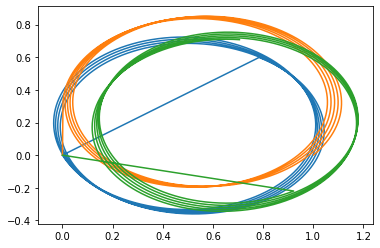

In [115]:
##for 3 vortices in at the edges of equilateral triangle
x,y=np.zeros(3),np.zeros(3)
T=np.ones(3)
x[0],x[1],x[2]=0,1,(1/np.sqrt(2))
y[2]=1/np.sqrt(2)

x1,y1,x2,y2,x3,y3=np.zeros(10000),np.zeros(10000),np.zeros(10000),np.zeros(10000),np.zeros(10000),np.zeros(10000)
for k in range(9999):
    a,b=RK2(3,x,y,T,0.005)
    x1[k]=a[0]
    x2[k]=a[1]
    x3[k]=a[2]
    y1[k]=b[0]
    y2[k]=b[1]
    y3[k]=b[2]
    
    x[0],x[1],x[2]=x1[k],x2[k],x3[k]
    y[0],y[1],y[2]=y1[k],y2[k],y3[k]
plt.plot(x1,y1)
plt.plot(x2,y2)
plt.plot(x3,y3)

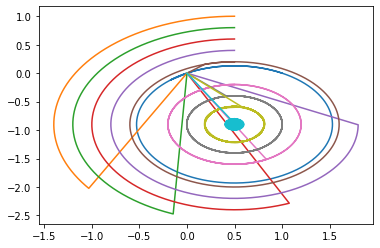

In [100]:
n=12
T=np.ones(n)
x,y=np.zeros(n),np.zeros(n)
x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,y1,y2,y3,y4,y5,y6,y7,y8,y9,y10,y11,y12=np.zeros(5000),np.zeros(5000),np.zeros(5000),np.zeros(5000),np.zeros(5000),np.zeros(5000),np.zeros(5000),np.zeros(5000),np.zeros(5000),np.zeros(5000),np.zeros(5000),np.zeros(5000),np.zeros(5000),np.zeros(5000),np.zeros(5000),np.zeros(5000),np.zeros(5000),np.zeros(5000),np.zeros(5000),np.zeros(5000),np.zeros(5000),np.zeros(5000),np.zeros(5000),np.zeros(5000)
x[0]=0
x[1]=1
for k in range(10):
    x[k+2]=0.5
    if(k<5):
        y[k+2]=1-0.2*k
    else:
        y[k+2]=1-0.2*(k+1)
    T[k]=0
for k in range(4999):
    a,b=RK2(12,x,y,T,0.005)
    x1[k]=a[0]
    x2[k]=a[1]
    x3[k]=a[2]
    x4[k]=a[3]
    x5[k]=a[4]
    x6[k]=a[5]
    x7[k]=a[6]
    x8[k]=a[7]
    x9[k]=a[8]
    x10[k]=a[9]
    x11[k]=a[10]
    x12[k]=a[11]
    y1[k]=b[0]
    y2[k]=b[1]
    y3[k]=b[2]
    y4[k]=b[3]
    y5[k]=b[4]
    y6[k]=b[5]
    y7[k]=b[6]
    y8[k]=b[7]
    y9[k]=b[8]
    y10[k]=b[9]
    y11[k]=b[10]
    y12[k]=b[11]
    
    x[0],x[1],x[2],x[3],x[4],x[5],x[6],x[7],x[8],x[9],x[10],x[11]=x1[k],x2[k],x3[k],x4[k],x5[k],x6[k],x7[k],x8[k],x9[k],x10[k],x11[k],x12[k]
    y[0],y[1],y[2],y[3],y[4],y[5],y[6],y[7],y[8],y[9],y[10],y[11]=y1[k],y2[k],y3[k],y4[k],y5[k],y6[k],y7[k],y8[k],y9[k],y10[k],y11[k],y12[k]

plt.plot(x2,y2)
plt.plot(x3,y3)
plt.plot(x4,y4)
plt.plot(x5,y5)
plt.plot(x6,y6)
plt.plot(x7,y7)
plt.plot(x8,y8)
plt.plot(x9,y9)
plt.plot(x10,y10)
plt.plot(x11,y11)

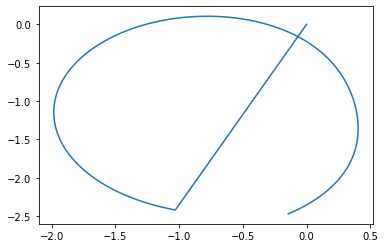

In [101]:
n=4
x1,x2,x3,x4,y1,y2,y3,y4=np.zeros(5000),np.zeros(5000),np.zeros(5000),np.zeros(5000),np.zeros(5000),np.zeros(5000),np.zeros(5000),np.zeros(5000)
x1[0]=0.5
x2[0]=-0.5
y3[0]=0.5
x4[0]=1
y4[0]=1
T=np.ones(4)
T[3]=0

for k in range(4999):
    a,b=RK2(4,x,y,T,0.005)
    x1[k]=a[0]
    x2[k]=a[1]
    x3[k]=a[2]
    x4[k]=a[3]

    y1[k]=b[0]
    y2[k]=b[1]
    y3[k]=b[2]
    y4[k]=b[3]

    
    x[0],x[1],x[2],x[3]=x1[k],x2[k],x3[k],x4[k]
    y[0],y[1],y[2],y[3]=y1[k],y2[k],y3[k],y4[k]

plt.plot(x4,y4)
